## All Visualizations

#### Load CSV

In [1]:
import pandas as pd
import ast
import numpy as np
import glob

import os
os.getcwd()

'/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis'

In [2]:
ROOT_DIR = "results"

In [3]:
xgb_files = glob.glob("xgboost_*.csv", root_dir=ROOT_DIR)
rsf_files = glob.glob("results_rsf_*.csv", root_dir=ROOT_DIR)

In [4]:
def clean_column_values(df):
    for col in ['hyperparams', 'c_index', 'brier_score', 'mae']:
        if col in df.columns:
            df[col] = df[col].apply(
                lambda x: [float(i) for i in ast.literal_eval(x.replace("np.float64", ""))]
                if '[' in x else ast.literal_eval(x)
            )

    return df

#### XGBOOST_AFT

In [5]:
xgb_files

['xgboost_extreme_nhanes.csv',
 'xgboost_extreme_support.csv',
 'xgboost_logistic_nhanes.csv',
 'xgboost_logistic_support.csv',
 'xgboost_normal_nhanes.csv',
 'xgboost_normal_support.csv']

In [6]:
xgb_dfs = pd.DataFrame()
for file in xgb_files:
    base = os.path.basename(file)
    parts = base.replace(".csv", "").split("_")
    model = parts[0]
    function = parts[1]
    dataset = parts[2]

    dir = os.path.join(ROOT_DIR, file)

    df = pd.read_csv(dir)
    df = clean_column_values(df)
    df['model'] = model
    df['function'] = function
    df['dataset'] = dataset

    df['c_index'] = df["c_index"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    df['brier_score'] = df["brier_score"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    df['mae'] = df["mae"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    ) 

    xgb_dfs = pd.concat([xgb_dfs, df], ignore_index=True)
    
xgb_dfs

params  \
0   {'max_depth': 6, 'sigma': 50, 'learning_rate':...   
1   {'max_depth': 3, 'sigma': 5, 'learning_rate': ...   
2   {'max_depth': 6, 'sigma': 50, 'learning_rate':...   
3   {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   
4   {'max_depth': 10, 'sigma': 1, 'learning_rate':...   
5   {'max_depth': 3, 'sigma': 1, 'learning_rate': ...   
6   {'max_depth': 10, 'sigma': 10, 'learning_rate'...   
7   {'max_depth': 10, 'sigma': 5, 'learning_rate':...   
8   {'max_depth': 6, 'sigma': 0.5, 'learning_rate'...   
9   {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   
10  {'max_depth': 6, 'sigma': 50, 'learning_rate':...   
11  {'max_depth': 3, 'sigma': 5, 'learning_rate': ...   
12  {'max_depth': 6, 'sigma': 50, 'learning_rate':...   
13  {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   
14  {'max_depth': 10, 'sigma': 1, 'learning_rate':...   
15  {'max_depth': 3, 'sigma': 1, 'learning_rate': ...   
16  {'max_depth': 10, 'sigma': 10, 'learning_rate'...   
17  {'max_depth': 10, 'sigma': 5, 'learning_rate':...   
18  {'max_depth': 6, 'sigma': 0.5, 'learning_rate'...   
19  {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   
20  {'max_depth': 6, 'sigma': 50, 'learning_rate':...   
21  {'max_depth': 3, 'sigma': 5, 'learning_rate': ...   
22  {'max_depth': 6, 'sigma': 50, 'learning_rate':...   
23  {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   
24  {'max_depth': 10, 'sigma': 1, 'learning_rate':...   
25  {'max_depth': 3, 'sigma': 1, 'learning_rate': ...   
26  {'max_depth': 10, 'sigma': 10, 'learning_rate'...   
27  {'max_depth': 10, 'sigma': 5, 'learning_rate':...   
28  {'max_depth': 6, 'sigma': 0.5, 'learning_rate'...   
29  {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   
30  {'max_depth': 6, 'sigma': 50, 'learning_rate':...   
31  {'max_depth': 3, 'sigma': 5, 'learning_rate': ...   
32  {'max_depth': 6, 'sigma': 50, 'learning_rate':...   
33  {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   
34  {'max_depth': 10, 'sigma': 1, 'learning_rate':...   
35  {'max_depth': 3, 'sigma': 1, 'learning_rate': ...   
36  {'max_depth': 10, 'sigma': 10, 'learning_rate'...   
37  {'max_depth': 10, 'sigma': 5, 'learning_rate':...   
38  {'max_depth': 6, 'sigma': 0.5, 'learning_rate'...   
39  {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   
40  {'max_depth': 6, 'sigma': 50, 'learning_rate':...   
41  {'max_depth': 3, 'sigma': 5, 'learning_rate': ...   
42  {'max_depth': 6, 'sigma': 50, 'learning_rate':...   
43  {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   
44  {'max_depth': 10, 'sigma': 1, 'learning_rate':...   
45  {'max_depth': 3, 'sigma': 1, 'learning_rate': ...   
46  {'max_depth': 10, 'sigma': 10, 'learning_rate'...   
47  {'max_depth': 10, 'sigma': 5, 'learning_rate':...   
48  {'max_depth': 6, 'sigma': 0.5, 'learning_rate'...   
49  {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   
50  {'max_depth': 6, 'sigma': 50, 'learning_rate':...   
51  {'max_depth': 3, 'sigma': 5, 'learning_rate': ...   
52  {'max_depth': 6, 'sigma': 50, 'learning_rate':...   
53  {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   
54  {'max_depth': 10, 'sigma': 1, 'learning_rate':...   
55  {'max_depth': 3, 'sigma': 1, 'learning_rate': ...   
56  {'max_depth': 10, 'sigma': 10, 'learning_rate'...   
57  {'max_depth': 10, 'sigma': 5, 'learning_rate':...   
58  {'max_depth': 6, 'sigma': 0.5, 'learning_rate'...   
59  {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   

                                              c_index  \
0   [0.7548526737960035, 0.7488624411886882, 0.764...   
1   [0.8016941997766311, 0.7934761793932823, 0.809...   
2   [0.7548287308935638, 0.7429076577704584, 0.761...   
3   [0.804961116726438, 0.8024750097957476, 0.8240...   
4   [0.7390787213164028, 0.7264117660922774, 0.721...   
5   [0.7714248458077083, 0.7612960436963996, 0.774...   
6   [0.8098970381524625, 0.8048804918791043, 0.819...   
7   [0.808403001040227, 0.8056195920844467, 0.8223...   
8   [0.799342270052365, 0.7968741253796773, 0.8230...   

#### RSF

In [7]:
rsf_files

['results_rsf_nhanes.csv', 'results_rsf_support.csv']

In [8]:
rsf_dfs = pd.DataFrame()
for file in rsf_files:
    base = os.path.basename(file)
    dataset = base.replace('results_rsf_', '').replace('.csv', '')
    model = 'rsf'
    function = None

    dir = os.path.join(ROOT_DIR, file)

    df = pd.read_csv(dir)
    df = clean_column_values(df)
    df['model'] = model
    df['function'] = function
    df['dataset'] = dataset

    df['c_index'] = df["c_index"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    df['brier_score'] = df["brier_score"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    df['mae'] = df["mae"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    ) 


    rsf_dfs = pd.concat([rsf_dfs, df], ignore_index=True)

In [9]:
rsf_dfs

params  \
0   {'n_trees': 50, 'max_depth': 6, 'min_samples_s...   
1   {'n_trees': 100, 'max_depth': 6, 'min_samples_...   
2   {'n_trees': 150, 'max_depth': 10, 'min_samples...   
3   {'n_trees': 50, 'max_depth': 6, 'min_samples_s...   
4   {'n_trees': 100, 'max_depth': 10, 'min_samples...   
5   {'n_trees': 150, 'max_depth': 6, 'min_samples_...   
6   {'n_trees': 100, 'max_depth': 6, 'min_samples_...   
7   {'n_trees': 50, 'max_depth': 3, 'min_samples_s...   
8   {'n_trees': 100, 'max_depth': 6, 'min_samples_...   
9   {'n_trees': 100, 'max_depth': 10, 'min_samples...   
10  {'n_trees': 50, 'max_depth': 6, 'min_samples_s...   
11  {'n_trees': 100, 'max_depth': 6, 'min_samples_...   
12  {'n_trees': 150, 'max_depth': 10, 'min_samples...   
13  {'n_trees': 50, 'max_depth': 6, 'min_samples_s...   
14  {'n_trees': 100, 'max_depth': 10, 'min_samples...   
15  {'n_trees': 150, 'max_depth': 6, 'min_samples_...   
16  {'n_trees': 100, 'max_depth': 6, 'min_samples_...   
17  {'n_trees': 50, 'max_depth': 3, 'min_samples_s...   
18  {'n_trees': 100, 'max_depth': 6, 'min_samples_...   
19  {'n_trees': 100, 'max_depth': 10, 'min_samples...   

                                              c_index  \
0   [0.7627151546048463, 0.7363128364065957, 0.752...   
1   [0.7493222316847847, 0.7404878135007498, 0.750...   
2   [0.7425821204718446, 0.7216427837010544, 0.751...   
3   [0.7455521454313996, 0.7347779237728801, 0.748...   
4   [0.743356397101509, 0.733535042261654, 0.73967...   
5   [0.7522200595846754, 0.7347333641690702, 0.757...   
6   [0.751765881143012, 0.7329454560988472, 0.7580...   
7   [0.6929370647917041, 0.7107971234382043, 0.721...   
8   [0.7506236205204672, 0.7271840098045859, 0.756...   
9   [0.7649444229981524, 0.7490075360969617, 0.773...   
10  [0.6723414858084995, 0.6576883299728846, 0.670...   
11  [0.672118491314119, 0.6586866874087465, 0.6708...   
12  [0.6703072744184424, 0.6564737885003129, 0.670...   
13  [0.6740447493792684, 0.6633661484043663, 0.673...   
14  [0.6661058182480375, 0.6582347650003476, 0.668...   
15  [0.6732792621662852, 0.6602700453660572, 0.674...   
16  [0.6713535493199486, 0.6578632326357505, 0.670...   
17  [0.662111000007633, 0.648898113223945, 0.65989...   
18  [0.6714784044280491, 0.6594829833831607, 0.672...   
19  [0.678782155642524, 0.6661320004519224, 0.6811...   

                                          brier_score  \
0   [0.13158243499573166, 0.1348840344275812, 0.12...   
1   [0.13039933704207435, 0.13314992945404613, 0.1...   
2   [0.1294770623264155, 0.1317143176041931, 0.128...   
3   [0.1298071674815919, 0.1369539188050941, 0.128...   
4   [0.1299047489149039, 0.13233844335176023, 0.12...   
5   [0.13253705295085322, 0.13628260420266336, 0.1...   
6   [0.13039755069167075, 0.13369860759172292, 0.1...   
7   [0.12618962807123685, 0.1318349762707099, 0.12...   
8   [0.13012395911327487, 0.1334051852709498, 0.12...   
9   [0.1373800693598026, 0.13949749651573728, 0.13...   
10  [0.3591314848387353, 0.3700937226942018, 0.376...   
11  [0.3665731116459995, 0.3840566501774582, 0.371...   
12  [0.3763828704144386, 0.39573463474995657, 0.38...   
13  [0.36104189354203187, 0.37862662770188205, 0.3...   
14  [0.3815465622947803, 0.3920652837947022, 0.387...   
15  [0.3600385187138128, 0.37196303020134663, 0.36...   
16  [0.36365426169052195, 0.3715475517037685, 0.36...   
17  [0.3741144618454487, 0.399310774028318, 0.4048...   
18  [0.3646614766687508, 0.37292456916023037, 0.36...   
19  [0.3727953777571319, 0.3728497864778987, 0.377...   

                                                  mae  mean_c_index  \
0   [7.659482758620689, 8.003430721558212, 8.04332...      0.747829   
1   [8.10886383731211, 8.245019920318725, 8.223032...      0.742539   
2   [8.402519893899203, 8.848162903939796, 8.24966...      0.736942   
3   [8.218280282935453, 7.948649845064187, 8.25607...      0.742518   
4   [8.363616268788682, 8.543492695883135, 8.73220...      0.738422   
5   [7.802939876215738, 7.9

#### AFT-FOREST

Remember replace 3,4,8-11 with current for NHANES!

In [10]:
NHANES_AFT_DIR = f"{ROOT_DIR}/results_aft/nhanes"
SUPPORT_DIR = f"{ROOT_DIR}/results_aft/support"

nhanes_aft_files = glob.glob("results_*.csv", root_dir=NHANES_AFT_DIR)
nhanes_aft_dfs = pd.DataFrame()

support_aft_files = glob.glob("results_*.csv", root_dir=SUPPORT_DIR)
support_aft_dfs = pd.DataFrame()


print(nhanes_aft_files)

['results_1.csv', 'results_10.csv', 'results_11.csv', 'results_2.csv', 'results_3.csv', 'results_4.csv', 'results_5.csv', 'results_6.csv', 'results_7.csv', 'results_8.csv', 'results_9.csv']


In [11]:
import json 

def input_file(files, dir_root, dataset, model):
    dfs = pd.DataFrame()
    for file in files:
        dir = os.path.join(dir_root, file)

        df = pd.read_csv(dir)
        df = clean_column_values(df)
        df['model'] = model
        df['dataset'] = dataset

        df['params_dict'] = df['params'].apply(ast.literal_eval)

        df['function'] = df['params_dict'].apply(lambda d: d['function'])
        df['bootstrap'] = df['params_dict'].apply(lambda d: d.get('is_bootstrap', False))
        df['custom_dist'] = df['params_dict'].apply(lambda d: d.get('is_custom_dist', False))
        df['c_index'] = df["c_index"].apply(
            lambda x: ast.literal_eval(x) if isinstance(x, str) else x
        )
        df['brier_score'] = df["brier_score"].apply(
            lambda x: ast.literal_eval(x) if isinstance(x, str) else x
        )
        df['mae'] = df["mae"].apply(
            lambda x: ast.literal_eval(x) if isinstance(x, str) else x
        )

        dfs = pd.concat([dfs, df], ignore_index=True)

    return dfs


In [12]:
aft_nhanes_dataset = input_file(nhanes_aft_files, NHANES_AFT_DIR, "nhanes", "aft_forest")

In [13]:
aft_nhanes_dataset

params  \
0   {'function': 'extreme', 'is_bootstrap': False,...   
1   {'function': 'gmm', 'is_bootstrap': False, 'is...   
2   {'function': 'gmm', 'is_bootstrap': True, 'is_...   
3   {'function': 'normal', 'is_bootstrap': False, ...   
4   {'function': 'logistic', 'is_bootstrap': False...   
5   {'function': 'extreme', 'is_bootstrap': True, ...   
6   {'function': 'logistic', 'is_bootstrap': False...   
7   {'function': 'normal', 'is_bootstrap': False, ...   
8   {'function': 'normal', 'is_bootstrap': True, '...   
9   {'function': 'logistic', 'is_bootstrap': True,...   
10  {'function': 'extreme', 'is_bootstrap': False,...   

                                              c_index  \
0   [0.7462059708441752, 0.2749839438121809, 0.498...   
1   [0.3846902451458528, 0.4003709863213064, 0.367...   
2   [0.612055361884078, 0.32952637192023165, 0.453...   
3   [0.5793412533998922, 0.6244759643287482, 0.281...   
4   [0.3165612687822861, 0.5824993444950844, 0.283...   
5   [0.2659139263707864, 0.5783637713481011, 0.403...   
6   [0.7676230812526337, 0.6764803363255782, 0.737...   
7   [0.6465622412324775, 0.3113051765738747, 0.675...   
8   [0.41506310612378405, 0.45825391167034435, 0.5...   
9   [0.31206258159004446, 0.5690287184805248, 0.59...   
10  [0.4295887125054148, 0.7096713489849249, 0.272...   

                                          brier_score  \
0   [0.4872784741103424, 0.4735083348958437, 0.487...   
1   [0.4849613177587097, 0.4760034296629134, 0.487...   
2   [0.48473060522153416, 0.4775438517639577, 0.48...   
3   [0.4847857756108588, 0.47361944730968947, 0.48...   
4   [0.4846249595821689, 0.47355378997423514, 0.48...   
5   [0.48474565169135003, 0.473664902388081, 0.487...   
6   [0.47977576166626484, 0.47796293257820754, 0.4...   
7   [0.48626032965280686, 0.47778122828444647, 0.4...   
8   [0.4847055277718413, 0.4741244835036554, 0.487...   
9   [0.4847055277718413, 0.4735083348958437, 0.487...   
10  [0.486987732593125, 0.4735083348958437, 0.4875...   

                                                  mae  mean_c_index  \
0   [5.060844267508114, 5.027265700709524, 4.97477...      0.555401   
1   [5.050816226791639, 5.058428013822649, 4.97696...      0.439021   
2   [5.0413369435494095, 5.046417393535673, 4.9785...      0.397023   
3   [5.036400385460184, 5.041310295080621, 4.96646...      0.467950   
4   [5.0254955085785165, 5.035469098594474, 4.9684...      0.463854   
5   [5.0414752049343905, 5.04996706563621, 4.98332...      0.483087   
6   [5.008994106222506, 5.058669603141295, 4.98439...      0.699081   
7   [5.052589888825796, 5.0516216004670635, 4.9799...      0.504528   
8   [5.036102528440307, 5.04100100902046, 4.978460...      0.409151   
9   [5.03314486293189, 5.039318932765397, 4.979553...      0.548389   
10  [5.054728174303456, 5.043662226953493, 4.97870...      0.487952   

    mean_brier_score  mean_mae  c_index_test  brier_score_test  mae_test  \
0           0.484080  5.025665      0.733339          0.485228  5.084648   
1           0.482636  5.024161      0.668695          0.482150  5.055613   
2           0.484914  5.022235      0.599242          0.483167  5.066940   
3           0.484009  5.021400      0.637686          0.481768  5.039570   
4           0.482746  5.014160      0.700896          0.481808  5.056908   
5           0.482878  5.027176      0.717376          0.483307  5.069442   
6           0.481788  5.018617      0.771018          0.478409  5.034293   
7           0.483679  5.021128      0.655282          0.481897  5.060762   
8           0.483963  5.019511      0.575488          0.481973  5.058216   
9           0.483198  5.023319      0.715323          0.483914  5.072539   
10          0.482149  5.017776      0.705835          0.481716  5.042497   

    index       model dataset  \
0      31  aft_forest  nhanes   
1       3  aft_forest  nhanes   
2       4  aft_forest  nhanes   
3      49  aft_forest  nhanes   
4      54  aft_forest  nhanes   
5       8  aft_forest  nhane

In [14]:
aft_support_dataset = input_file(support_aft_files, SUPPORT_DIR, "support", "aft_forest")

In [15]:
aft_support_dataset

params  \
0   {'function': 'extreme', 'is_bootstrap': False,...   
1   {'function': 'extreme', 'is_bootstrap': False,...   
2   {'function': 'extreme', 'is_bootstrap': True, ...   
3   {'function': 'normal', 'is_bootstrap': False, ...   
4   {'function': 'logistic', 'is_bootstrap': False...   
5   {'function': 'normal', 'is_bootstrap': False, ...   
6   {'function': 'normal', 'is_bootstrap': True, '...   
7   {'function': 'gmm', 'is_bootstrap': False, 'is...   
8   {'function': 'gmm', 'is_bootstrap': True, 'is_...   
9   {'function': 'logistic', 'is_bootstrap': False...   
10  {'function': 'logistic', 'is_bootstrap': True,...   

                                              c_index  \
0   [0.5488843187436414, 0.5356524412500869, 0.542...   
1   [0.5745194168775755, 0.5714450219008552, 0.564...   
2   [0.45667146095742606, 0.49796797869012027, 0.4...   
3   [0.5451615646907574, 0.5385513714106932, 0.538...   
4   [0.49284618395900825, 0.5078440042063547, 0.55...   
5   [0.46352049968213743, 0.4363082719182368, 0.47...   
6   [0.46565503133372516, 0.44346189946464576, 0.4...   
7   [0.4275758590195003, 0.44394967148717235, 0.44...   
8   [0.5019540642245952, 0.49403049607175137, 0.47...   
9   [0.5065000986846051, 0.5098472371897379, 0.517...   
10  [0.49482859956186215, 0.4710802249183063, 0.51...   

                                          brier_score  \
0   [0.5373115382396035, 0.5596233419518313, 0.552...   
1   [0.5373115382396035, 0.5590342056256854, 0.552...   
2   [0.5372690970206916, 0.5596126303822649, 0.552...   
3   [0.5373115382396035, 0.5596233419518313, 0.552...   
4   [0.5373115382396035, 0.5596233419518313, 0.552...   
5   [0.5373115382396035, 0.5596233419518313, 0.552...   
6   [0.5373115382396035, 0.5596233419518313, 0.552...   
7   [0.5373115382396035, 0.5596233419518313, 0.552...   
8   [0.5373115382396035, 0.5596233419518313, 0.552...   
9   [0.5372797073254196, 0.5591413213213483, 0.552...   
10  [0.5372903176301476, 0.5594626684083369, 0.552...   

                                                  mae  mean_c_index  \
0   [192.74467001094678, 186.8792708776954, 185.02...      0.534478   
1   [192.5951113058591, 186.62007416911806, 184.87...      0.574067   
2   [192.85729537446943, 187.0323825054806, 185.08...      0.484998   
3   [192.79524412512058, 186.88530500916167, 184.9...      0.533462   
4   [192.7991274026851, 186.88893833512063, 185.00...      0.518340   
5   [192.82172433413595, 187.01777579758493, 185.0...      0.450678   
6   [192.78177016440014, 187.04489637491264, 185.0...      0.467190   
7   [192.88439043688993, 187.07565594862226, 185.1...      0.436769   
8   [192.7946091836621, 187.01520027386036, 185.03...      0.488909   
9   [192.66488362035707, 186.78463617037468, 185.0...      0.506982   
10  [192.75840938947493, 187.08677320800817, 185.0...      0.512496   

    mean_brier_score    mean_mae  c_index_test  brier_score_test    mae_test  \
0           0.547287  186.234236      0.556900          0.550254  192.263630   
1           0.547008  186.031112      0.579919          0.550254  191.944886   
2           0.547277  186.312868      0.468254          0.550254  192.428195   
3           0.547287  186.244716      0.541418          0.550254  192.310852   
4           0.547287  186.248708      0.553392          0.550254  192.283780   
5           0.547287  186.339238      0.474786          0.550254  192.368279   
6           0.547287  186.299011      0.498918          0.550254  192.353983   
7           0.547287  186.402848      0.442244          0.550254  192.574129   
8           0.547287  186.280636      0.492264          0.550254  192.320684   
9           0.547180  186.167162      0.524970          0.550254  192.310104   
10          0.547251  186.289719      0.554464          0.550254  192.246047   

    index       model  dataset  \
0       9  aft_forest  support   
1      15  aft_forest  support   
2      16  aft_forest  support   
3      19  aft_forest  support   
4      2

### Experiment 1

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
aft_nhanes_dataset['function_custom_dist_bootstrap'] = aft_nhanes_dataset.apply(lambda row: f"{row['function']}_{row['custom_dist']}_{row['bootstrap']}", axis=1)

In [18]:
aft_support_dataset['function_custom_dist_bootstrap'] = aft_support_dataset.apply(lambda row: f"{row['function']}_{row['custom_dist']}_{row['bootstrap']}", axis=1)

In [19]:
df_nhanes = aft_nhanes_dataset

In [20]:
df_support = aft_support_dataset

In [21]:
def boxplots_multiple_metrics(df, title, xlabel, metrics, hue='custom_dist'):
    n_metrics = len(metrics)
    fig, axes = plt.subplots(1, n_metrics, figsize=(5 * n_metrics, 5), sharex=True)

    df.sort_values(by=['function', 'custom_dist', 'bootstrap'], inplace=True)

    if n_metrics == 1:
        axes = [axes]

    for ax, metric in zip(axes, metrics):
        sns.boxplot(
            data=df.explode(metric),
            x="function_custom_dist_bootstrap",
            y=metric,
            hue=hue,
            ax=ax
        )
        ax.set_title(metric)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(metric)
        ax.tick_params(axis='x', rotation=45)

    fig.suptitle(title, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    filename = f"graphs/{title.replace(' ', '_').lower()}_all_metrics.png"
    fig.savefig(filename)
    plt.show()

In [22]:
def boxplot_with_errorbars(df, dataset, title, xlabel, ylabel, metric='c_index'):
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df,
        x="function_custom_dist_bootstrap",
        y=metric,
        hue="custom_dist"
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    if not os.path.exists(f"graphs/{dataset}"):
        os.makedirs(f"graphs/{dataset}")
    plt.savefig(f"graphs/{dataset}/{title.replace(' ', '_').lower()}_{metric}.png")
    plt.show()

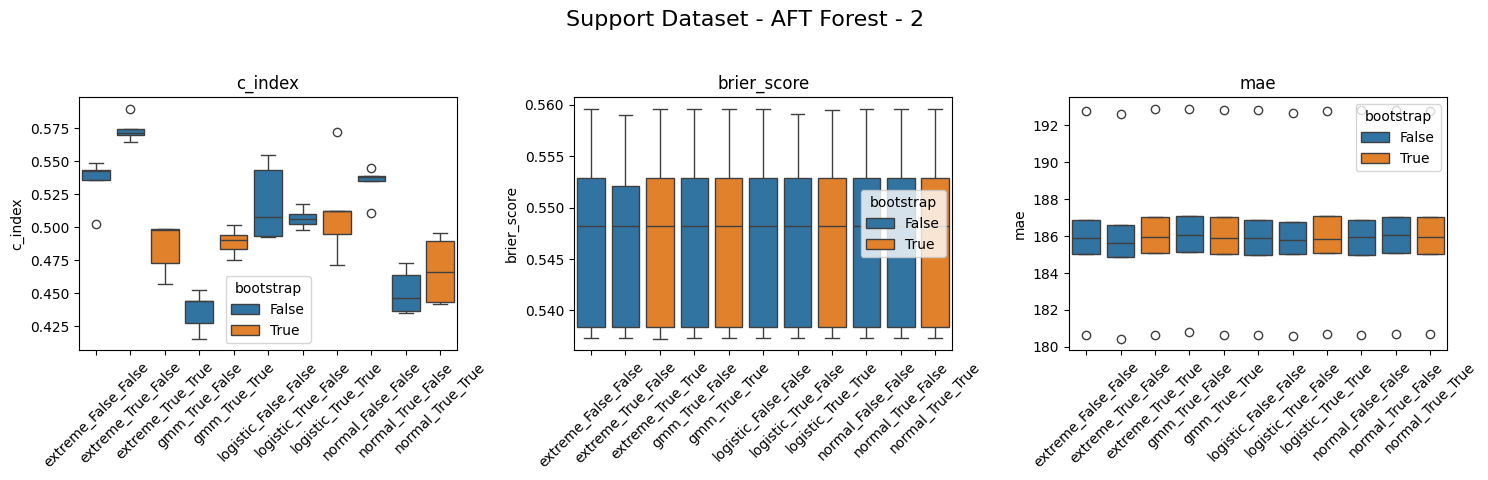

In [23]:
boxplots_multiple_metrics(
    df_support,
    title="Support Dataset - AFT Forest - 2",
    xlabel=None,
    metrics=["c_index", "brier_score", "mae"],
    hue="bootstrap"
)

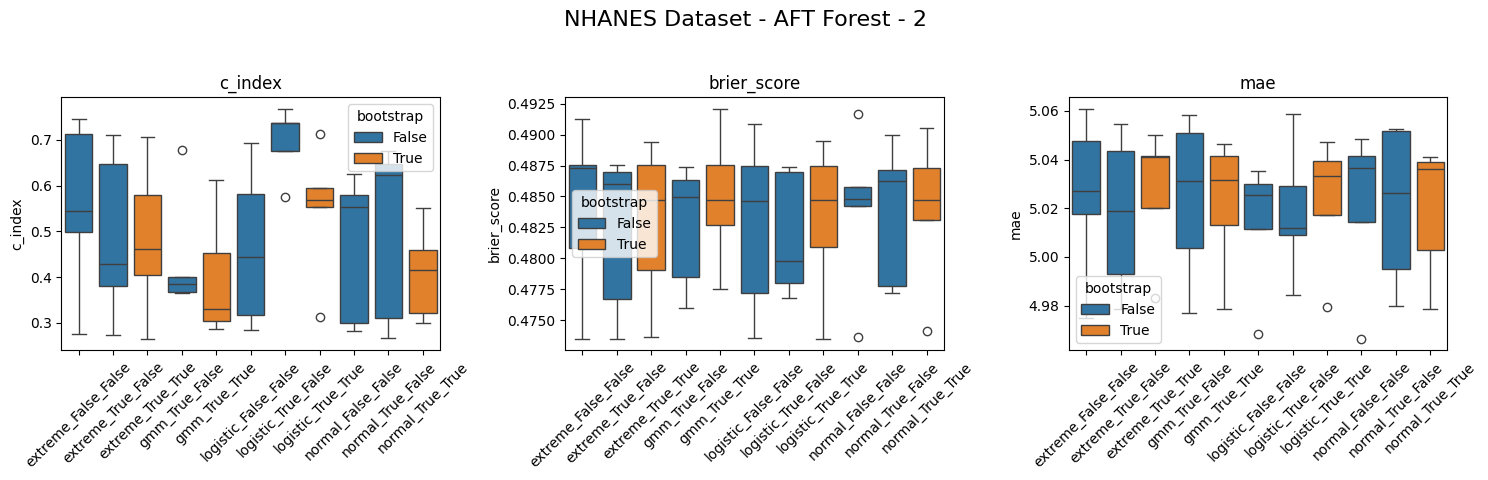

In [24]:
boxplots_multiple_metrics(
    df_nhanes,
    title="NHANES Dataset - AFT Forest - 2",
    xlabel=None,
    metrics=["c_index", "brier_score", "mae"],
    hue="bootstrap"
)

In [25]:
def plot(df, function, dataset, xlabel, ylabel=None, metric='c_index'):
    df_exploded = df.explode(metric)
    df_sorted = df_exploded.sort_values("function")
    df_sorted = df_sorted.sort_values("custom_dist", ascending=True)

    if metric == 'c_index':
        title = f"{function.capitalize()} Distribution AFT Forest C-Index Comparison - {dataset}"
        ylabel = 'C-Index'
    elif metric == 'brier_score':
        title = f"{function.capitalize()} Distribution AFT Forest Brier Score Comparison - {dataset}"
        ylabel = 'Brier Score'  
    else:
        title = f"{function.capitalize()} Distribution AFT Forest {metric.upper()} Comparison - {dataset}"
        ylabel = metric.upper()

    boxplot_with_errorbars(
        df_sorted,
        dataset=dataset,
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        metric=metric
    )

In [26]:
def format_latex_table(df, caption, label, header, column_format):

    bold_header = [f"\\textbf{{{{{h}}}}}" for h in header]

    latex_str = df.to_latex(
        index=False,
        escape=False,
        column_format=column_format,
        header=bold_header,
        caption=caption,
        label=label,
        position='h!'
    )
    
    latex_str = latex_str.replace('\\toprule', '\\hline')
    latex_str = latex_str.replace('\\midrule', '\\hline')
    latex_str = latex_str.replace('\\bottomrule', '\\hline')
    
    latex_str = latex_str.replace(
        '\\begin{table}[h!]',
        '\\begin{table}[h!]\n\\centering'
    )
    
    return latex_str

In [27]:
def latexify_exp(df, index=1, dataset='nhanes'):
    new_latex = pd.DataFrame()

    df_a = df.copy()
    df_a.sort_values(by=['function', 'custom_dist', 'bootstrap'], inplace=True)

    if index == 0:
        df_a = df_a[(df_a['function'] != 'gmm') & (df_a['custom_dist'] == False)]
    
    if index == 1:
        df_a = df_a[(df_a['function'] != 'gmm') & (df_a['bootstrap'] == False)]

    new_latex['Function'] = df_a['function'].apply(
        lambda x: x.replace('_', ' ').capitalize() if x else 'Random Survival Forest'
    )
    
    if index != 0:
        new_latex['Custom Distribution'] = df_a['custom_dist'].apply(lambda x: 'Yes' if x else 'No')

    if index == 2:
        new_latex['Bootstrap'] = df_a['bootstrap'].apply(lambda x: 'Yes' if x else 'No')

    # Calculate mean/std per row if lists
    df_a['new_mean_c_index'] = df_a['c_index'].apply(
        lambda x: np.mean(x) if isinstance(x, list) else x
    )
    df_a['new_std_c_index'] = df_a['c_index'].apply(
        lambda x: np.std(x) if isinstance(x, list) else 0
    )

    df_a['new_mean_brier_score'] = df_a['brier_score'].apply(
        lambda x: np.mean(x) if isinstance(x, list) else x
    )
    df_a['new_std_brier_score'] = df_a['brier_score'].apply(
        lambda x: np.std(x) if isinstance(x, list) else 0
    )

    df_a['new_mean_mae'] = df_a['mae'].apply(
        lambda x: np.mean(x) if isinstance(x, list) else x
    )
    df_a['new_std_mae'] = df_a['mae'].apply(
        lambda x: np.std(x) if isinstance(x, list) else 0
    )

    # Identify best values (highest for C-Index, lowest for Brier/MAE)
    best_c_index_idx = df_a['new_mean_c_index'].idxmax()
    best_brier_idx = df_a['new_mean_brier_score'].idxmin()
    best_mae_idx = df_a['new_mean_mae'].idxmin()

    # Format with bold for best values
    new_latex['c_index'] = df_a.apply(
        lambda row: f"\\textbf{{{round(row['new_mean_c_index'], 3)} ± {round(row['new_std_c_index'], 3)}}}" 
        if row.name == best_c_index_idx 
        else f"{round(row['new_mean_c_index'], 3)} ± {round(row['new_std_c_index'], 3)}",
        axis=1
    )
    
    new_latex['brier_score'] = df_a.apply(
        lambda row: f"\\textbf{{{round(row['new_mean_brier_score'], 3)} ± {round(row['new_std_brier_score'], 3)}}}" 
        if row.name == best_brier_idx 
        else f"{round(row['new_mean_brier_score'], 3)} ± {round(row['new_std_brier_score'], 3)}",
        axis=1
    )
    
    new_latex['mae'] = df_a.apply(
        lambda row: f"\\textbf{{{round(row['new_mean_mae'], 3)} ± {round(row['new_std_mae'], 3)}}}" 
        if row.name == best_mae_idx 
        else f"{round(row['new_mean_mae'], 3)} ± {round(row['new_std_mae'], 3)}",
        axis=1
    )

    label = f"tab:model_performance_{dataset}_{index}"
    
    # Define table headers and format based on index
    if index == 0:
        header = ['Function', 'C-Index', 'Brier Score', 'MAE']
        column_format = 'l|c|c|c'   # <-- only 4
        caption = f"Performance of Models using {dataset.capitalize()} Dataset from 5-fold Cross Validation."
    elif index == 1:
        header = ['Function', 'Custom Distribution', 'C-Index', 'Brier Score', 'MAE']
        column_format = 'l|c|c|c|c'   # <-- 5
        caption = f"Performance of Models using {dataset.capitalize()} Dataset from 5-fold Cross Validation with and without custom distribution."
    else:
        header = ['Function', 'Custom Distribution', 'Bootstrap', 'C-Index', 'Brier Score', 'MAE']
        column_format = 'l|c|c|c|c|c'   # <-- 6
        caption = f"Performance of Models using {dataset.capitalize()} Dataset from 5-fold Cross Validation with and without bootstrapping."


    # Generate LaTeX table string
    latex_table = format_latex_table(
        new_latex,
        caption=caption,
        label=label,
        header=header,
        column_format=column_format
    )
    
    # Save to file
    if not os.path.exists("tables"):
        os.makedirs("tables")
    
    with open(f"tables/latexify_exp{index}_{dataset}.tex", "w") as f:
        f.write(latex_table)

In [28]:
def latexify_exp_t(df, index=1, dataset='nhanes'):
    new_latex = pd.DataFrame()

    df_a = df.copy()
    df_a.sort_values(by=['function', 'custom_dist', 'bootstrap'], inplace=True)

    
    if index == 1:
        df_a = df_a[(df_a['function'] != 'gmm') & (df_a['bootstrap'] == False)]

    new_latex['Function'] = df_a['function'].apply(
        lambda x: x.replace('_', ' ').capitalize() if x else 'Random Survival Forest'
    )
    new_latex['Custom Distribution'] = df_a['custom_dist'].apply(lambda x: 'Yes' if x else 'No')

    if index == 2:
        new_latex['Bootstrap'] = df_a['bootstrap'].apply(lambda x: 'Yes' if x else 'No')

    # Find indices of best values
    best_c_index_idx = df_a['c_index_test'].idxmax()  # Higher is better
    best_brier_idx = df_a['brier_score_test'].idxmin()  # Lower is better
    best_mae_idx = df_a['mae_test'].idxmin()  # Lower is better

    # Format with bold for best values
    new_latex['c_index'] = df_a.apply(
        lambda row: f"\\textbf{{{row['c_index_test']:.3f}}}" 
        if row.name == best_c_index_idx 
        else f"{row['c_index_test']:.3f}",
        axis=1
    )
    
    new_latex['brier_score'] = df_a.apply(
        lambda row: f"\\textbf{{{row['brier_score_test']:.3f}}}" 
        if row.name == best_brier_idx 
        else f"{row['brier_score_test']:.3f}",
        axis=1
    )
    
    new_latex['mae'] = df_a.apply(
        lambda row: f"\\textbf{{{row['mae_test']:.3f}}}" 
        if row.name == best_mae_idx 
        else f"{row['mae_test']:.3f}",
        axis=1
    )

    # Generate table caption and label
    label = f"tab:test_performance_{dataset}_{index}"
    
    # Define table headers and format based on index
    if index == 1:
        header = ['Function', 'Custom Distribution', 'C-Index Test', 'Brier Score Test', 'MAE Test']
        column_format = 'l|c|c|c|c'
        caption = f"Test Performance of Models using {dataset.capitalize()} Dataset with and without custom distribution."
    else:
        header = ['Function', 'Custom Distribution', 'Bootstrap', 'C-Index Test', 'Brier Score Test', 'MAE Test']
        column_format = 'l|c|c|c|c|c'
        caption = f"Test Performance of Models using {dataset.capitalize()} Dataset with and without bootstrapping."

    # Generate LaTeX table string
    latex_table = format_latex_table(
        new_latex,
        caption=caption,
        label=label,
        header=header,
        column_format=column_format
    )
    
    # Save to file
    if not os.path.exists("tables"):
        os.makedirs("tables")
    
    with open(f"tables/latexify_test_exp{index}_{dataset}.tex", "w") as f:
        f.write(latex_table)

In [29]:
latexify_exp(df_nhanes, 0, dataset='nhanes')
latexify_exp(df_support, 0,  dataset='support')

In [30]:
latexify_exp(df_nhanes, 1, dataset='nhanes')
latexify_exp(df_support, 1,  dataset='support')

In [31]:
latexify_exp_t(df_nhanes, 1, dataset='nhanes')
latexify_exp_t(df_support, 1,  dataset='support')

In [32]:
latexify_exp_t(df_nhanes, 2, dataset='nhanes')
latexify_exp_t(df_support, 2,  dataset='support')

In [33]:
df_nhanes = aft_nhanes_dataset
df_support = aft_support_dataset

In [34]:
latexify_exp(df_nhanes, 2, dataset='nhanes')
latexify_exp(df_support, 2,  dataset='support')

In [35]:
df_nhanes_wb = df_nhanes[(df_nhanes["bootstrap"] == False) & (df_nhanes["function"] != "gmm")]
df_support_wb = df_support[(df_support["bootstrap"] == False) & (df_support["function"] != "gmm")]

In [36]:
def boxplot_with_errorbars_grouped(df, dataset, title, xlabel, ylabel, metric='c_index'):
    df = df.copy()

    # Map True/False to readable labels
    mapping = {True: "Custom", False: "No Custom"}
    df["Custom Dist"] = df["custom_dist"].map(mapping)

    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df,
        x="function",           # 3 functions on x-axis
        y=metric,
        hue="Custom Dist" # Use mapped labels for legend
    )

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)
    plt.tight_layout()

    path = f"graphs/{dataset}"
    os.makedirs(path, exist_ok=True)
    plt.savefig(f"{path}/{title.replace(' ', '_').lower()}_{metric}.png")
    plt.show()


In [37]:
def plot_grouped(df, dataset, xlabel, metric='c_index'):
    df_exploded = df.explode(metric)
    df_sorted = df_exploded.sort_values("custom_dist", ascending=True)

    if metric == 'c_index':
        title = f"AFT Forest C-Index Comparison - {dataset}"
        ylabel = 'C-Index'
    elif metric == 'brier_score':
        title = f"AFT Forest Brier Score Comparison - {dataset}"
        ylabel = 'Brier Score'
    else:
        title = f"AFT Forest {metric.upper()} Comparison - {dataset}"
        ylabel = metric.upper()

    boxplot_with_errorbars_grouped(
        df_sorted,
        dataset=dataset,
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        metric=metric
    )

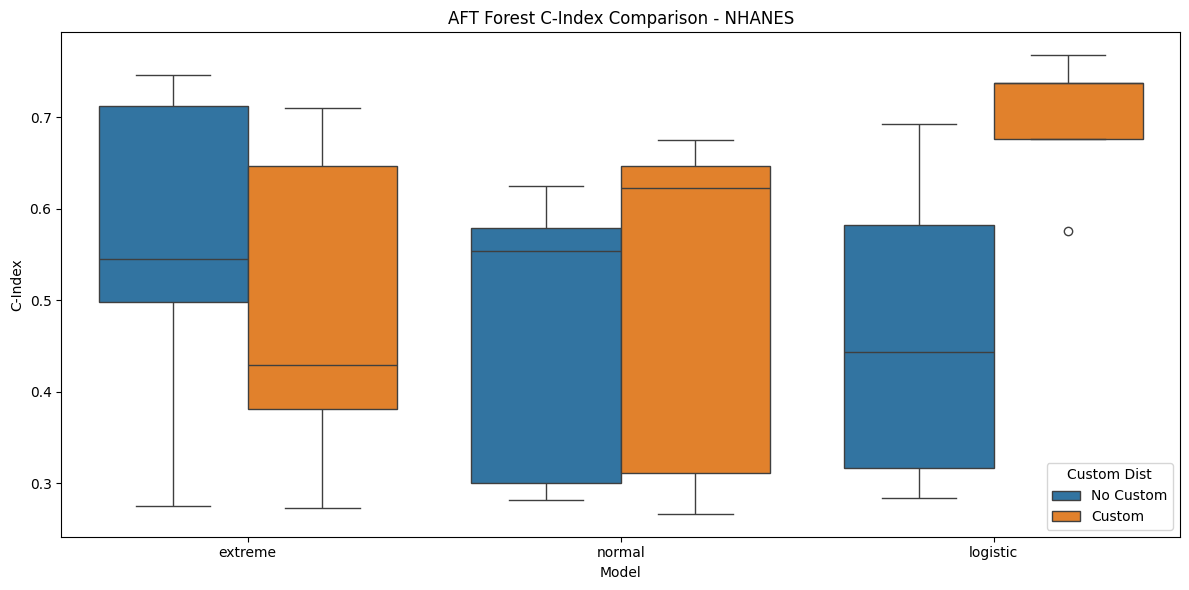

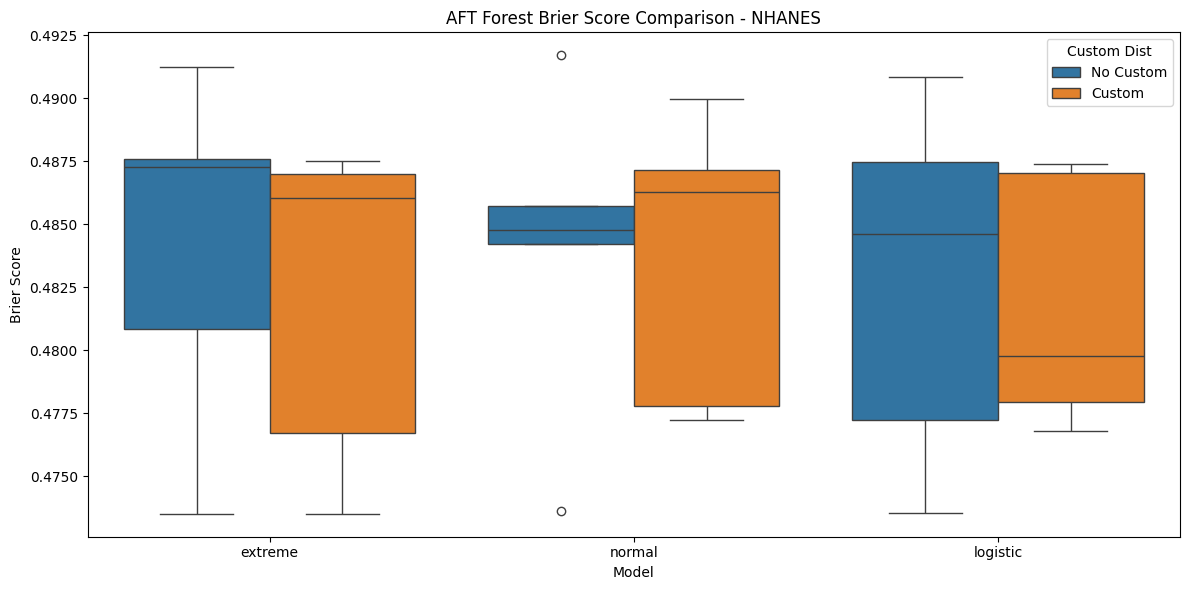

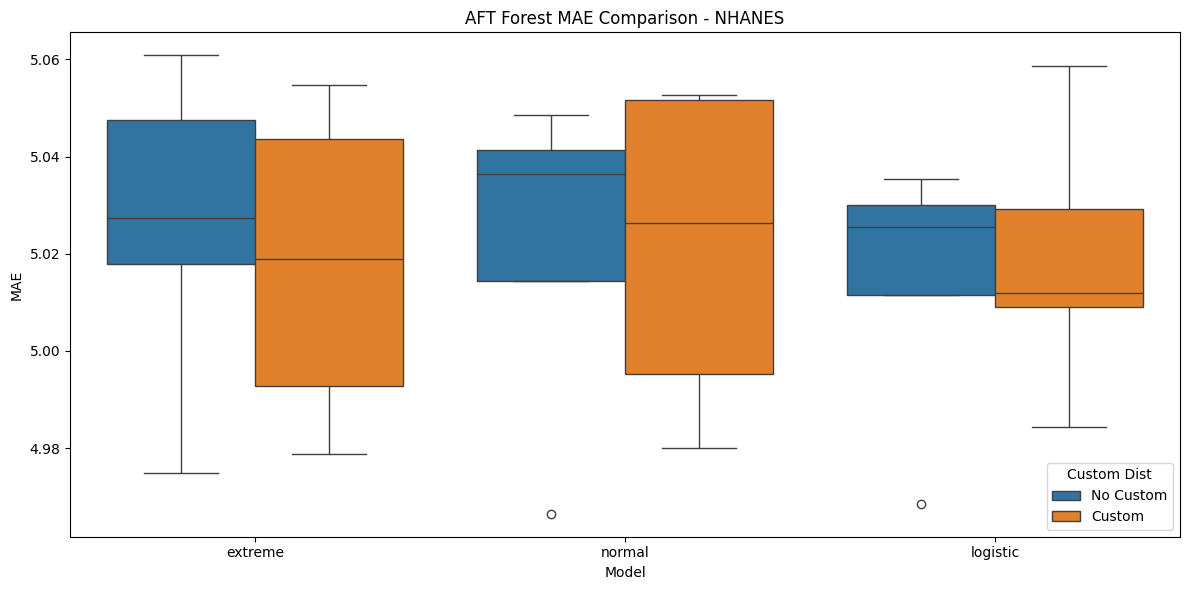

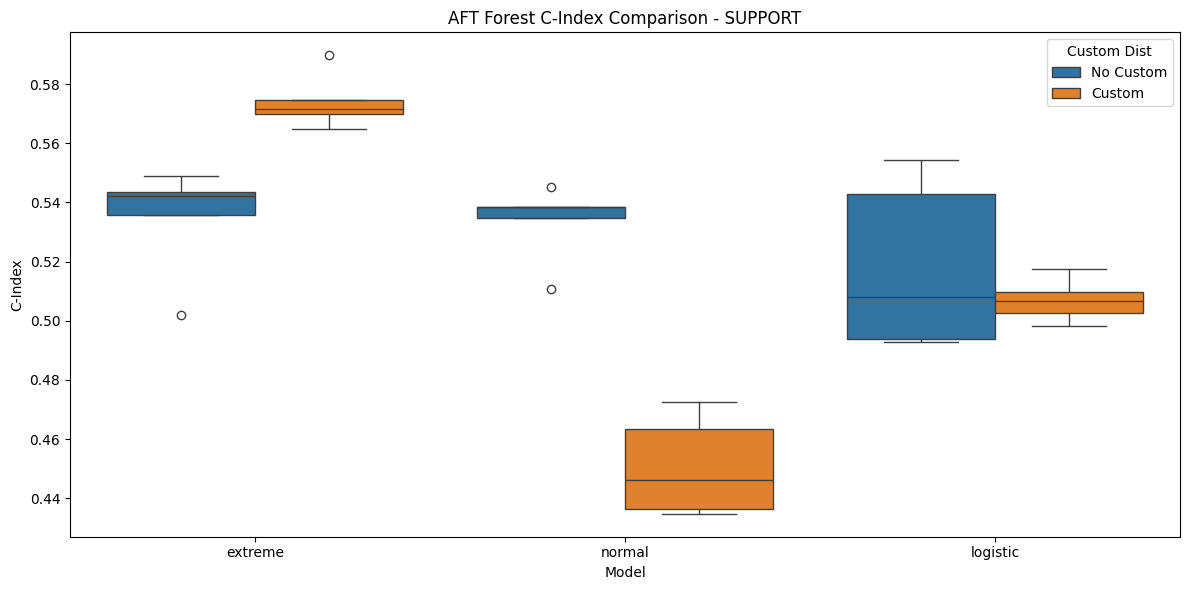

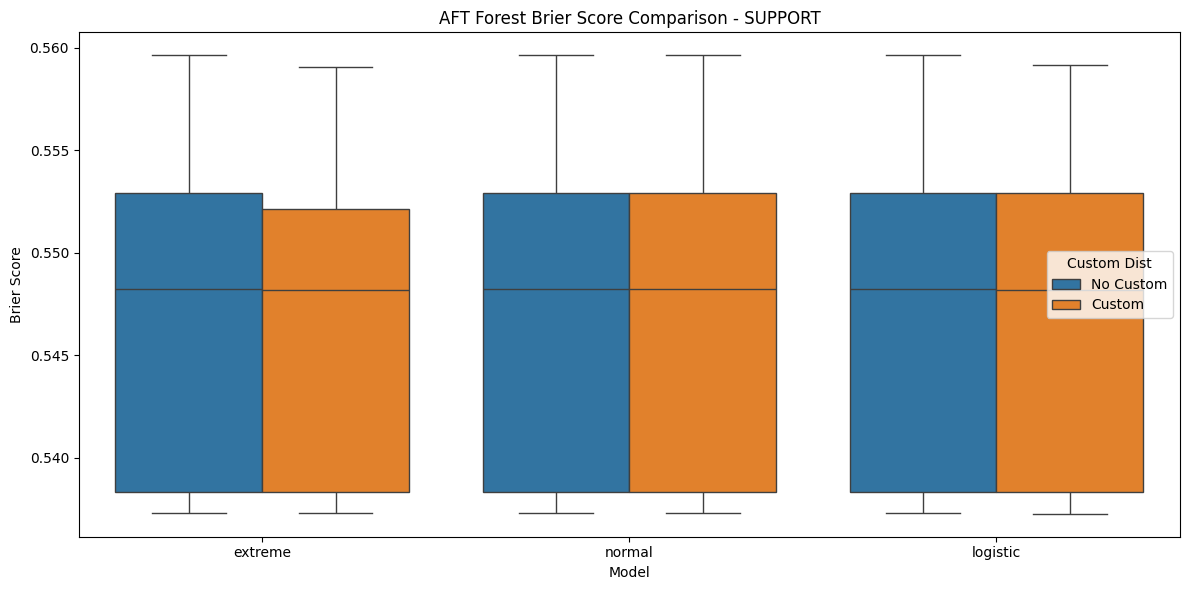

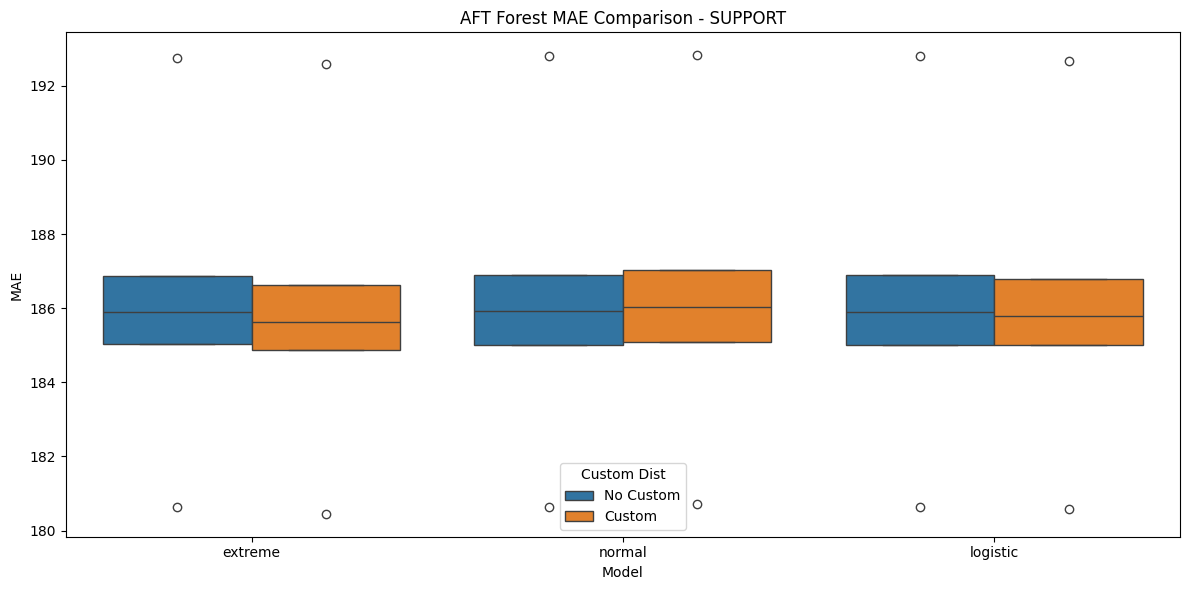

In [38]:
for df in [df_nhanes_wb, df_support_wb]:
    for metric in ['c_index', 'brier_score', 'mae']:
        plot_grouped(
            df,
            dataset='NHANES' if df is df_nhanes_wb else 'SUPPORT',
            xlabel='Model',
            metric=metric
        )


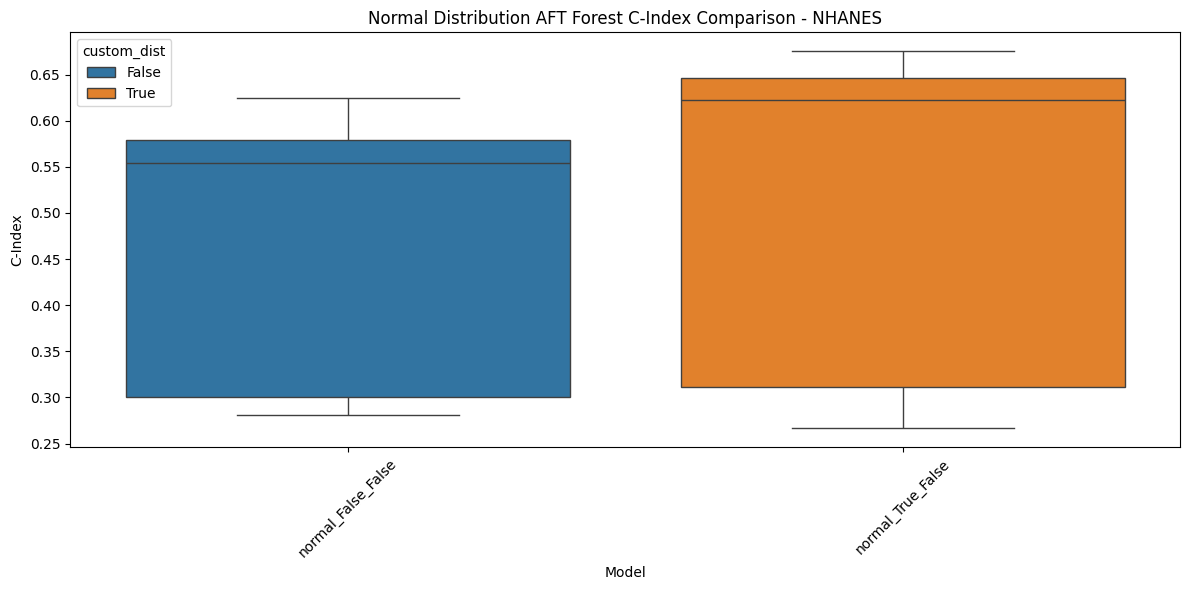

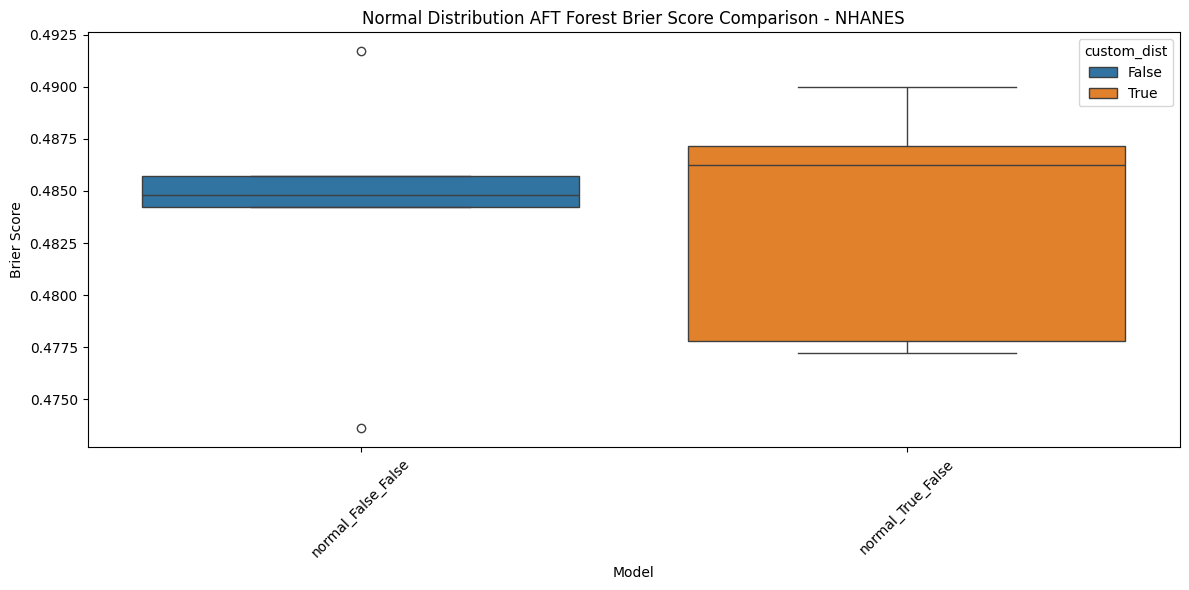

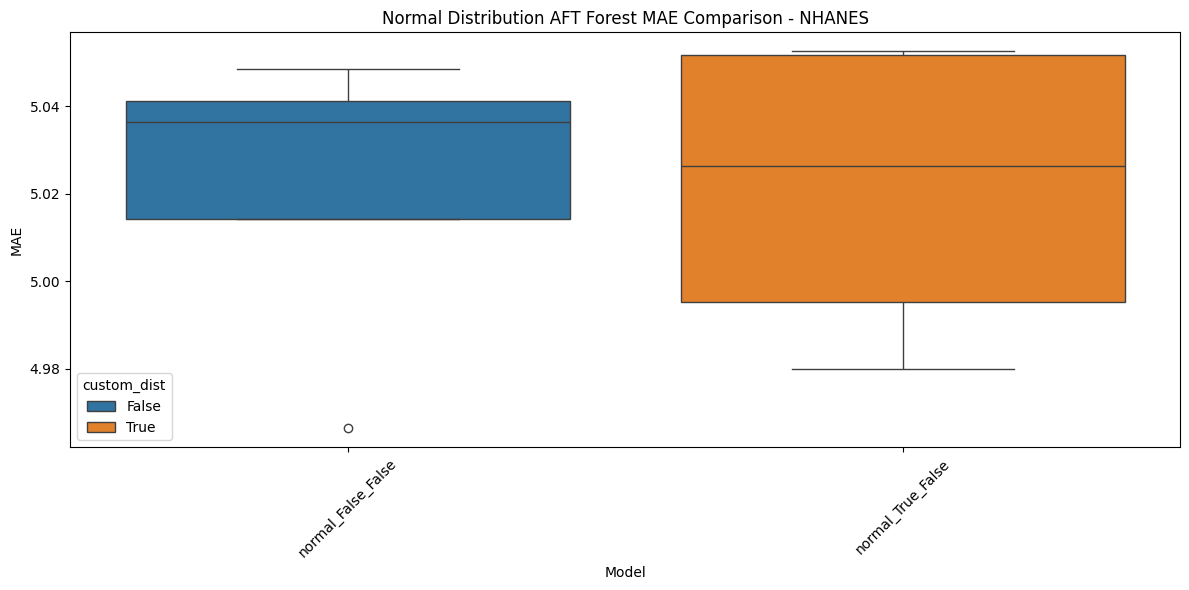

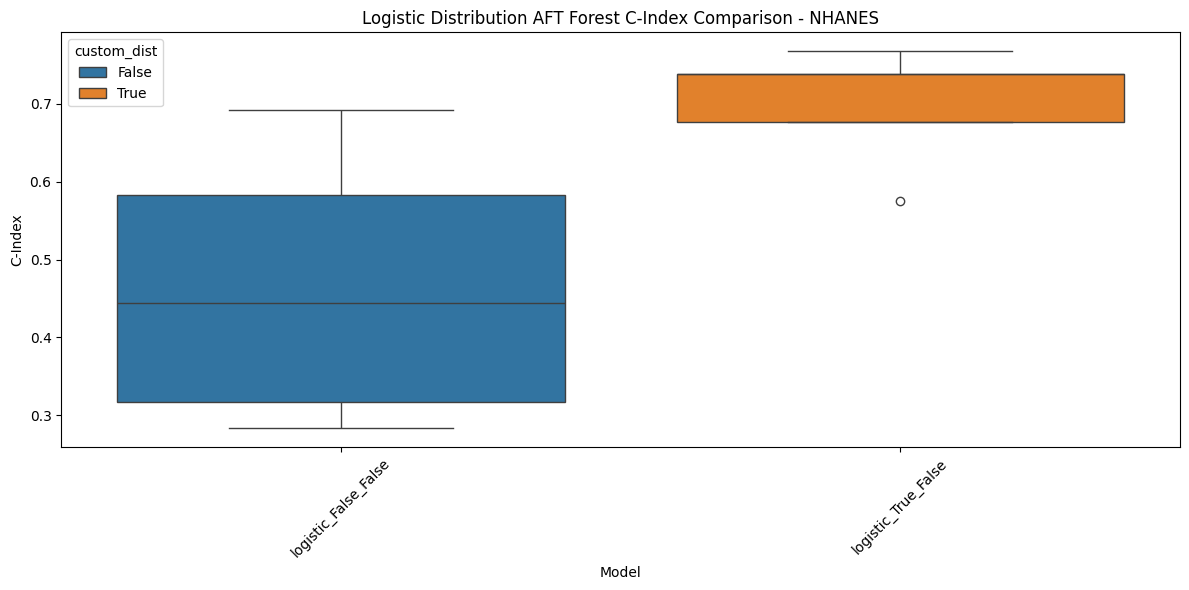

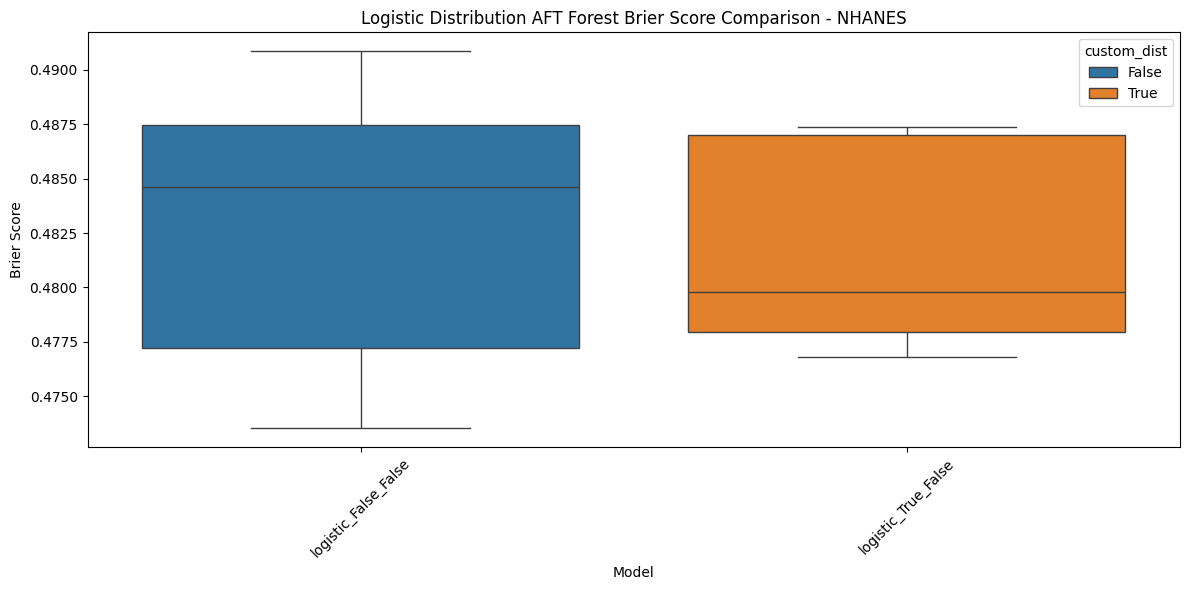

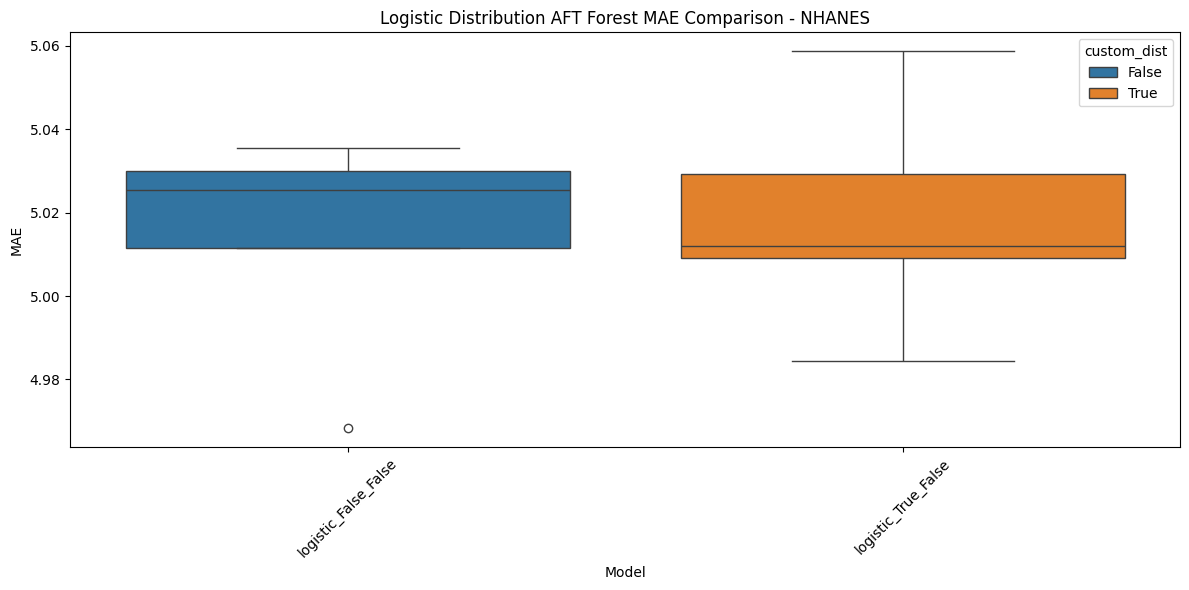

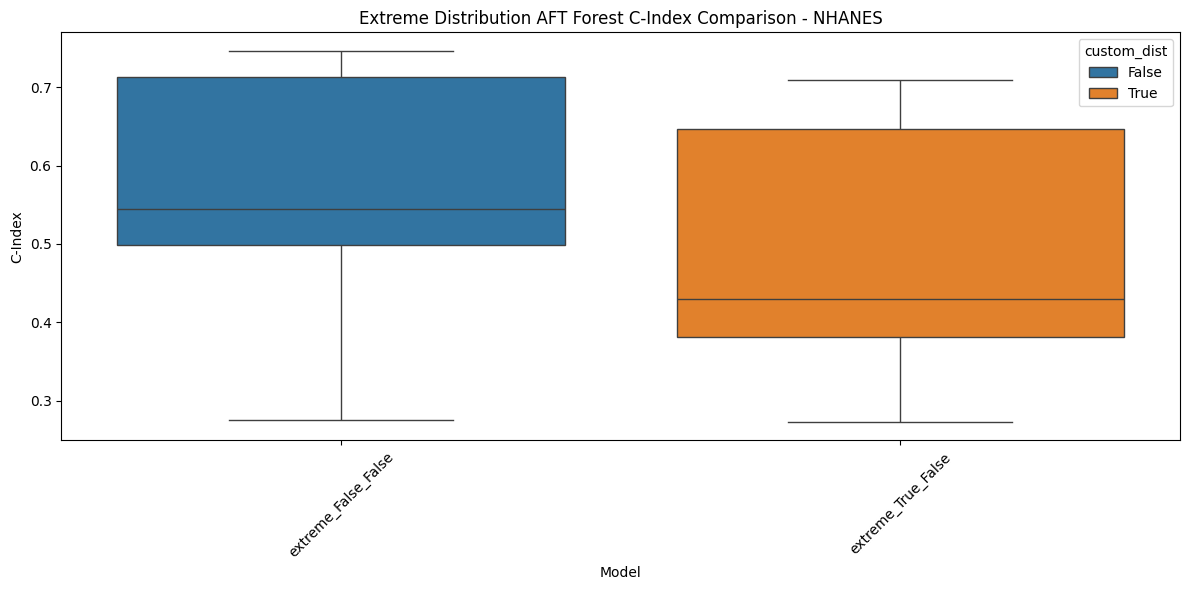

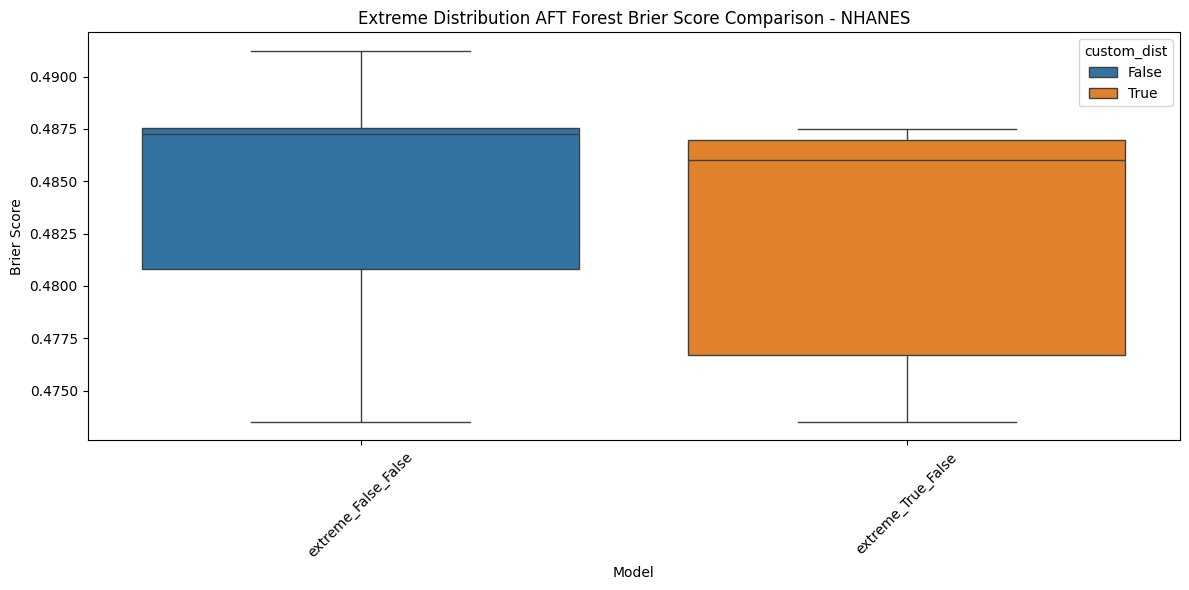

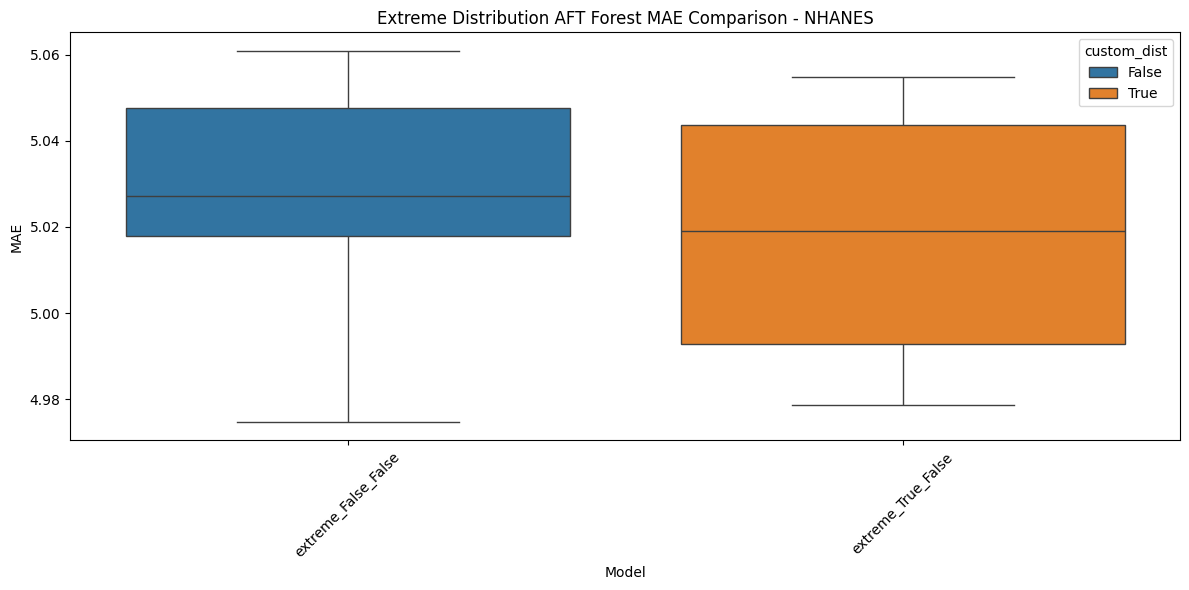

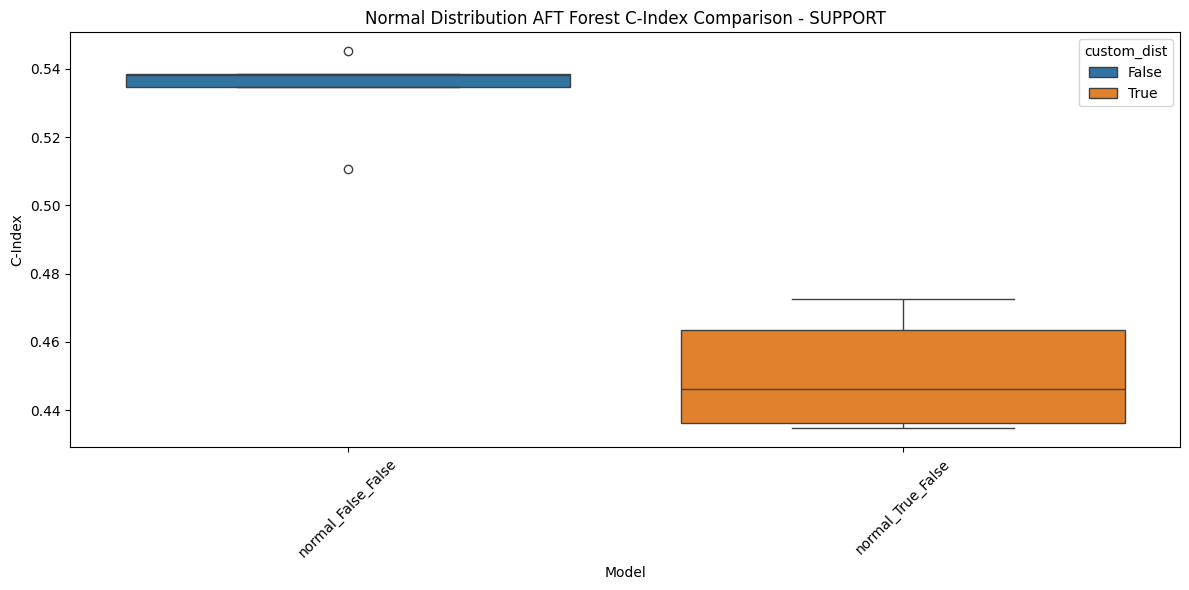

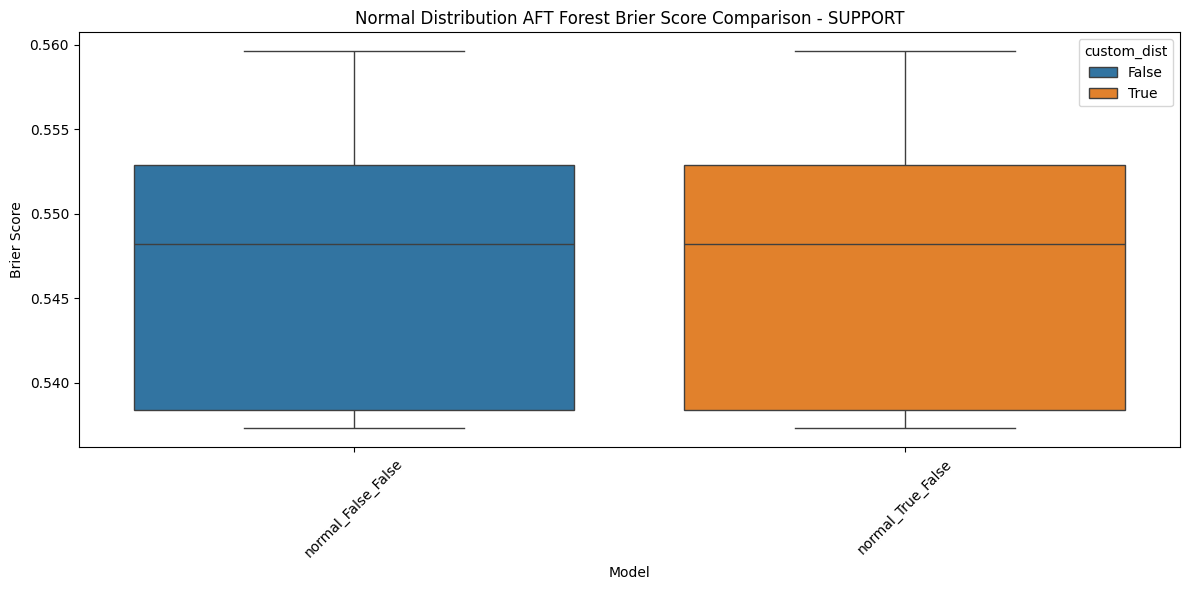

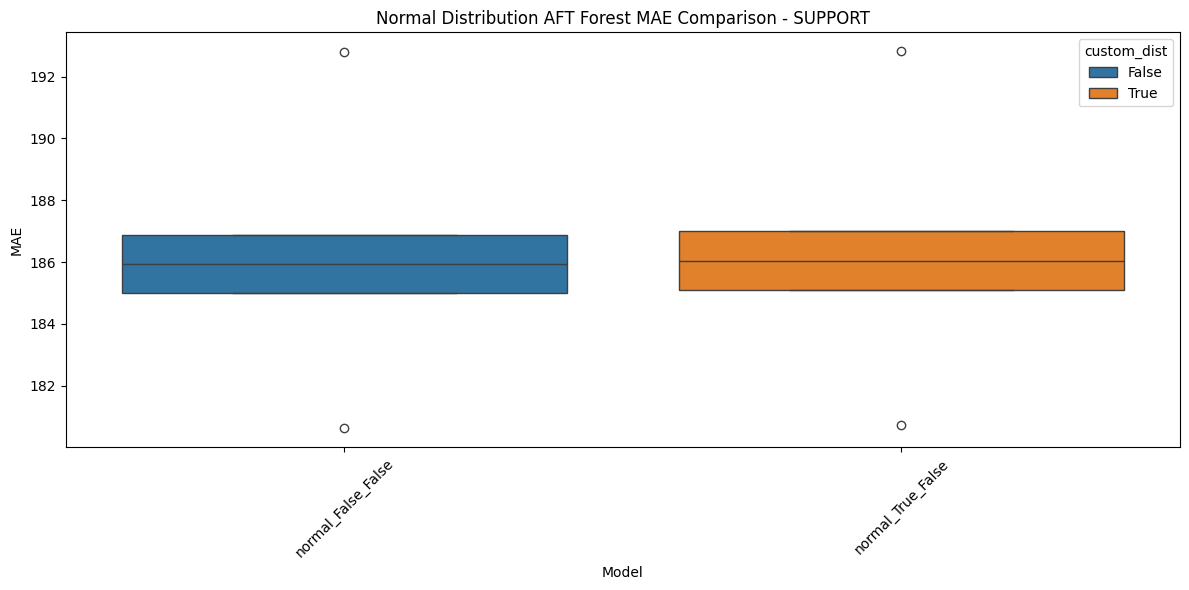

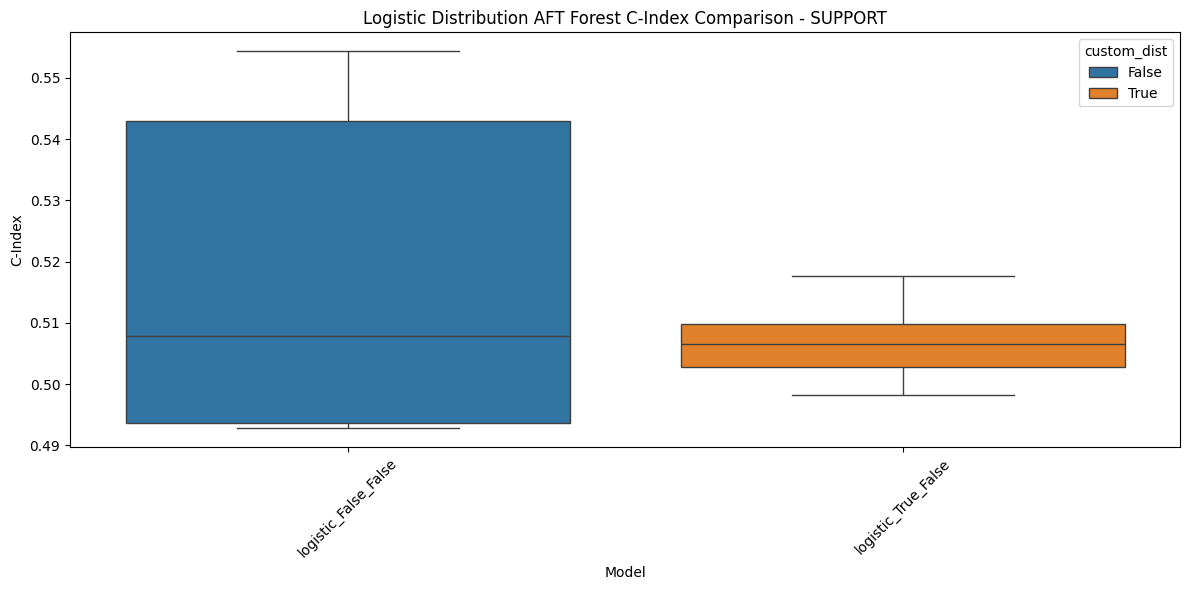

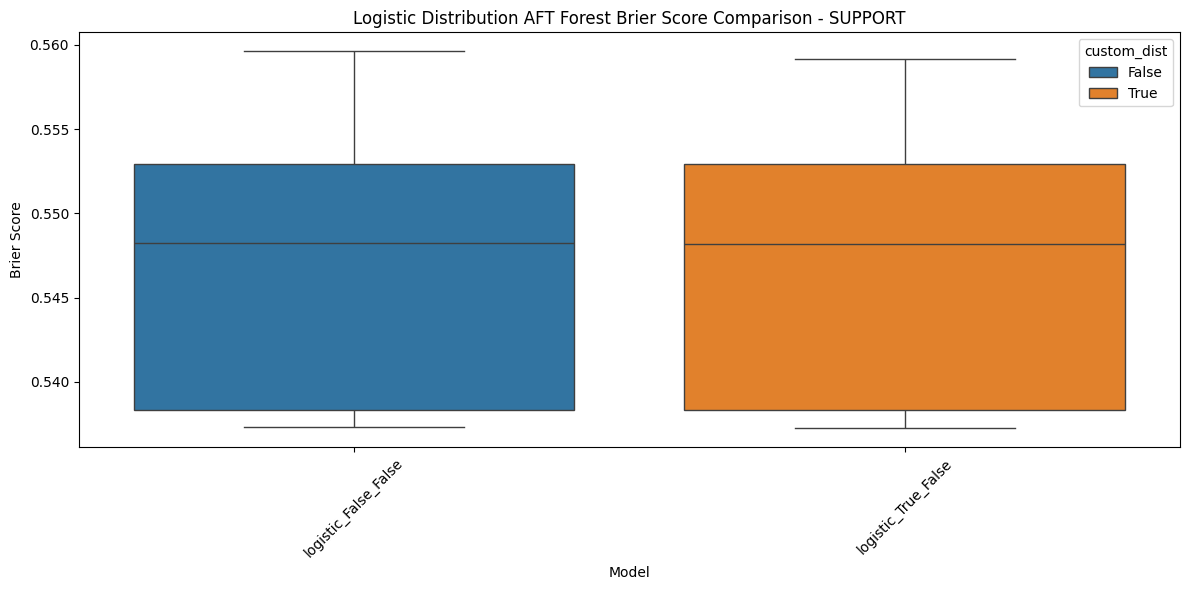

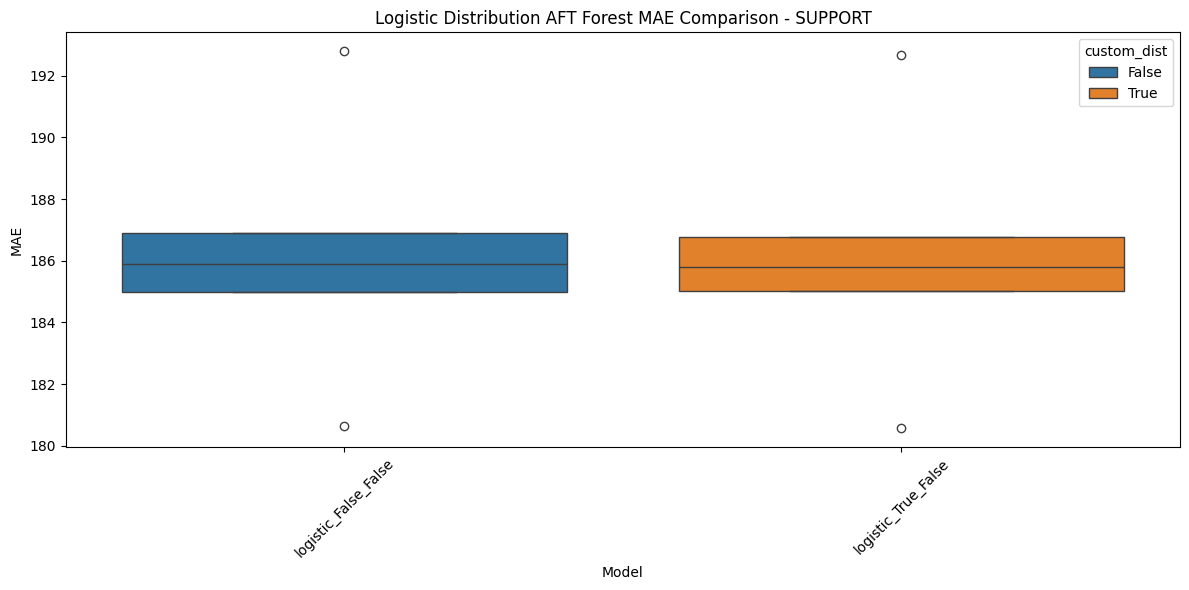

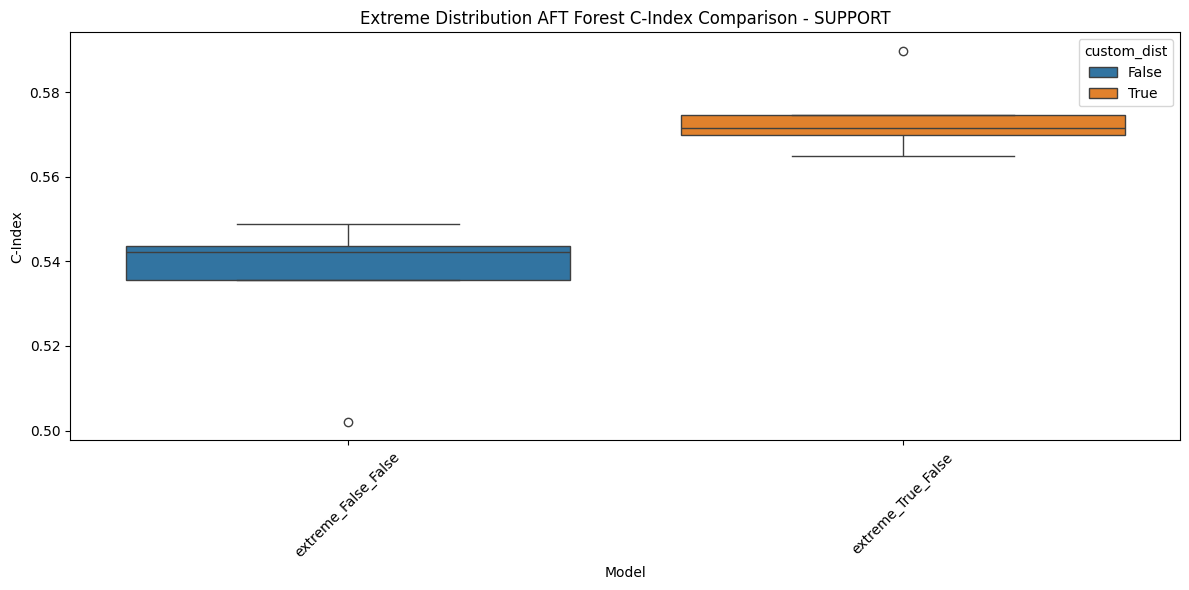

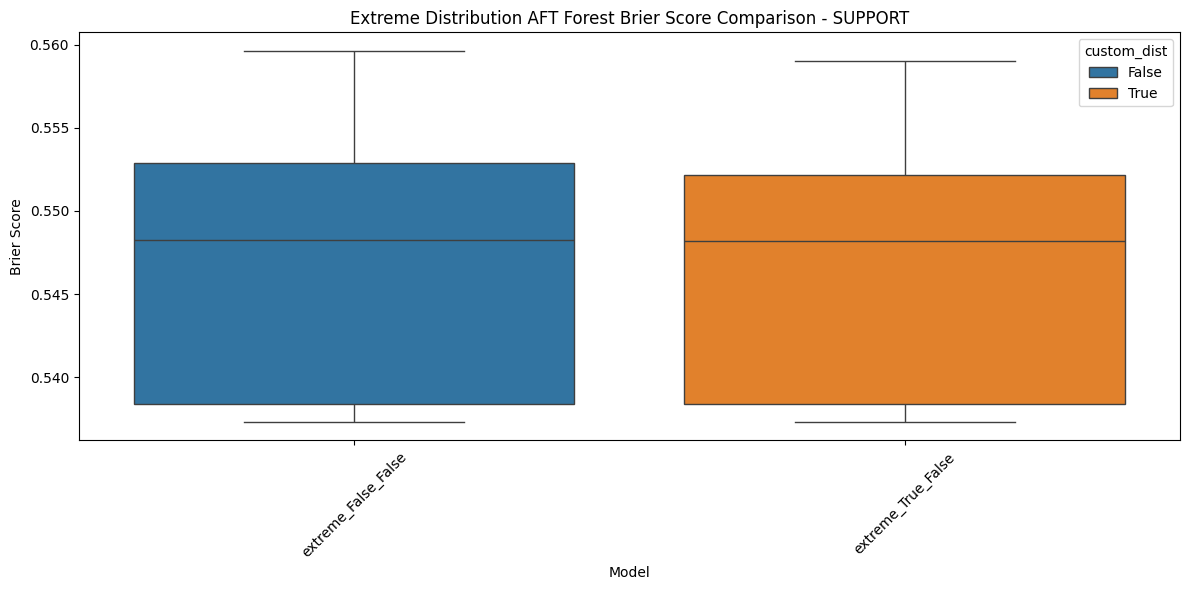

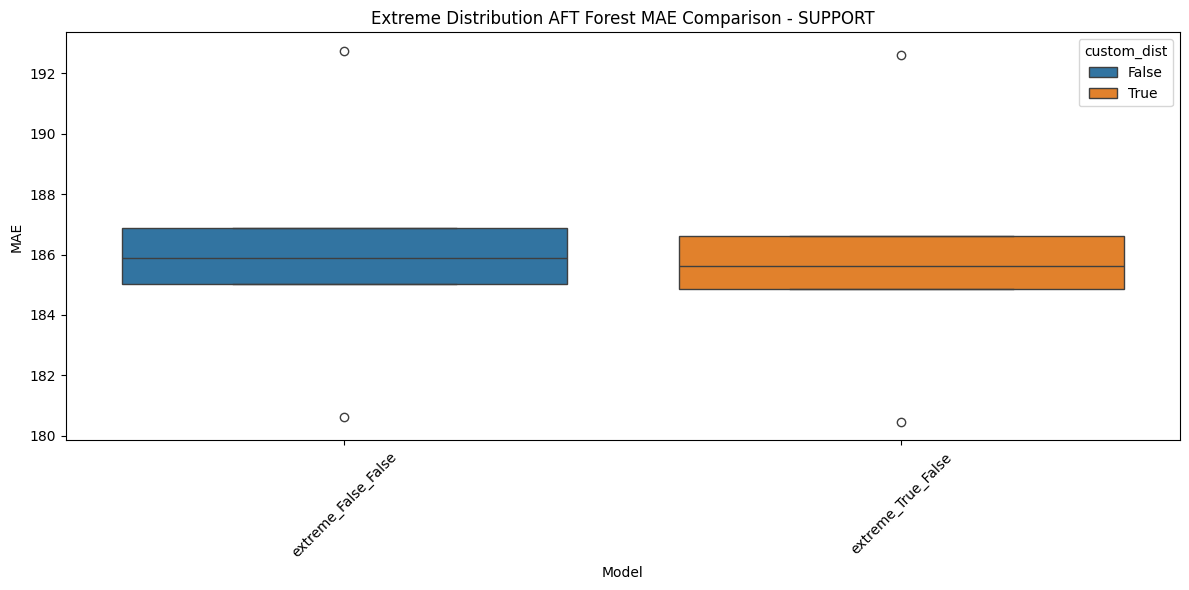

In [39]:
for df in [df_nhanes_wb, df_support_wb]:
    for function in ['normal', 'logistic', 'extreme']:
        for metric in ['c_index', 'brier_score', 'mae']:
            plot(
                df[df["function"] == function],
                function=function,
                dataset='NHANES' if df is df_nhanes_wb else 'SUPPORT',
                xlabel='Model',
                metric=metric
            )

### Experiment 2

In [40]:
df = aft_support_dataset

In [41]:
def boxplot_with_errorbars_bootstrap(df, dataset, title, xlabel, ylabel, metric='c_index'):
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df,
        x="function_custom_dist_bootstrap",
        y=metric,
        hue="bootstrap",
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    if not os.path.exists(f"graphs/{dataset}"):
        os.makedirs(f"graphs/{dataset}")
    plt.savefig(f"graphs/{dataset}/{title.replace(' ', '_').lower()}_{metric}.png")
    plt.show()


In [42]:

def plot_bootstrap(df, dataset, function, xlabel, ylabel=None, metric='c_index'):
    df_exploded = df.explode(metric)
    df_sorted = df_exploded.sort_values("function")
    df_sorted = df_sorted.sort_values("custom_dist", ascending=True)

    if metric == 'c_index':
        title = f"{'GMM' if function == 'gmm' else function.capitalize()} Distribution AFT Forest C-Index Comparison with Bootstrap - {dataset}"
        ylabel = 'C-Index'
    elif metric == 'brier_score':
        title = f"{'GMM' if function == 'gmm' else function.capitalize()} Distribution AFT Forest Brier Score Comparison with Bootstrap  - {dataset}"
        ylabel = 'Brier Score'  
    else:
        title = f"{'GMM' if function == 'gmm' else function.capitalize()} Distribution AFT Forest {metric.upper()} Comparison with Bootstrap  - {dataset}"
        ylabel = metric.upper()

    boxplot_with_errorbars_bootstrap(
        df_sorted,
        dataset=dataset,
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        metric=metric
    )

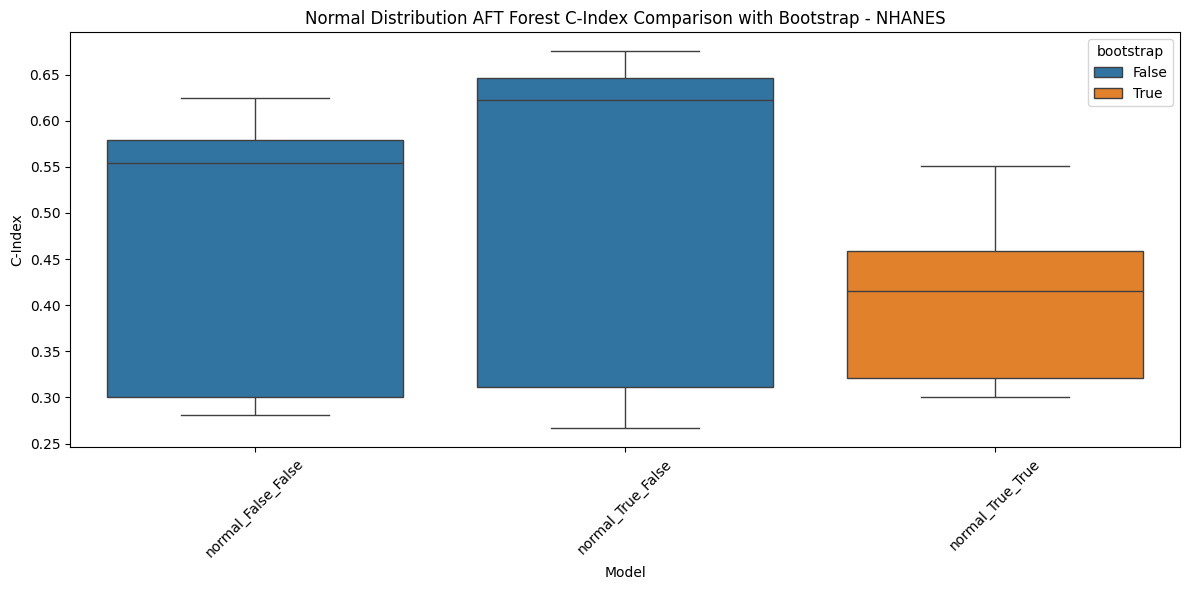

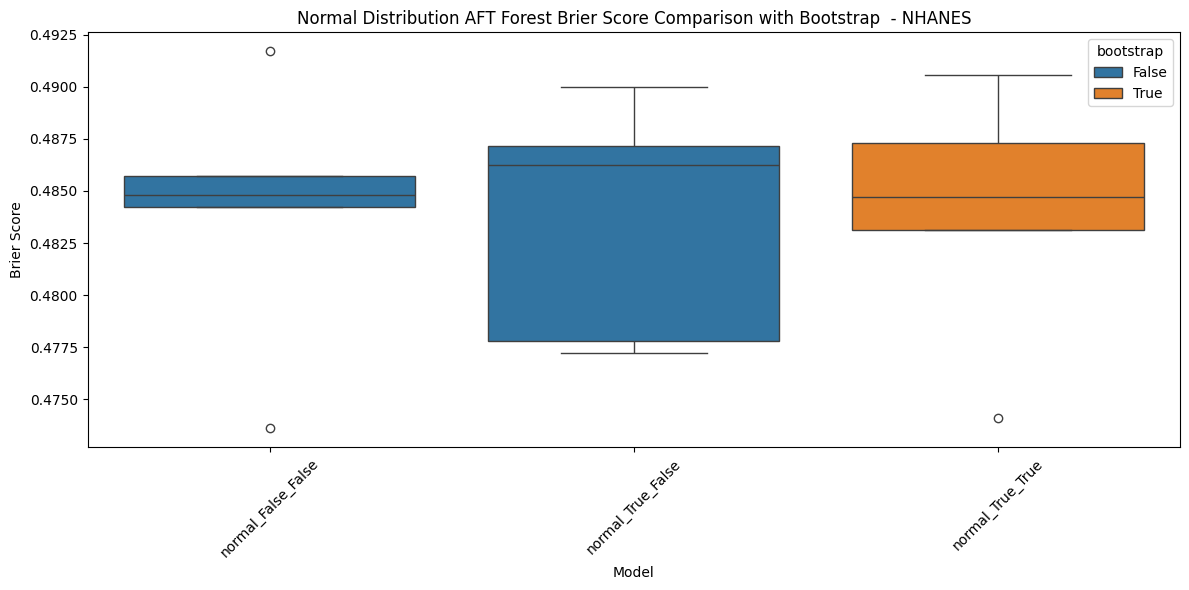

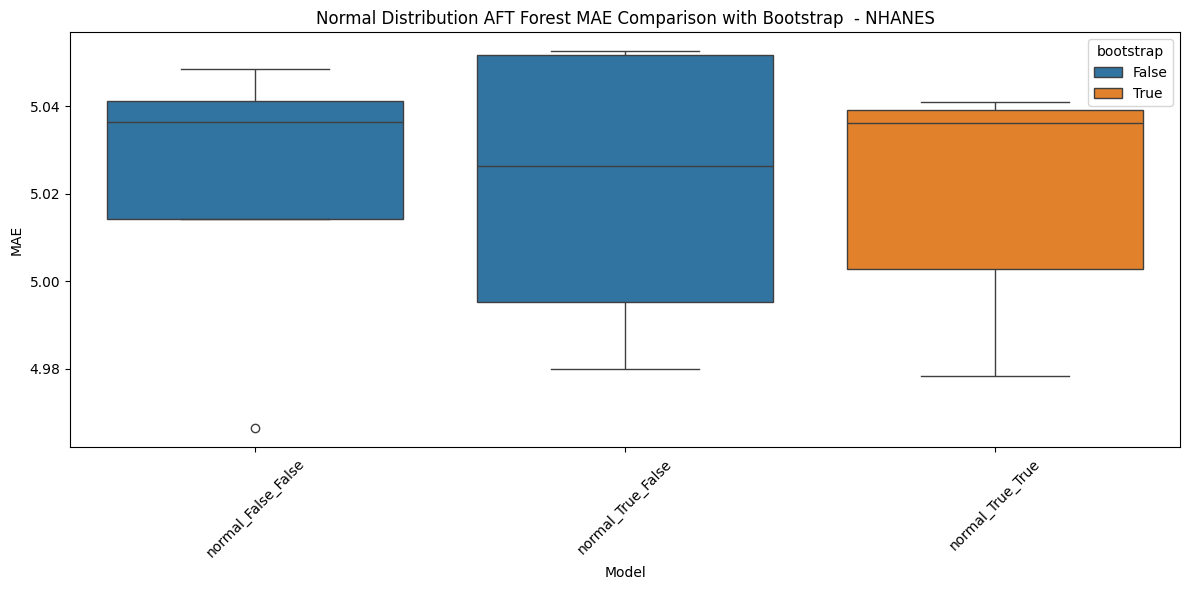

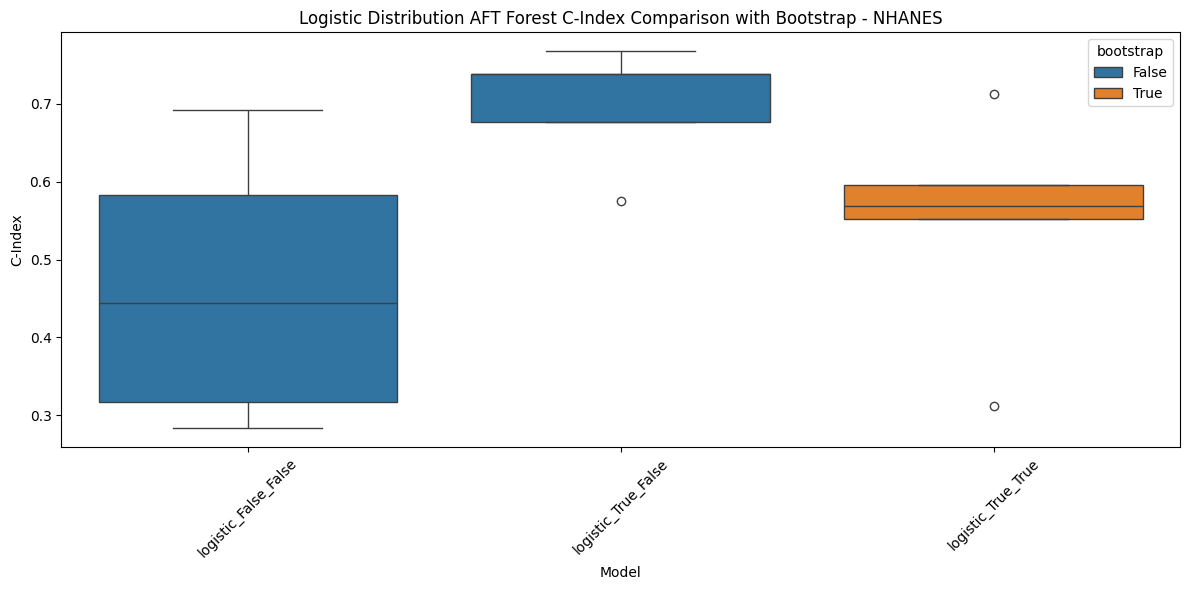

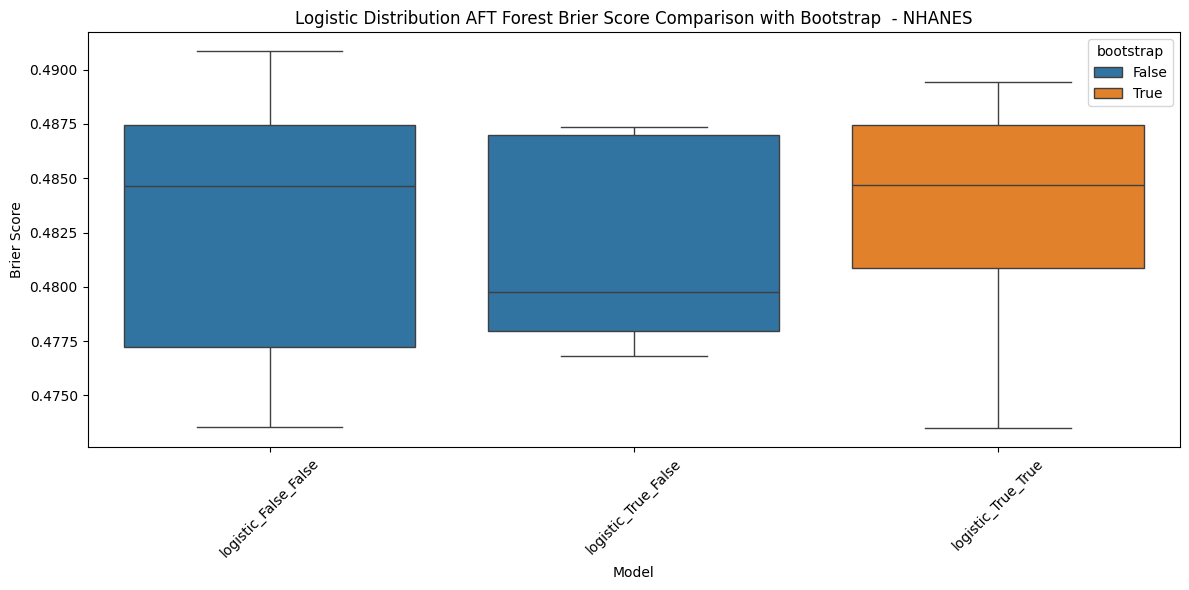

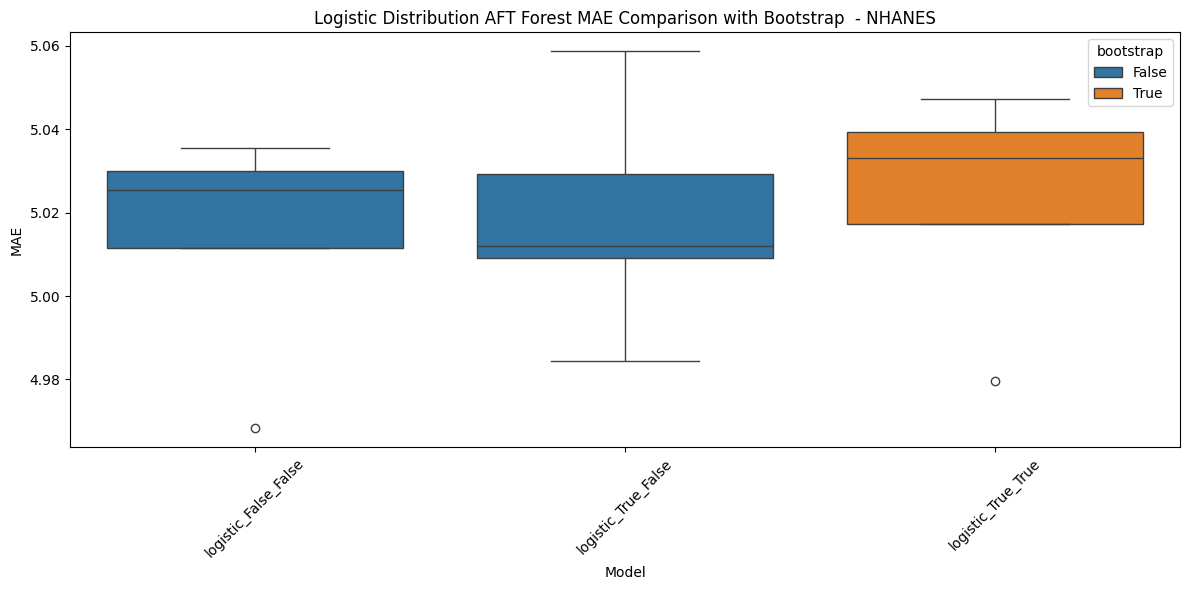

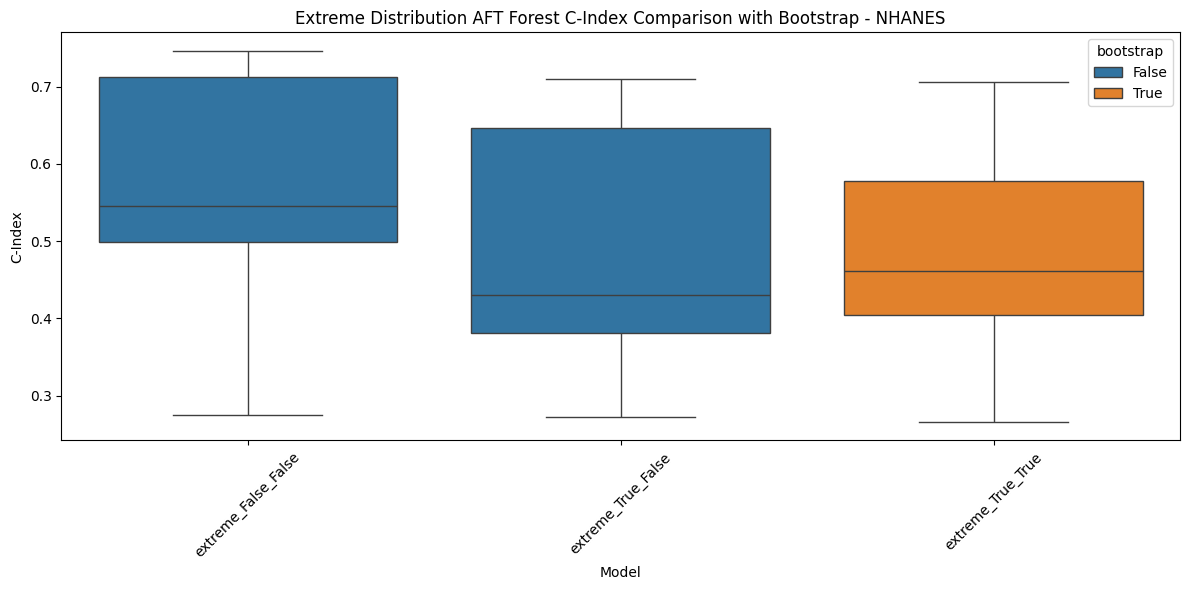

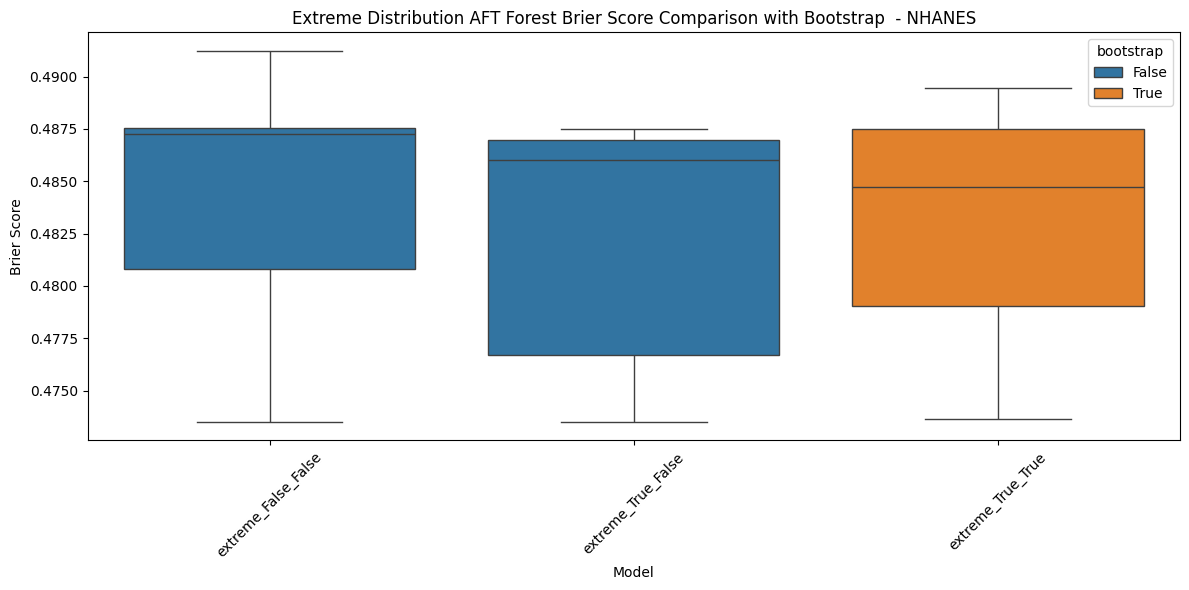

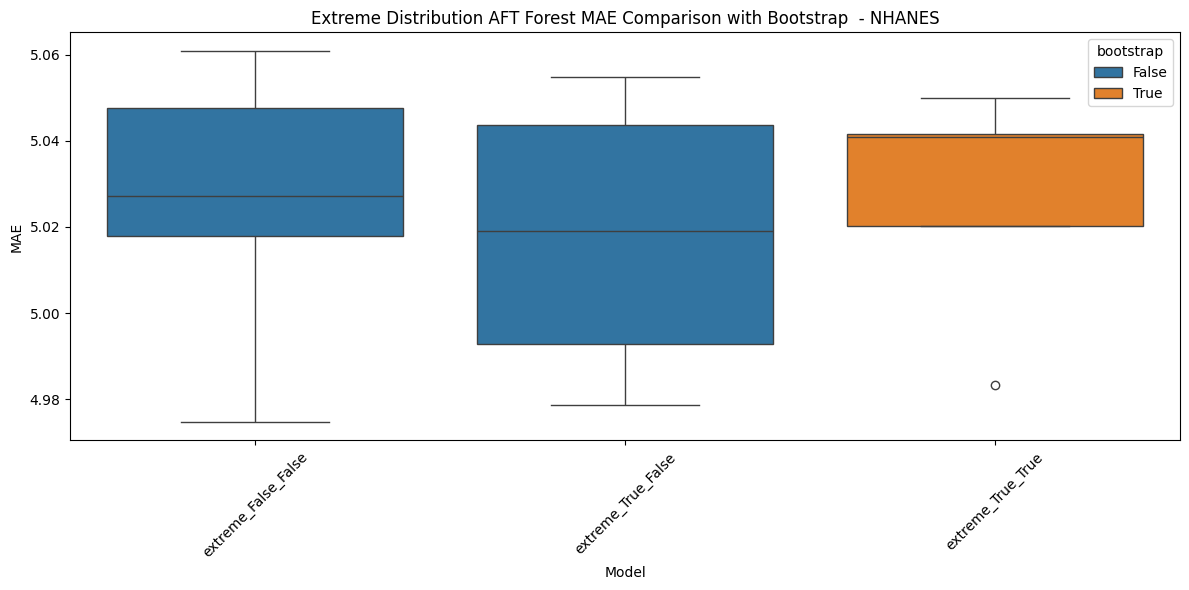

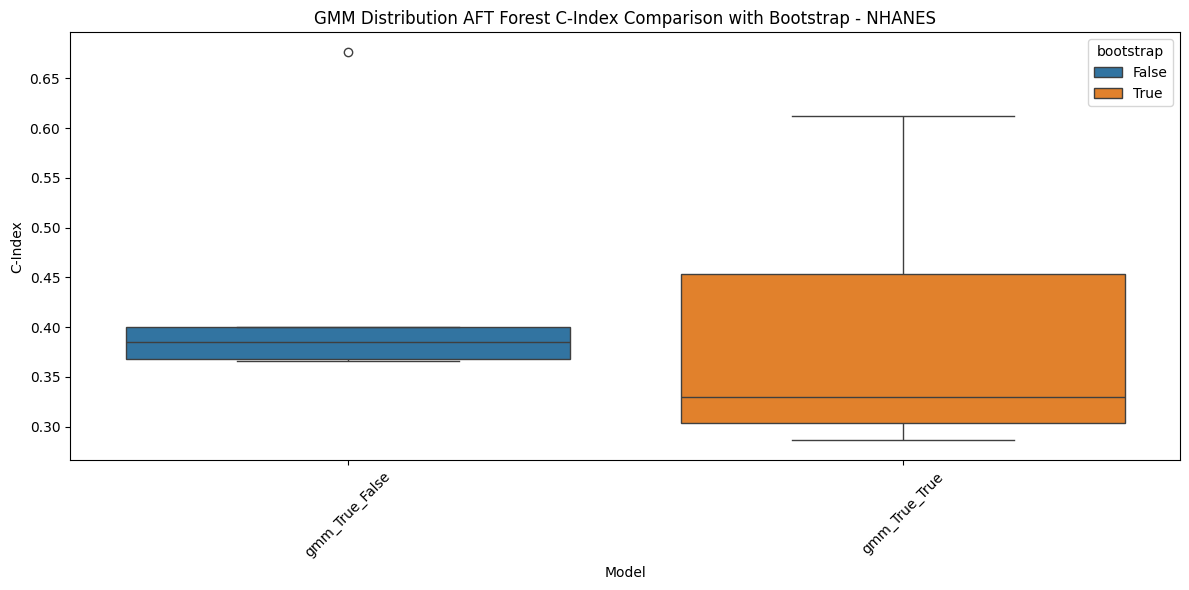

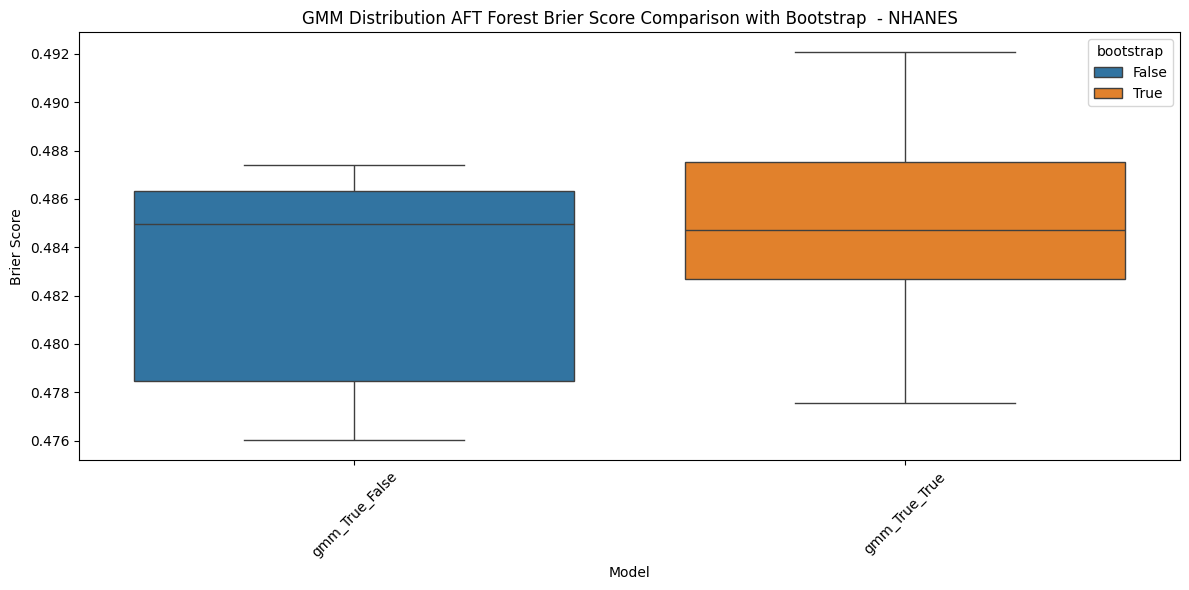

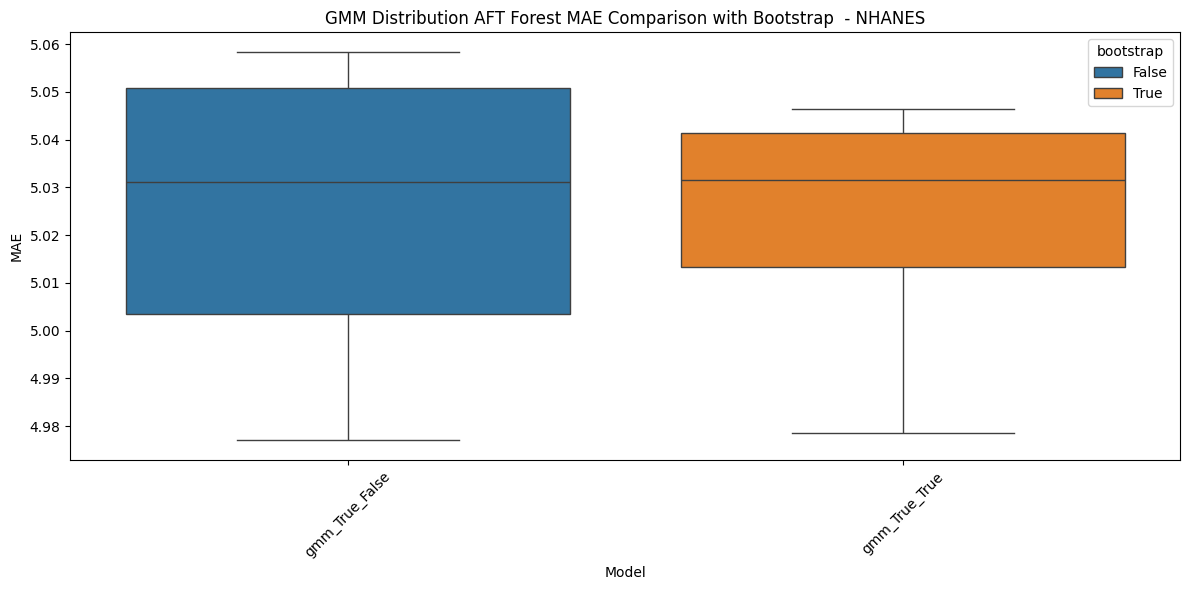

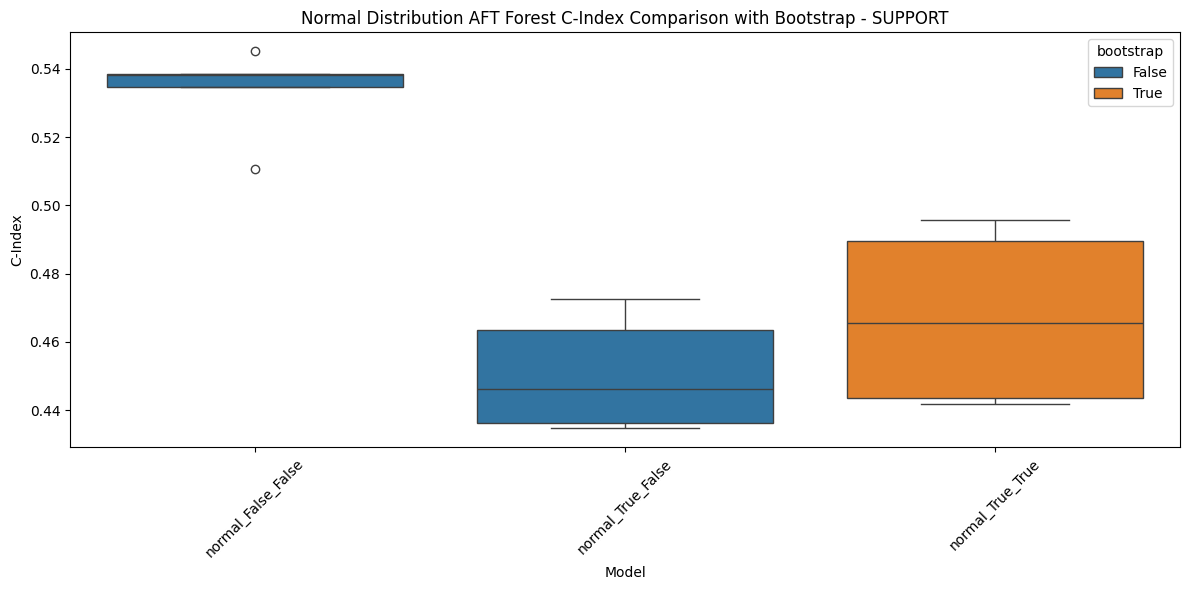

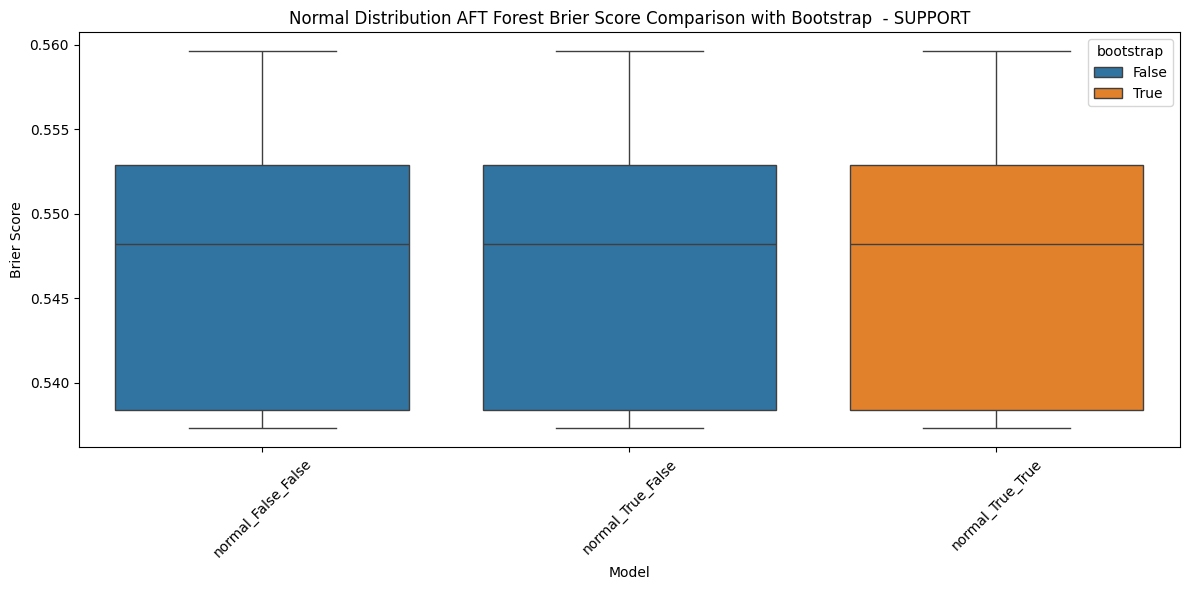

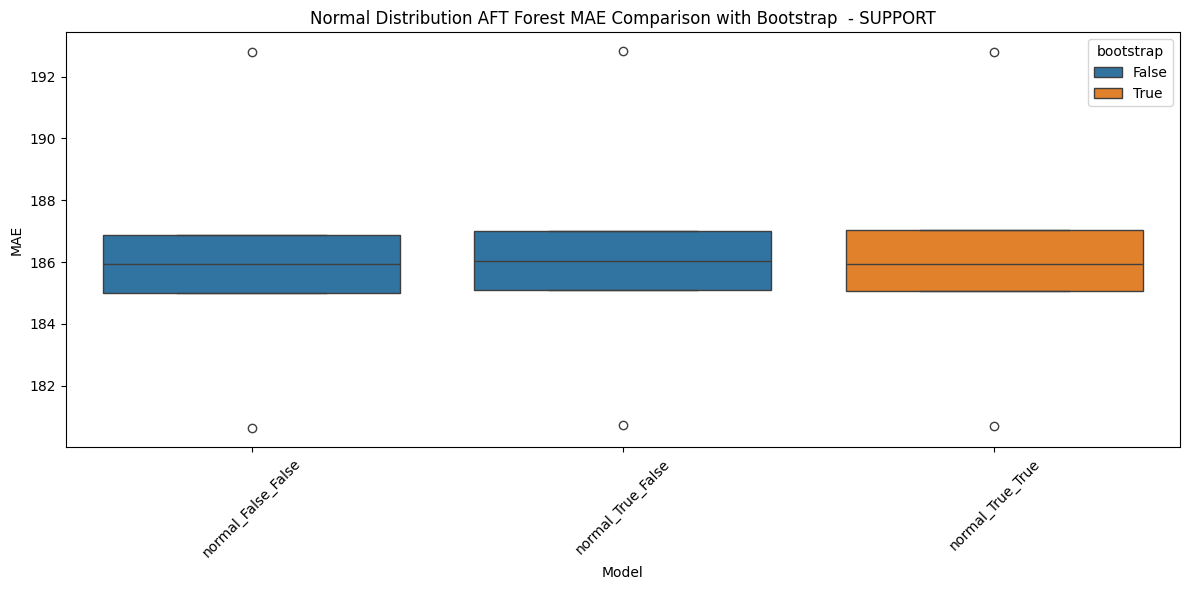

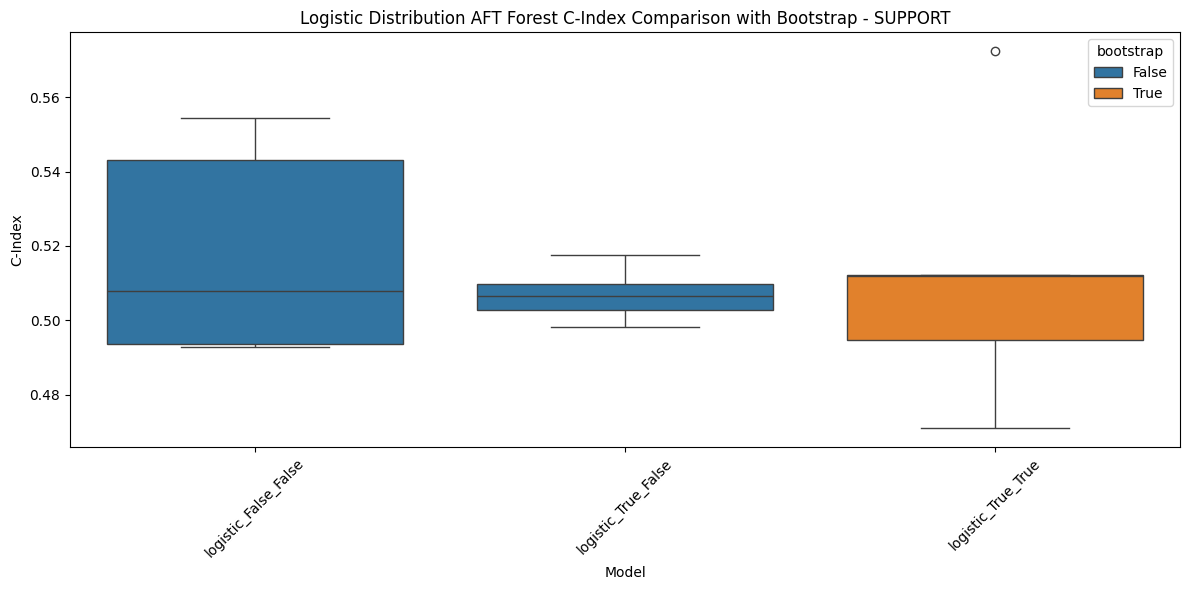

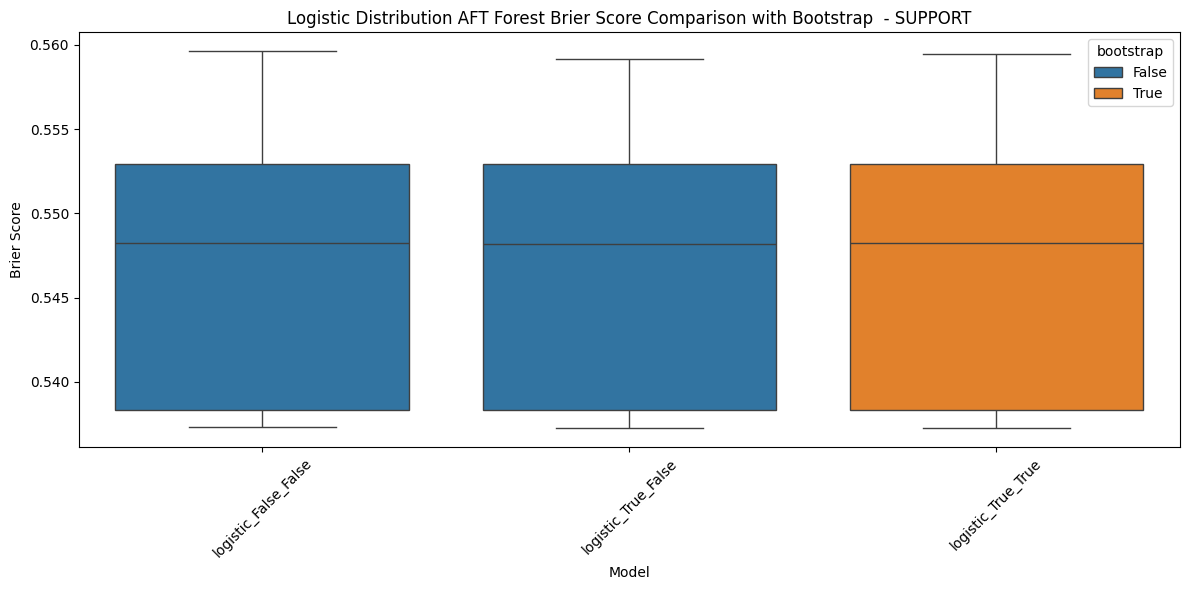

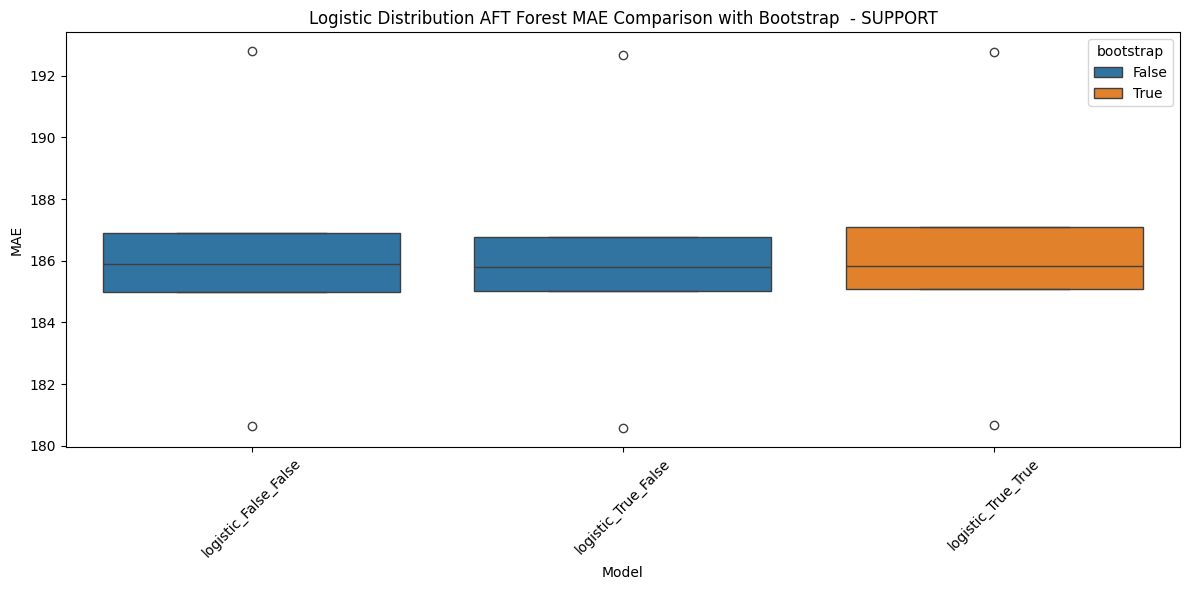

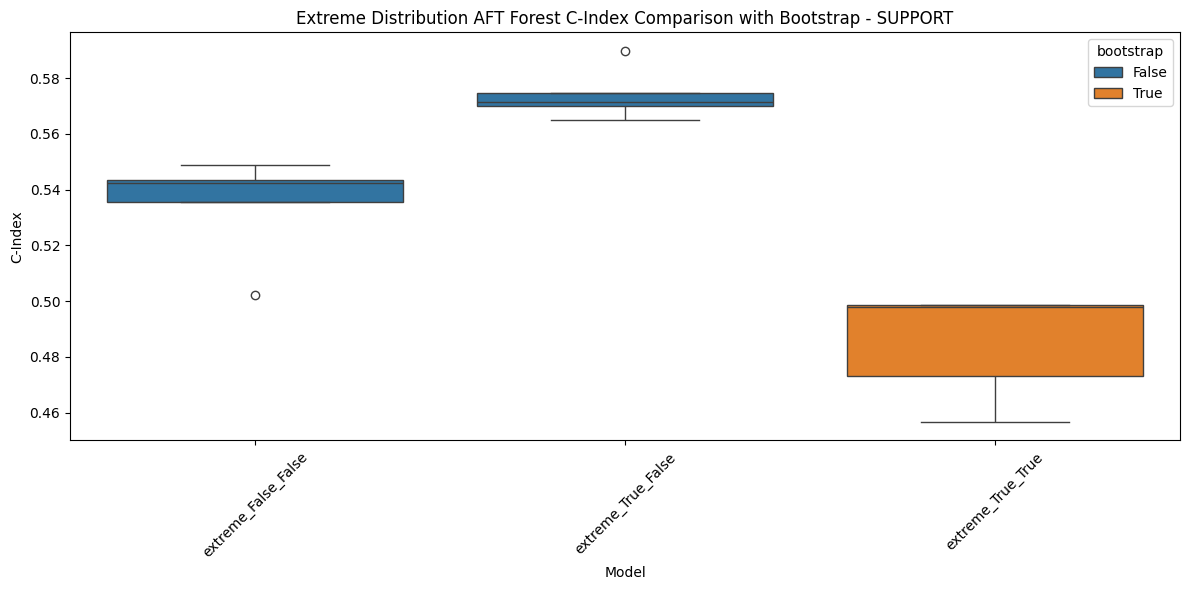

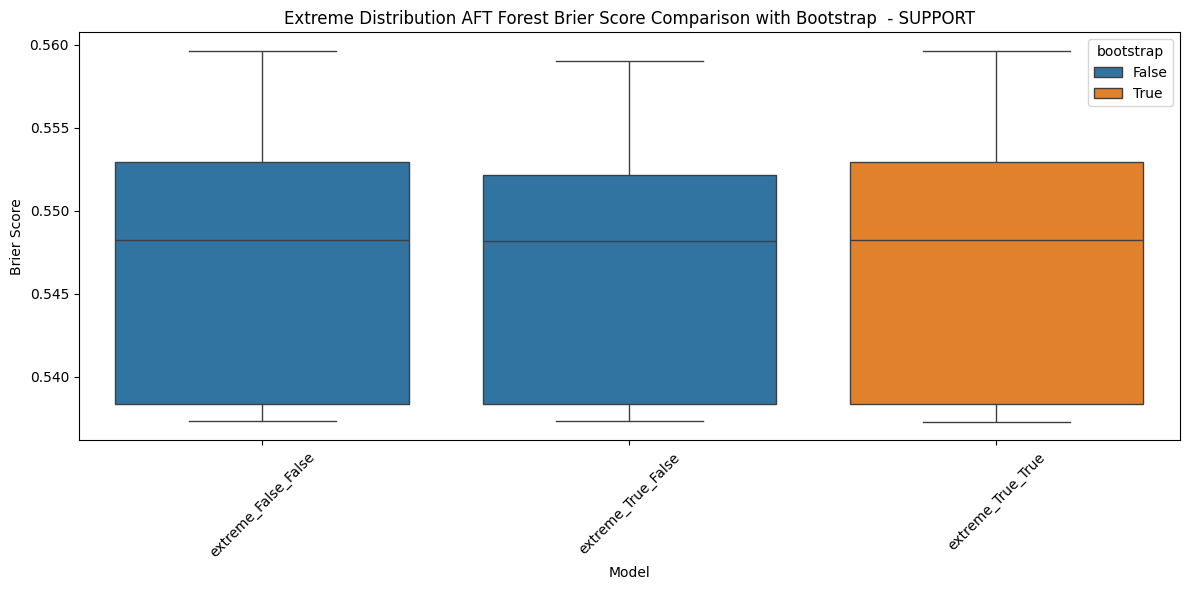

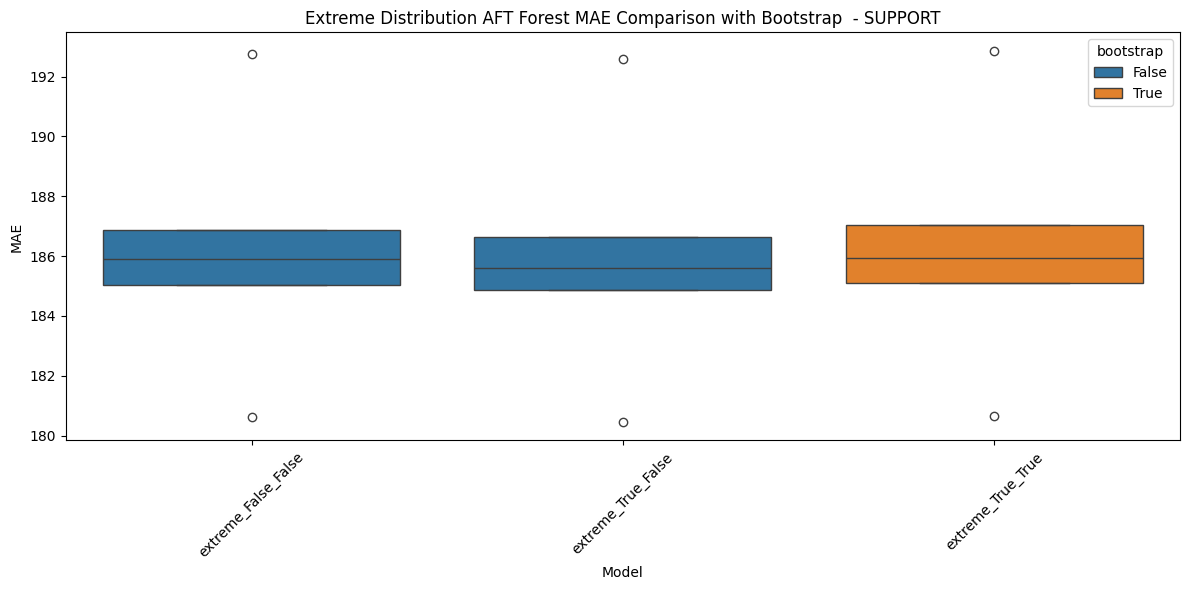

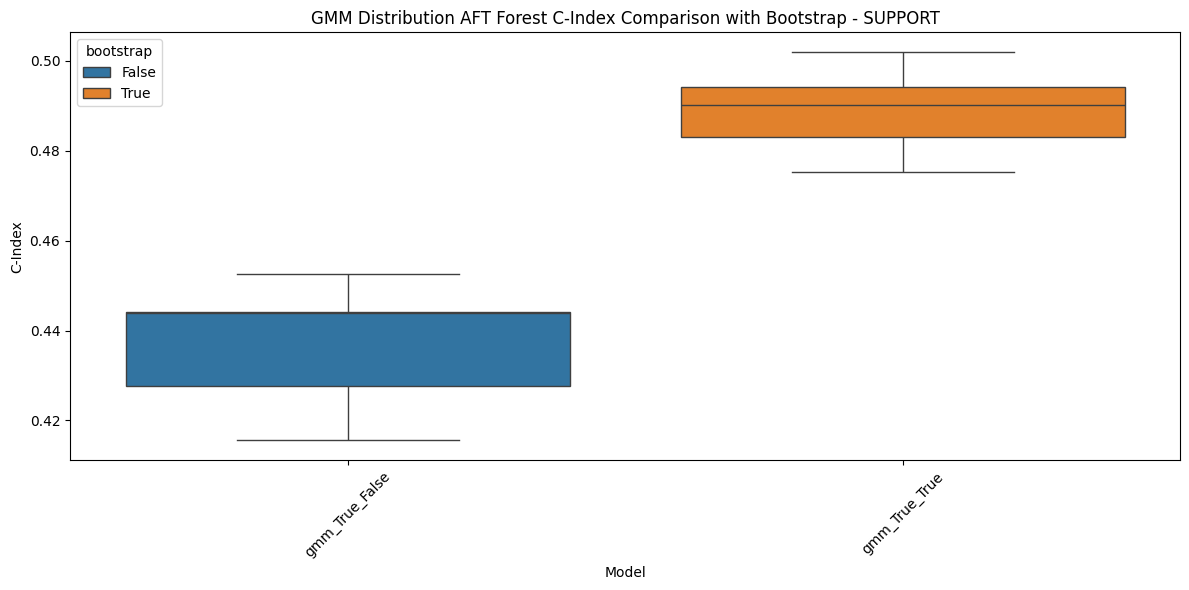

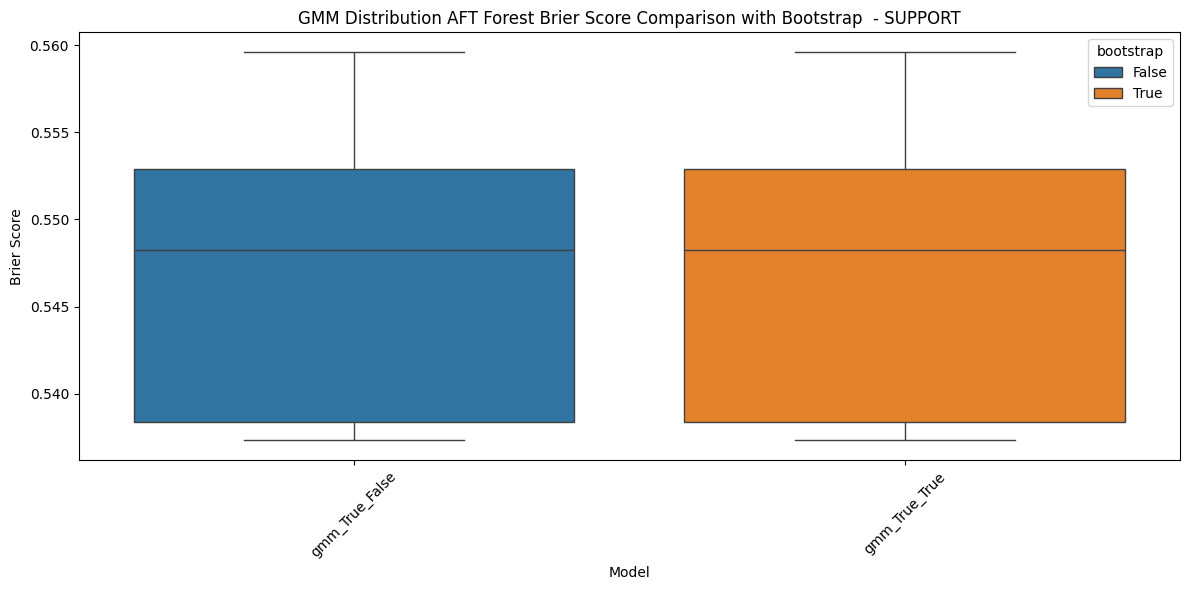

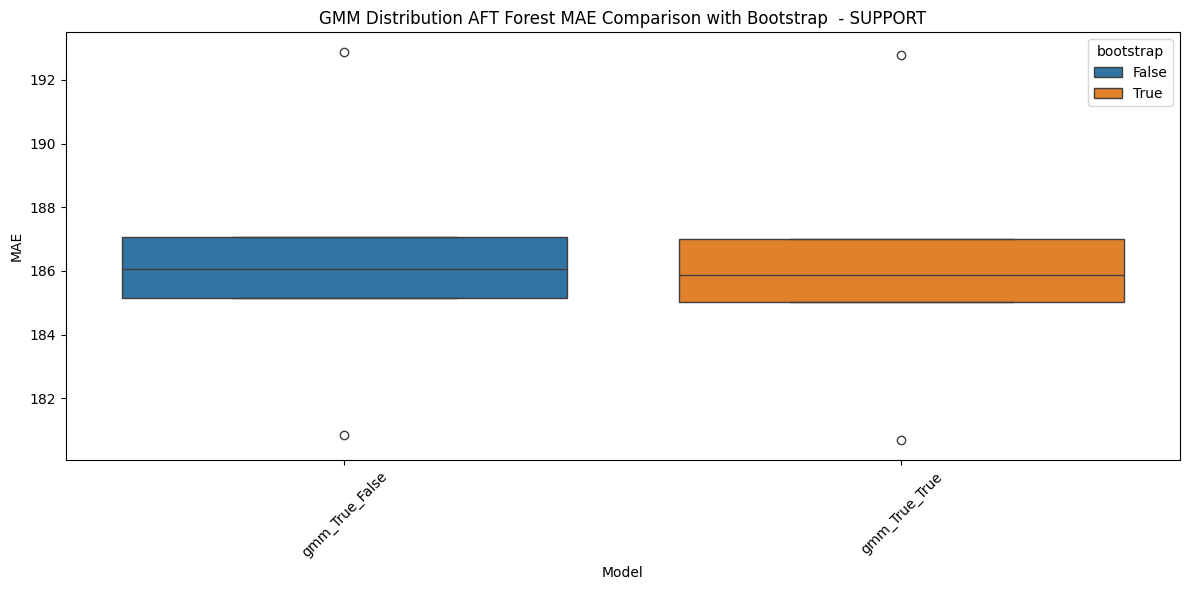

In [43]:
for df in [df_nhanes, df_support]:
    for function in ['normal', 'logistic', 'extreme', 'gmm']:
        for metric in ['c_index', 'brier_score', 'mae']:
            plot_bootstrap(
                df[df["function"] == function],
                function=function,
                dataset='NHANES' if df is df_nhanes else 'SUPPORT',
                xlabel='Model',
                metric=metric
            )

In [44]:
def boxplot_with_errorbars_grouped_bootstrap(df, dataset, title, xlabel, ylabel, metric='c_index'):
    # Copy dataframe
    df = df.copy()

    # Map True/False to readable labels
    mapping = {True: "With", False: "Without"}

    df["custom_bootstrap"] = (
        df["custom_dist"].map(mapping) + " | " + df["bootstrap"].map(mapping)
    )

    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(
        data=df,
        x="function",
        y=metric,
        hue="custom_bootstrap",
        hue_order=["Without | Without", "With | Without", "With | With"]
    )

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)

    # Move legend outside
    plt.legend(
        title="Custom Dist | Bootstrap",
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0
    )

    plt.tight_layout()

    # Save
    path = f"graphs/{dataset}"
    os.makedirs(path, exist_ok=True)
    plt.savefig(
        f"{path}/{title.replace(' ', '_').lower()}_{metric}.png",
        bbox_inches="tight"
    )
    plt.show()



In [45]:
def plot_grouped_bootstrap(df, dataset, xlabel, metric='c_index'):
    # Handle possible list columns
    df_exploded = df.explode(metric)
    df_sorted = df_exploded.sort_values("custom_dist", ascending=True)

    # Titles and labels
    if metric == 'c_index':
        title = f"AFT Forest C-Index Comparison with Bootstrap - {dataset}"
        ylabel = 'C-Index'
    elif metric == 'brier_score':
        title = f"AFT Forest Brier Score Comparison with Bootstrap - {dataset}"
        ylabel = 'Brier Score'
    else:
        title = f"AFT Forest {metric.upper()} Comparison with Bootstrap - {dataset}"
        ylabel = metric.upper()

    # Call plotting function
    boxplot_with_errorbars_grouped_bootstrap(
        df_sorted,
        dataset=dataset,
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        metric=metric
    )

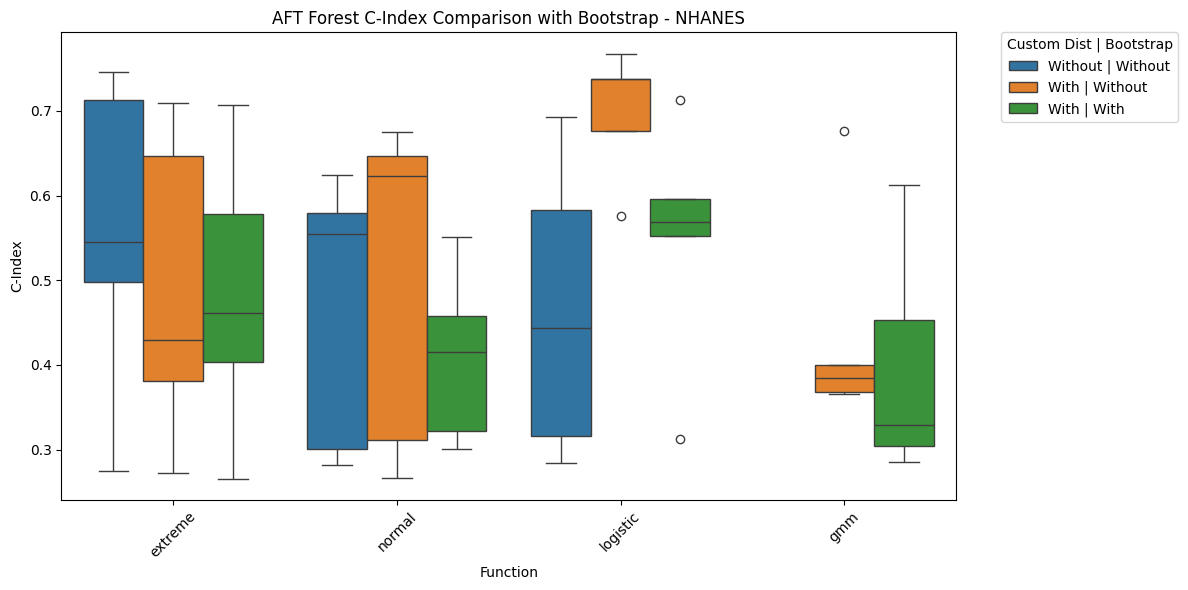

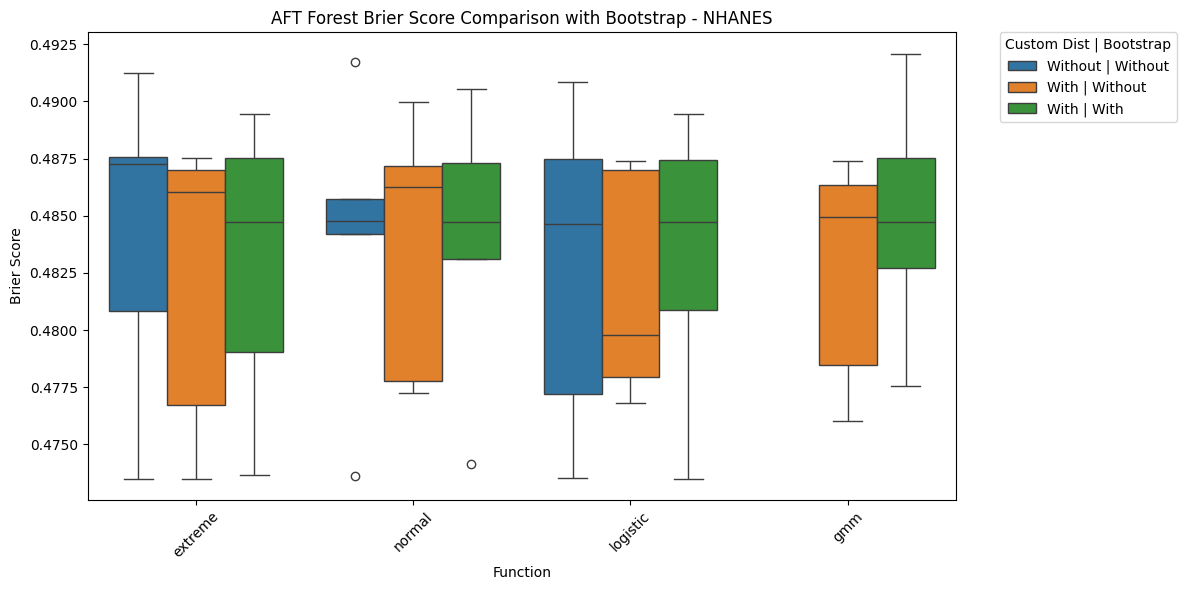

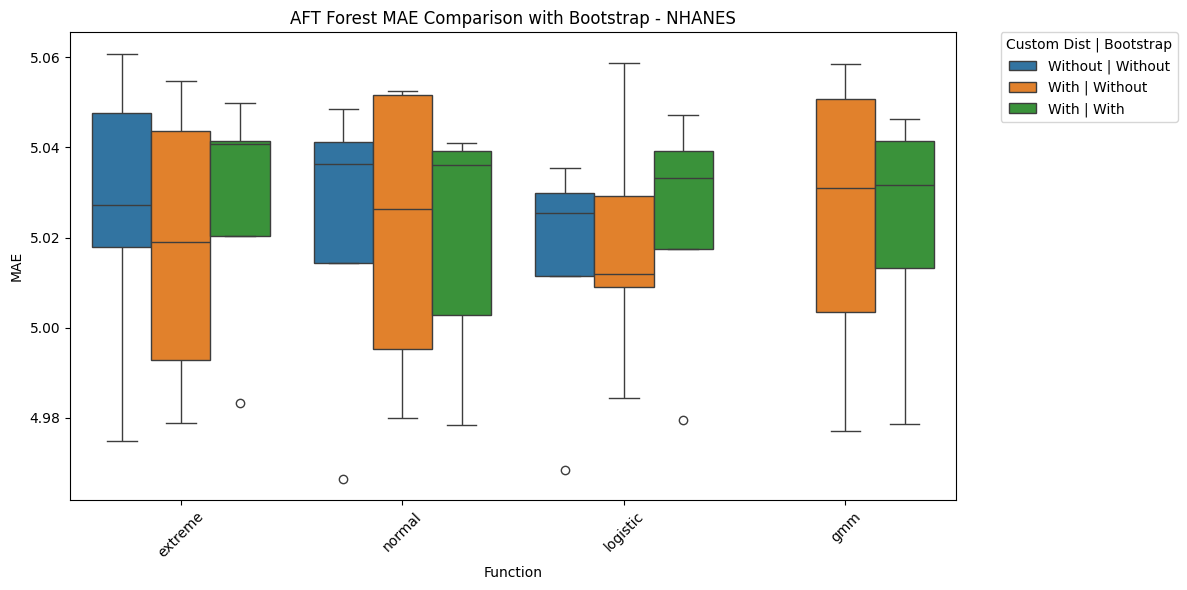

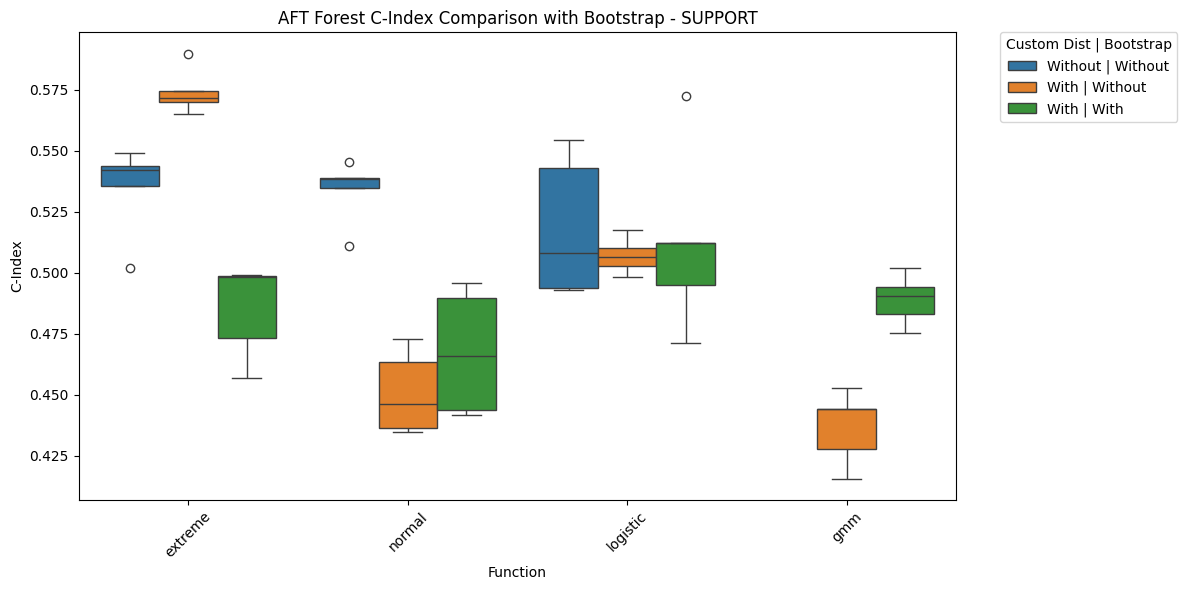

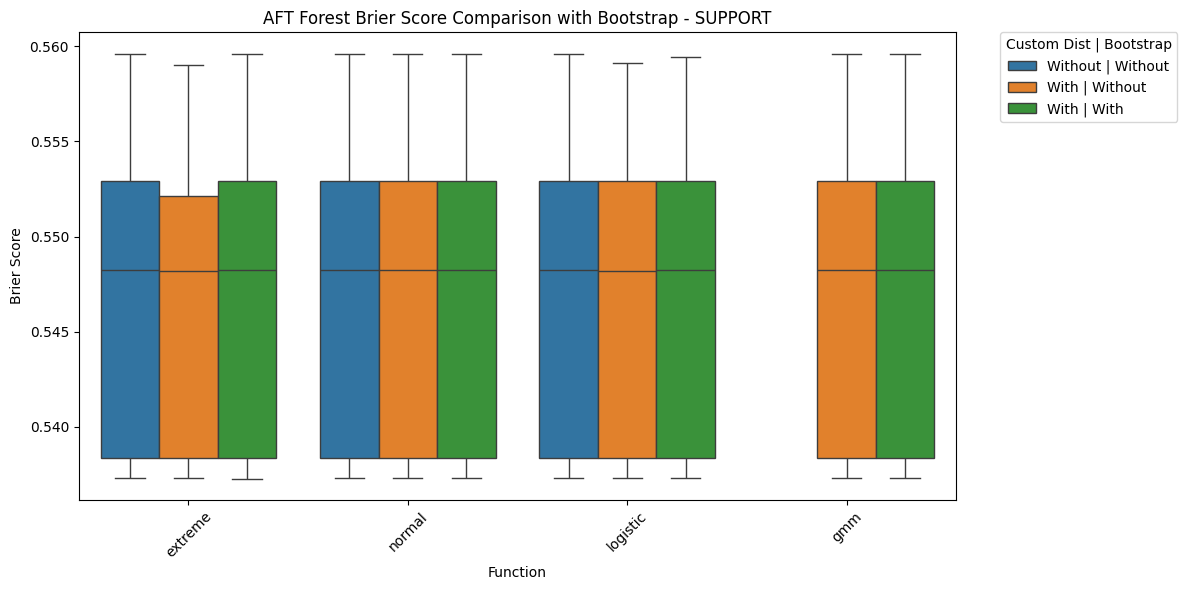

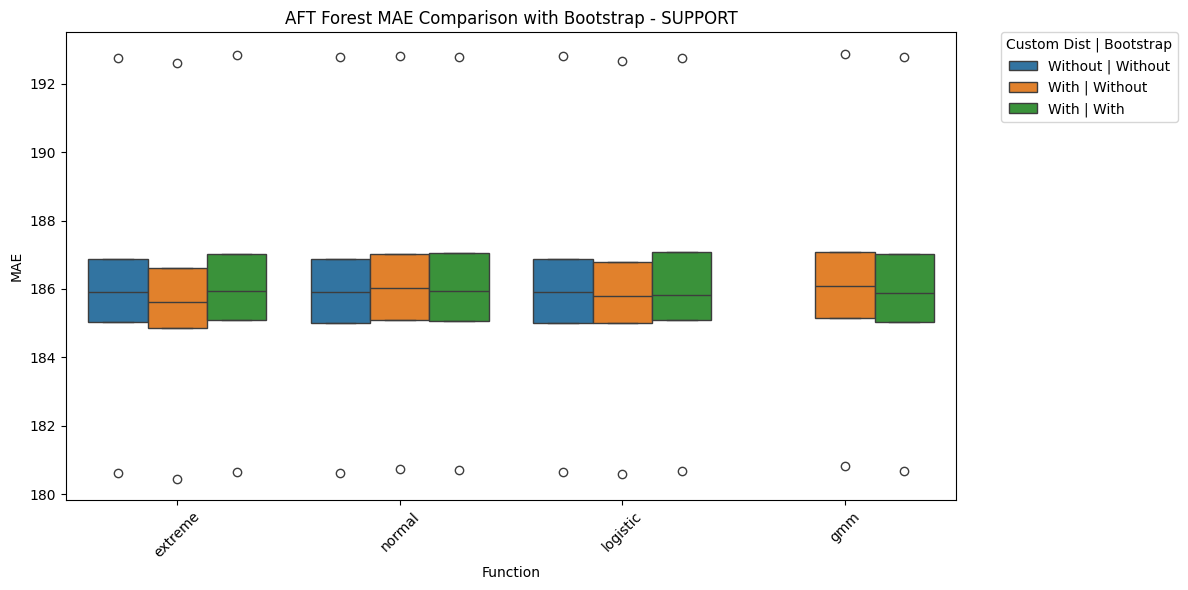

In [46]:
for df in [df_nhanes, df_support]:
    for metric in ['c_index', 'brier_score', 'mae']:
        plot_grouped_bootstrap(
            df,
            dataset='NHANES' if df is df_nhanes else 'SUPPORT',
            xlabel='Function',
            metric=metric
        )

### Experiment 3

In [47]:
xgb_dfs_nhanes = xgb_dfs[(xgb_dfs['dataset'] == 'nhanes') & (xgb_dfs['mean_mae'] < 100)]
rsf_dfs_nhanes = rsf_dfs[xgb_dfs['dataset'] == 'nhanes']

/tmp/ipykernel_29437/2422708006.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rsf_dfs_nhanes = rsf_dfs[xgb_dfs['dataset'] == 'nhanes']


In [48]:
best_xgb_nhanes = xgb_dfs_nhanes.loc[xgb_dfs_nhanes['mean_c_index'].idxmax()]

In [49]:
best_xgb_nhanes

params              {'max_depth': 6, 'sigma': 1, 'learning_rate': ...
c_index             [0.804820774482907, 0.804515913302478, 0.82587...
brier_score         [0.1611293500699609, 0.16259883660005028, 0.15...
mae                 [14.488692639097508, 16.127794203319183, 12.75...
mean_c_index                                                 0.810759
mean_brier_score                                             0.162387
mean_mae                                                    14.765109
c_index_test                                                 0.813921
brier_score_test                                             0.163968
mae_test                                                    13.439521
index                                                              10
model                                                         xgboost
function                                                       normal
dataset                                                        nhanes
Name: 49, dtype: obj

In [50]:
best_rfs_nhanes  = rsf_dfs_nhanes.loc[rsf_dfs_nhanes['mean_c_index'].idxmax()]
best_rfs_nhanes 

params              {'n_trees': 100, 'max_depth': 10, 'min_samples...
c_index             [0.7649444229981524, 0.7490075360969617, 0.773...
brier_score         [0.1373800693598026, 0.13949749651573728, 0.13...
mae                 [7.128426171529618, 7.4532979194333775, 7.0839...
mean_c_index                                                 0.760842
mean_brier_score                                             0.139018
mean_mae                                                     7.300717
c_index_test                                                 0.764877
brier_score_test                                             0.140506
mae_test                                                     7.302813
index                                                              10
model                                                             rsf
function                                                         None
dataset                                                        nhanes
Name: 9, dtype: obje

In [51]:
best_aft_nhanes_dataset = aft_nhanes_dataset.loc[aft_nhanes_dataset['mean_c_index'].idxmax()]
best_aft_nhanes_dataset

params                            {'function': 'logistic', 'is_bootstrap': False...
c_index                           [0.7676230812526337, 0.6764803363255782, 0.737...
brier_score                       [0.47977576166626484, 0.47796293257820754, 0.4...
mae                               [5.008994106222506, 5.058669603141295, 4.98439...
mean_c_index                                                               0.699081
mean_brier_score                                                           0.481788
mean_mae                                                                   5.018617
c_index_test                                                               0.771018
brier_score_test                                                           0.478409
mae_test                                                                   5.034293
index                                                                             5
model                                                                    aft

In [52]:
combined_best_nhanes = pd.DataFrame({
    'XGB': best_xgb_nhanes,
    'RSF': best_rfs_nhanes,
    'AFT': best_aft_nhanes_dataset,
}).T.reset_index()

In [53]:
xgb_dfs_support = xgb_dfs[(xgb_dfs['dataset'] == 'support') & (xgb_dfs['mean_mae'] < 1000)]
rsf_dfs_support = rsf_dfs[rsf_dfs['dataset'] == 'support']

In [54]:
best_xgb_support = xgb_dfs_support.loc[xgb_dfs_support['mean_c_index'].idxmax()]
best_xgb_support

params              {'max_depth': 6, 'sigma': 0.5, 'learning_rate'...
c_index             [0.7678028564873236, 0.7625545931797126, 0.763...
brier_score         [0.4411279585618013, 0.4356096016568574, 0.429...
mae                 [304.8284186906712, 255.5668895434308, 268.992...
mean_c_index                                                 0.764206
mean_brier_score                                             0.436796
mean_mae                                                   270.094625
c_index_test                                                 0.783354
brier_score_test                                             0.421734
mae_test                                                   243.179256
index                                                               9
model                                                         xgboost
function                                                      extreme
dataset                                                       support
Name: 18, dtype: obj

In [55]:
best_rsf_support = rsf_dfs_support.loc[rsf_dfs_support['mean_c_index'].idxmax()]
best_rsf_support

params              {'n_trees': 100, 'max_depth': 10, 'min_samples...
c_index             [0.678782155642524, 0.6661320004519224, 0.6811...
brier_score         [0.3727953777571319, 0.3728497864778987, 0.377...
mae                 [313.30745967741933, 321.11995967741933, 285.2...
mean_c_index                                                  0.67509
mean_brier_score                                             0.376397
mean_mae                                                   308.654929
c_index_test                                                 0.681587
brier_score_test                                             0.381685
mae_test                                                   306.218548
index                                                              10
model                                                             rsf
function                                                         None
dataset                                                       support
Name: 19, dtype: obj

In [56]:
best_aft_support_dataset = aft_support_dataset.loc[aft_support_dataset['mean_c_index'].idxmax()]
best_aft_support_dataset

params                            {'function': 'extreme', 'is_bootstrap': False,...
c_index                           [0.5745194168775755, 0.5714450219008552, 0.564...
brier_score                       [0.5373115382396035, 0.5590342056256854, 0.552...
mae                               [192.5951113058591, 186.62007416911806, 184.87...
mean_c_index                                                               0.574067
mean_brier_score                                                           0.547008
mean_mae                                                                 186.031112
c_index_test                                                               0.579919
brier_score_test                                                           0.550254
mae_test                                                                 191.944886
index                                                                            15
model                                                                    aft

In [57]:
combined_best = pd.DataFrame({
    'XGB': best_xgb_support,
    'RSF': best_rsf_support,
    'AFT': best_aft_support_dataset,
}).T.reset_index()
combined_best

level_0 bootstrap                                        brier_score  \
0     XGB       NaN  [0.4411279585618013, 0.4356096016568574, 0.429...   
1     RSF       NaN  [0.3727953777571319, 0.3728497864778987, 0.377...   
2     AFT     False  [0.5373115382396035, 0.5590342056256854, 0.552...   

  brier_score_test                                            c_index  \
0         0.421734  [0.7678028564873236, 0.7625545931797126, 0.763...   
1         0.381685  [0.678782155642524, 0.6661320004519224, 0.6811...   
2         0.550254  [0.5745194168775755, 0.5714450219008552, 0.564...   

  c_index_test custom_dist  dataset function function_custom_dist_bootstrap  \
0     0.783354         NaN  support  extreme                            NaN   
1     0.681587         NaN  support     None                            NaN   
2     0.579919        True  support  extreme             extreme_True_False   

  index                                                mae    mae_test  \
0     9  [304.8284186906712, 255.5668895434308, 268.992...  243.179256   
1    10  [313.30745967741933, 321.11995967741933, 285.2...  306.218548   
2    15  [192.5951113058591, 186.62007416911806, 184.87...  191.944886   

  mean_brier_score mean_c_index    mean_mae       model  \
0         0.436796     0.764206  270.094625     xgboost   
1         0.376397      0.67509  308.654929         rsf   
2         0.547008     0.574067  186.031112  aft_forest   

                                              params  \
0  {'max_depth': 6, 'sigma': 0.5, 'learning_rate'...   
1  {'n_trees': 100, 'max_depth': 10, 'min_samples...   
2  {'function': 'extreme', 'is_bootstrap': False,...   

                                         params_dict  
0                                                NaN  
1                                                NaN  
2  {'function': 'extreme', 'is_bootstrap': False,...

In [58]:
def latexify(df, dataset='nhanes'):
    new_latex = pd.DataFrame()
    new_latex['model'] = df['model']
    
    # Calculate mean/std per row if lists
    df['new_mean_c_index'] = df['c_index'].apply(
        lambda x: np.mean(x) if isinstance(x, list) else x
    )
    df['new_std_c_index'] = df['c_index'].apply(
        lambda x: np.std(x) if isinstance(x, list) else 0
    )

    df['new_mean_brier_score'] = df['brier_score'].apply(
        lambda x: np.mean(x) if isinstance(x, list) else x
    )
    df['new_std_brier_score'] = df['brier_score'].apply(
        lambda x: np.std(x) if isinstance(x, list) else 0
    )

    df['new_mean_mae'] = df['mae'].apply(
        lambda x: np.mean(x) if isinstance(x, list) else x
    )
    df['new_std_mae'] = df['mae'].apply(
        lambda x: np.std(x) if isinstance(x, list) else 0
    )

    # For Brier Score, we want the minimum (lower is better)
    max_c_index_idx = df['new_mean_c_index'].idxmax()
    min_brier_idx = df['new_mean_brier_score'].idxmin()
    min_mae_idx = df['new_mean_mae'].idxmin()

    new_latex['c_index'] = df.apply(
        lambda row: f"\\textbf{{{round(row['new_mean_c_index'], 3)} ± {round(row['new_std_c_index'], 3)}}}" 
        if row.name == max_c_index_idx 
        else f"{round(row['new_mean_c_index'], 3)} ± {round(row['new_std_c_index'], 3)}",
        axis=1
    )
    new_latex['brier_score'] = df.apply(
        lambda row: f"\\textbf{{{round(row['new_mean_brier_score'], 3)} ± {round(row['new_std_brier_score'], 3)}}}" 
        if row.name == min_brier_idx 
        else f"{round(row['new_mean_brier_score'], 3)} ± {round(row['new_std_brier_score'], 3)}",
        axis=1
    )
    new_latex['mae'] = df.apply(
        lambda row: f"\\textbf{{{round(row['new_mean_mae'], 3)} ± {round(row['new_std_mae'], 3)}}}" 
        if row.name == min_mae_idx 
        else f"{round(row['new_mean_mae'], 3)} ± {round(row['new_std_mae'], 3)}",
        axis=1
    )

    # Replace model names for latex
    new_latex['model'] = new_latex['model'].replace({
        'rsf': 'RSF',
        'xgboost': 'XGBoost',
        'aft_forest': 'AFT Forest',
    })

    caption = f'Performance of Models using {dataset.capitalize()} Dataset from 5 Cross Validation'
    label = f'tab:performance_{dataset}'
    header = ['Model', 'C-Index', 'Brier Score', 'MAE']
    column_format = 'l|c|c|c'

    latex_table = format_latex_table(
        new_latex,
        caption=caption,
        label=label,
        header=header,
        column_format=column_format
    )
    # Save to file
    if not os.path.exists("tables"):
        os.makedirs("tables")
    
    with open(f"tables/latexify_{dataset}.tex", "w") as f:
        f.write(latex_table)

In [59]:
def latexify_test(df, dataset='nhanes'):
    new_latex = pd.DataFrame()
    new_latex['model'] = df['model']
    
    # Find indices of best values
    best_c_index_idx = df['c_index_test'].idxmax()  # Higher is better
    best_brier_idx = df['brier_score_test'].idxmin()  # Lower is better
    best_mae_idx = df['mae_test'].idxmin()  # Lower is better

    # Format each column, bolding the best value
    new_latex['c_index'] = df.apply(
        lambda row: f"\\textbf{{{row['c_index_test']:.3f}}}" 
        if row.name == best_c_index_idx 
        else f"{row['c_index_test']:.3f}",
        axis=1
    )
    
    new_latex['brier_score'] = df.apply(
        lambda row: f"\\textbf{{{row['brier_score_test']:.3f}}}" 
        if row.name == best_brier_idx 
        else f"{row['brier_score_test']:.3f}",
        axis=1
    )
    
    new_latex['mae'] = df.apply(
        lambda row: f"\\textbf{{{row['mae_test']:.3f}}}" 
        if row.name == best_mae_idx 
        else f"{row['mae_test']:.3f}",
        axis=1
    )

    # Replace model names for LaTeX
    new_latex['model'] = new_latex['model'].replace({
        'rsf': 'RSF',
        'xgboost': 'XGBoost',
        'aft_forest': 'AFT Forest',
    })

    caption = f'Testing Performance of Models using {dataset.capitalize()} Dataset from 5 Cross Validation'
    label = f'tab:test_performance_{dataset}'
    header = ['Model', 'C-Index', 'Brier Score', 'MAE']
    column_format = 'l|c|c|c'

    latex_table = format_latex_table(
        new_latex,
        caption=caption,
        label=label,
        header=header,
        column_format=column_format
    )

    # Save to file
    with open(f"tables/latexify_test_{dataset}.tex", "w") as f:
        f.write(latex_table)


In [60]:
latexify(combined_best, dataset='support')
latexify(combined_best_nhanes, dataset='nhanes')

latexify_test(combined_best, dataset='support')
latexify_test(combined_best_nhanes, dataset='nhanes')

In [61]:
combined_best

level_0 bootstrap                                        brier_score  \
0     XGB       NaN  [0.4411279585618013, 0.4356096016568574, 0.429...   
1     RSF       NaN  [0.3727953777571319, 0.3728497864778987, 0.377...   
2     AFT     False  [0.5373115382396035, 0.5590342056256854, 0.552...   

  brier_score_test                                            c_index  \
0         0.421734  [0.7678028564873236, 0.7625545931797126, 0.763...   
1         0.381685  [0.678782155642524, 0.6661320004519224, 0.6811...   
2         0.550254  [0.5745194168775755, 0.5714450219008552, 0.564...   

  c_index_test custom_dist  dataset function function_custom_dist_bootstrap  \
0     0.783354         NaN  support  extreme                            NaN   
1     0.681587         NaN  support     None                            NaN   
2     0.579919        True  support  extreme             extreme_True_False   

   ...    mean_mae       model  \
0  ...  270.094625     xgboost   
1  ...  308.654929         rsf   
2  ...  186.031112  aft_forest   

                                              params  \
0  {'max_depth': 6, 'sigma': 0.5, 'learning_rate'...   
1  {'n_trees': 100, 'max_depth': 10, 'min_samples...   
2  {'function': 'extreme', 'is_bootstrap': False,...   

                                         params_dict new_mean_c_index  \
0                                                NaN         0.764206   
1                                                NaN         0.675090   
2  {'function': 'extreme', 'is_bootstrap': False,...         0.574067   

  new_std_c_index new_mean_brier_score new_std_brier_score new_mean_mae  \
0        0.004319             0.436796            0.004067   270.094625   
1        0.009552             0.376397            0.004681   308.654929   
2        0.008435             0.547008            0.008261   186.031112   

   new_std_mae  
0    18.443904  
1    19.796250  
2     3.900095  

[3 rows x 25 columns]

In [62]:
combined_best_nhanes

level_0 bootstrap                                        brier_score  \
0     XGB       NaN  [0.1611293500699609, 0.16259883660005028, 0.15...   
1     RSF       NaN  [0.1373800693598026, 0.13949749651573728, 0.13...   
2     AFT     False  [0.47977576166626484, 0.47796293257820754, 0.4...   

  brier_score_test                                            c_index  \
0         0.163968  [0.804820774482907, 0.804515913302478, 0.82587...   
1         0.140506  [0.7649444229981524, 0.7490075360969617, 0.773...   
2         0.478409  [0.7676230812526337, 0.6764803363255782, 0.737...   

  c_index_test custom_dist dataset  function function_custom_dist_bootstrap  \
0     0.813921         NaN  nhanes    normal                            NaN   
1     0.764877         NaN  nhanes      None                            NaN   
2     0.771018        True  nhanes  logistic            logistic_True_False   

   ...   mean_mae       model  \
0  ...  14.765109     xgboost   
1  ...   7.300717         rsf   
2  ...   5.018617  aft_forest   

                                              params  \
0  {'max_depth': 6, 'sigma': 1, 'learning_rate': ...   
1  {'n_trees': 100, 'max_depth': 10, 'min_samples...   
2  {'function': 'logistic', 'is_bootstrap': False...   

                                         params_dict new_mean_c_index  \
0                                                NaN         0.810759   
1                                                NaN         0.760842   
2  {'function': 'logistic', 'is_bootstrap': False...         0.699081   

  new_std_c_index new_mean_brier_score new_std_brier_score new_mean_mae  \
0        0.008023             0.162387            0.004991    14.765109   
1        0.008060             0.139018            0.004703     7.300717   
2        0.068385             0.481788            0.004515     5.018617   

   new_std_mae  
0     1.136139  
1     0.163301  
2     0.024593  

[3 rows x 25 columns]

In [63]:
combined_xgboost = pd.DataFrame({
    'Support': best_xgb_support,
    'NHANES': best_xgb_nhanes
}).T.reset_index()

In [64]:
# combined_xgboost['params'] = combined_xgboost['params'].apply(
#     lambda x: json.loads(x.replace("'", '"')) if isinstance(x, str) else x
# )

# # Export to JSON
# combined_xgboost['params'].to_json('xgboost.json', orient='records', indent=2)

In [65]:
combined_rsf = pd.DataFrame({
    'Support': best_rsf_support,
    'NHANES': best_rfs_nhanes
}).T.reset_index()

combined_rsf['params']

0    {'n_trees': 100, 'max_depth': 10, 'min_samples...
1    {'n_trees': 100, 'max_depth': 10, 'min_samples...
Name: params, dtype: object

In [66]:
combined_rsf['params'].apply(ast.literal_eval)
# Export to JSON
combined_rsf['params'].to_json('rfs.json', orient='records', indent=2)

In [67]:
def plot_best_box_plot(df, title, xlabel, ylabel, metric='c_index'):
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df,
        x="model",
        y=metric,
        hue="model"
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"graphs/{title.replace(' ', '_').lower()}_{metric}.png")
    plt.show()
    

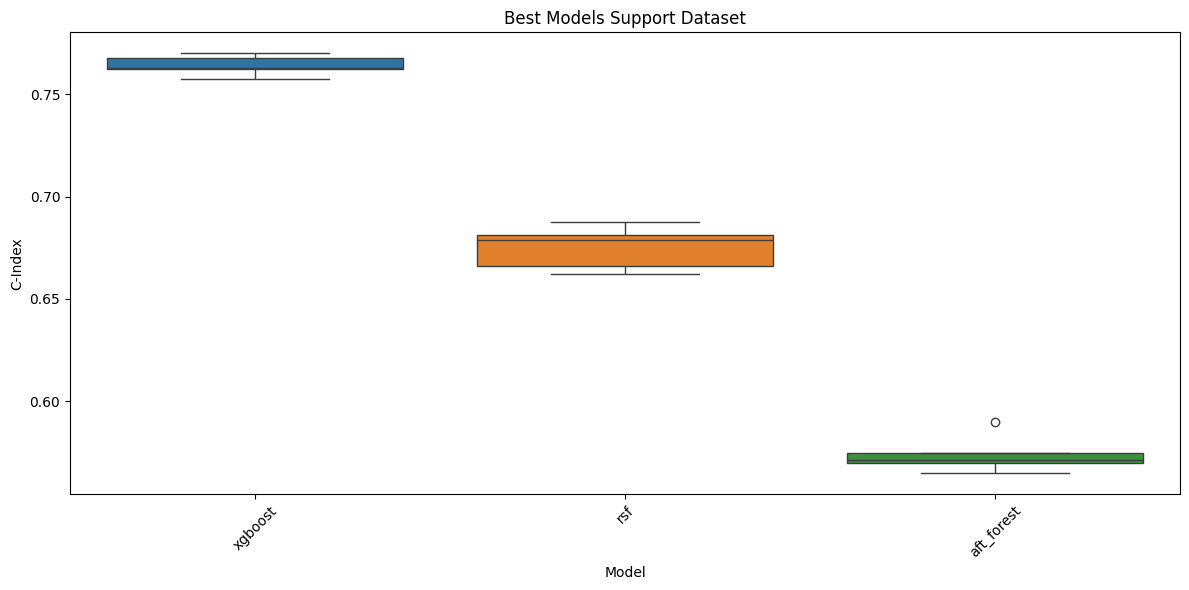

In [68]:
plot_best_box_plot(
    combined_best.explode('c_index'),
    title='Best Models Support Dataset',
    xlabel='Model',
    ylabel='C-Index'
)

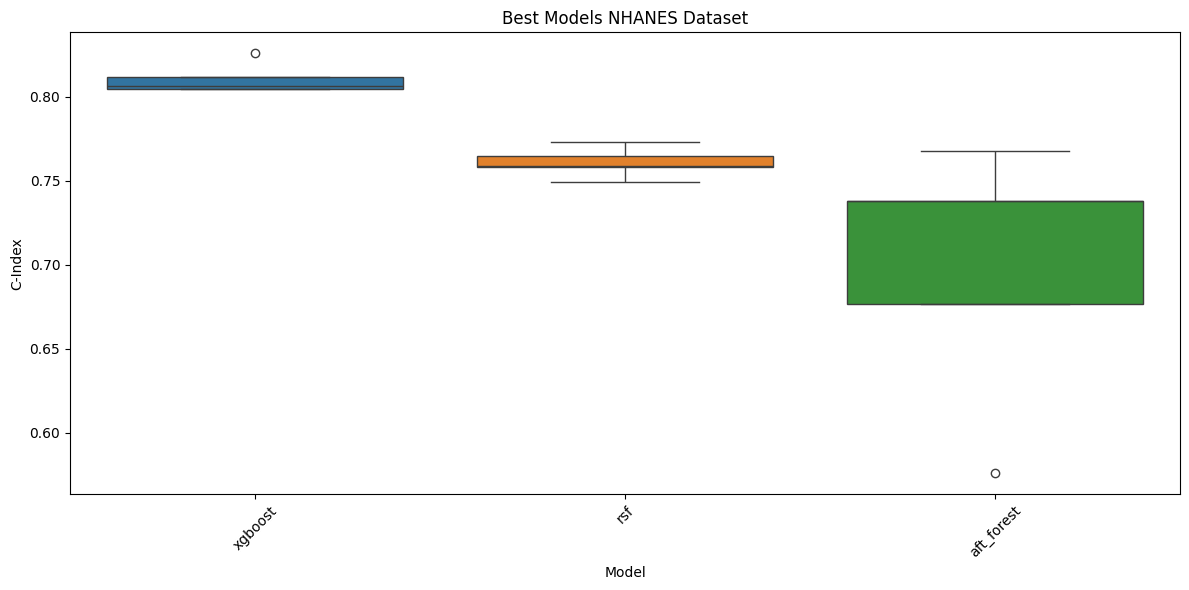

In [69]:
plot_best_box_plot(
    combined_best_nhanes.explode('c_index'),
    title='Best Models NHANES Dataset',
    xlabel='Model',
    ylabel='C-Index'
)

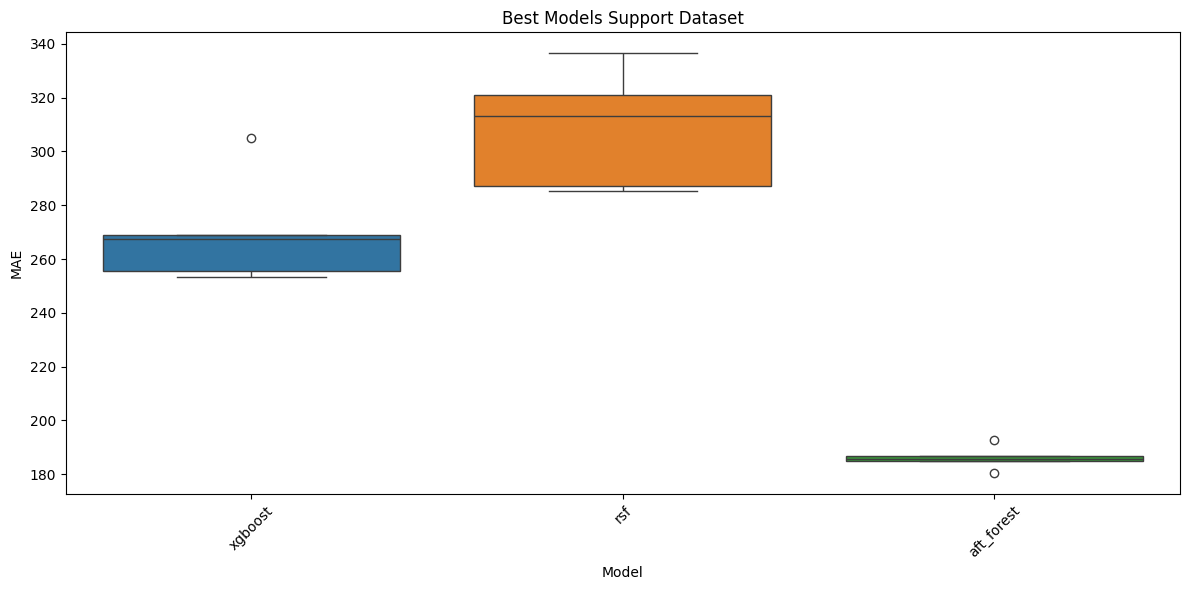

In [70]:
plot_best_box_plot(
    combined_best.explode('mae'),
    title='Best Models Support Dataset',
    xlabel='Model',
    ylabel='MAE',
    metric='mae'
)

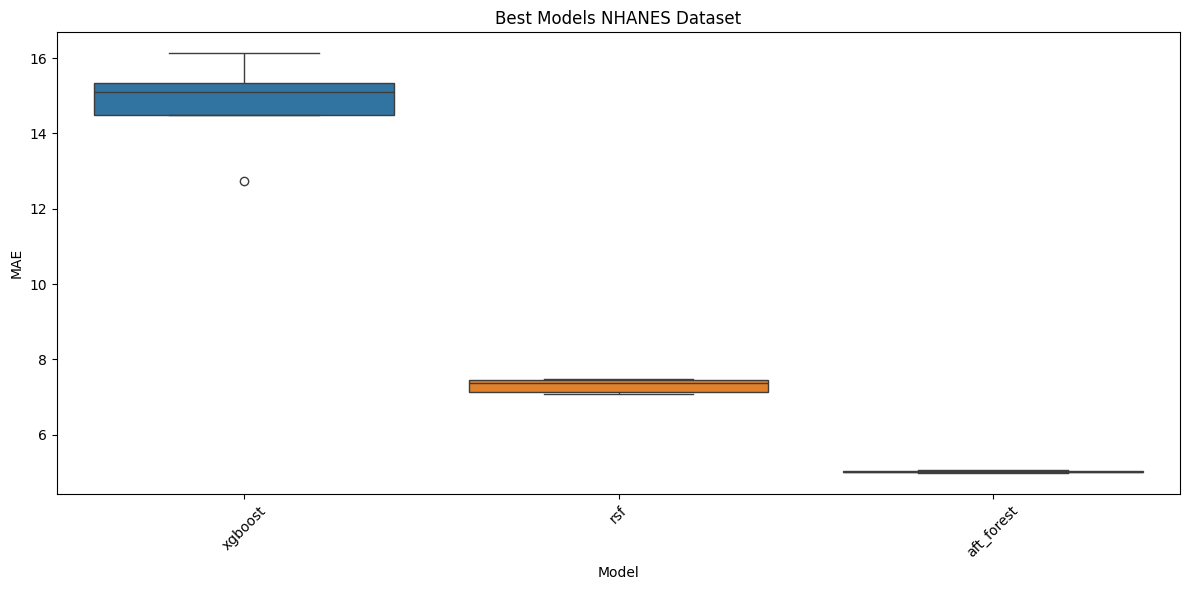

In [71]:
plot_best_box_plot(
    combined_best_nhanes.explode('mae'),
    title='Best Models NHANES Dataset',
    xlabel='Model',
    ylabel='MAE',
    metric='mae'
)

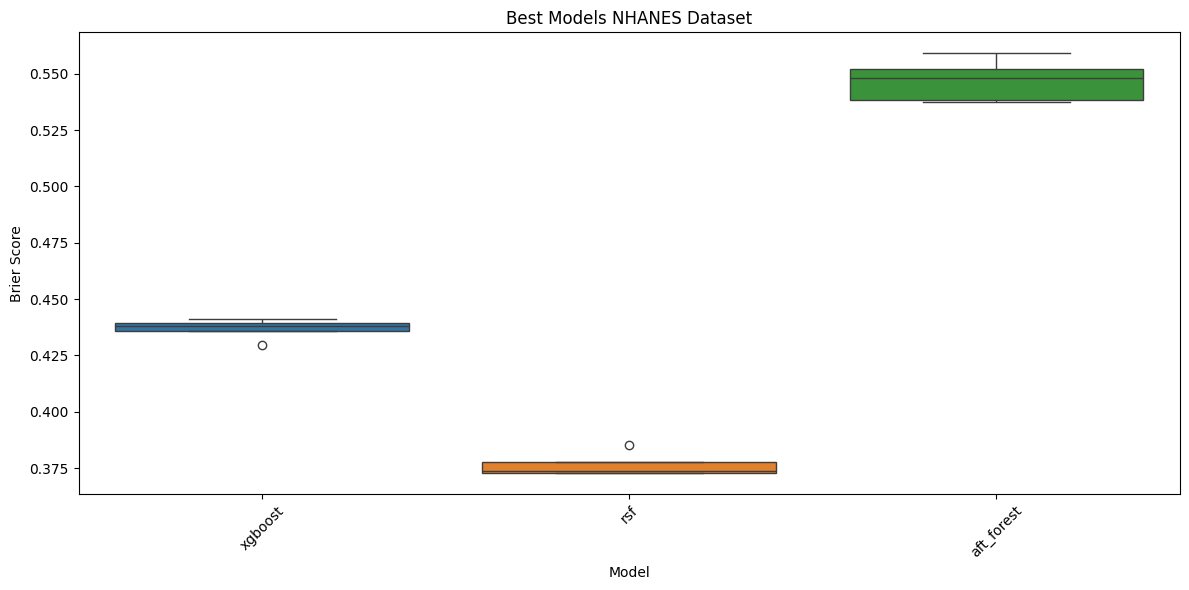

In [72]:
plot_best_box_plot(
    combined_best.explode('brier_score'),
    title='Best Models NHANES Dataset',
    xlabel='Model',
    ylabel='Brier Score',
    metric='brier_score'
)

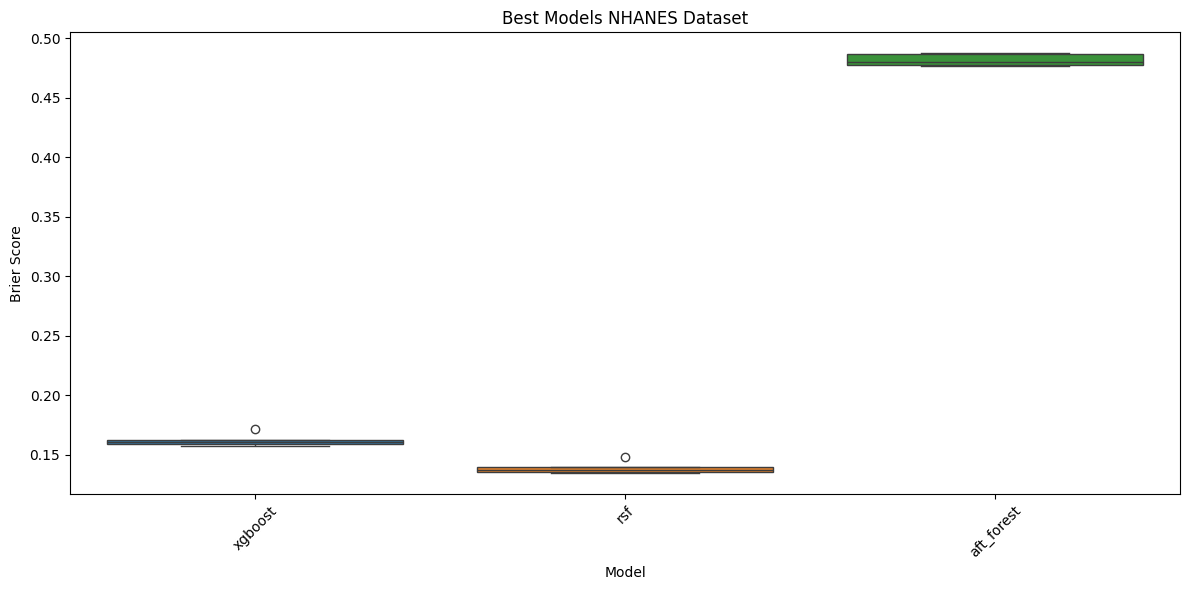

In [73]:
plot_best_box_plot(
    combined_best_nhanes.explode('brier_score'),
    title='Best Models NHANES Dataset',
    xlabel='Model',
    ylabel='Brier Score',
    metric='brier_score'
)

### Calibration Plots

In [74]:
import sys
sys.path.append("src")

from wrapper.xgboost_aft.xgboost_aft import XGBoostAFTWrapper
from dataset.nhanes import NHANESDataset


best_xgboost_dir = "results/xgboost_normal_nhanes/best_model_combi_10.pkl"
best_xgboost_model = XGBoostAFTWrapper.load(best_xgboost_dir)

In [75]:
def plot_survival_trees_timeline(
    pred_times, 
    y, 
    dataset=None, 
    function=None, 
    model=None, 
    save=False,
    path=None, 
    index=None,
    custom_path=None,
    interval=False,
    random_state: int = 42,  # NEW: for reproducibility
):

    if model == "XGBoostAFT":
        y_true = np.array(y['d.time'])
        censored = np.array(y['death'] == 0)
    else:
        y_true = np.array([time for _, time in y])
        censored = np.array([not death for death, _ in y])

    y_lower = np.zeros_like(y_true)  # assume 0 start
    y_upper = np.where(censored, np.inf, y_true)

    y_pred = np.array(pred_times)

    # ----- Select 2 censored + 3 uncensored for display (random but reproducible) -----
    rng = np.random.default_rng(seed=random_state)
    censored_idx = np.where(np.isinf(y_upper))[0]
    uncensored_idx = np.where(~np.isinf(y_upper))[0]

    # sample reproducibly
    censored_sel = rng.choice(censored_idx, size=min(2, len(censored_idx)), replace=False)
    uncensored_sel = rng.choice(uncensored_idx, size=min(3, len(uncensored_idx)), replace=False)

    selected = np.concatenate([censored_sel, uncensored_sel])

    y_true_sel = y_true[selected]  # Use actual time values instead of y_upper
    y_lower_sel = y_lower[selected]
    if y_pred.ndim > 1:  # interval predictions
        y_pred_sel = y_pred[:, selected]
    else:
        y_pred_sel = y_pred[selected]

    # ----- Build dataframe for plotting -----
    data = {
        "patient": [f"Patient {i}" for i in range(len(selected))],
        "actual_event": y_true_sel,  # Use actual time values
        "predicted_event": y_pred_sel,
        "censored": censored[selected],  # Use the censored flag directly
        "pred_error": "",
    }

    if y_pred.ndim > 1:
        data["predicted_event"] = y_pred_sel.mean(axis=0)
        data["pred_error"] = y_pred_sel.std(axis=0)
        interval = True

    df = pd.DataFrame(data).reset_index(drop=True)

    # ----- Plot -----
    sns.set_theme(style="whitegrid", palette="pastel")
    sns.set_palette("Set2")
    sns_green, sns_orange, sns_blue = sns.color_palette("Set2")[:3]

    fig, ax = plt.subplots(figsize=(12, 6))
    start_study = 0
    end_study = df["predicted_event"].max()
    if interval:
        end_study += df["pred_error"].max()

    for i in range(len(df)):
        if not df.loc[i, "censored"]:  # uncensored
            maximum = min(df.loc[i, "actual_event"], df.loc[i, "predicted_event"])
        else:  # censored
            maximum = max(df.loc[i, "actual_event"], df.loc[i, "predicted_event"])
            if interval:
                maximum += df.loc[i, "pred_error"]

        # horizontal line
        ax.plot([start_study, maximum], [i, i], "k-", linewidth=1)

        # actual events
        if not df.loc[i, "censored"]:  # uncensored - show event
            ax.plot(df.loc[i, "actual_event"], i, "X", markersize=10, color=sns_orange)
        else:  # censored - show censoring time
            ax.plot(df.loc[i, "actual_event"], i, "X", markersize=10, color=sns_green, zorder=10)

        # predicted + interval
        if interval:
            ax.errorbar(df.loc[i, "predicted_event"], i,
                        xerr=df.loc[i, "pred_error"],
                        fmt="X", markersize=10, capsize=5,
                        color=sns_blue, zorder=10)
        else:
            ax.plot(df.loc[i, "predicted_event"], i, "X", markersize=10,
                    color=sns_blue, zorder=10)

    title = f"Patient Event Timeline - {dataset} with {model}"

    ax.set_title(title)
    ax.set_xlabel("Survival time (days)" if dataset.lower() != "nhanes" else "Survival time (years)")
    ax.set_yticks(range(len(df)))
    ax.set_yticklabels(df["patient"])
    ax.axvline(x=start_study, color="k", linestyle=":", linewidth=1)
    ax.text(start_study, -0.5, "Present", ha="center", va="top")

    # Explicit legend handles so colors are correct
    event_handle = ax.plot([], [], "X", color=sns_orange, markersize=10, label="Event")[0]
    censored_handle = ax.plot([], [], "X", color=sns_green, markersize=10, label="Censored")[0]
    pred_handle = ax.plot([], [], "X", color=sns_blue, markersize=10, label="Predicted")[0]

    ax.legend(handles=[event_handle, censored_handle, pred_handle], loc="upper right")

    plt.tight_layout()

    # ----- Save or show -----
    if save:
        if custom_path:
            plt.savefig(custom_path, bbox_inches="tight")
        else:
            os.makedirs(path or ".", exist_ok=True)
            fname = f"timeline_{model}_{function}_{index or 0}.png"
            plt.savefig(os.path.join(path or ".", fname), bbox_inches="tight")
    else:
        plt.show()

    plt.close()


In [76]:
data = NHANESDataset()
X_train, X_test, y_train, y_test = data.get_train_test()
X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = data.get_train_test_xgboost()

/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/nhanes.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [77]:
best_xgboost_model._score(X_test_xgboost, y_test_xgboost)

np.float64(0.8139205701876454)

In [78]:
y_pred_xgboost_nhanes = best_xgboost_model.predict(X_test_xgboost)

In [79]:
from utils.metrics.metrics import mae
from utils.utils import plot_survival_trees

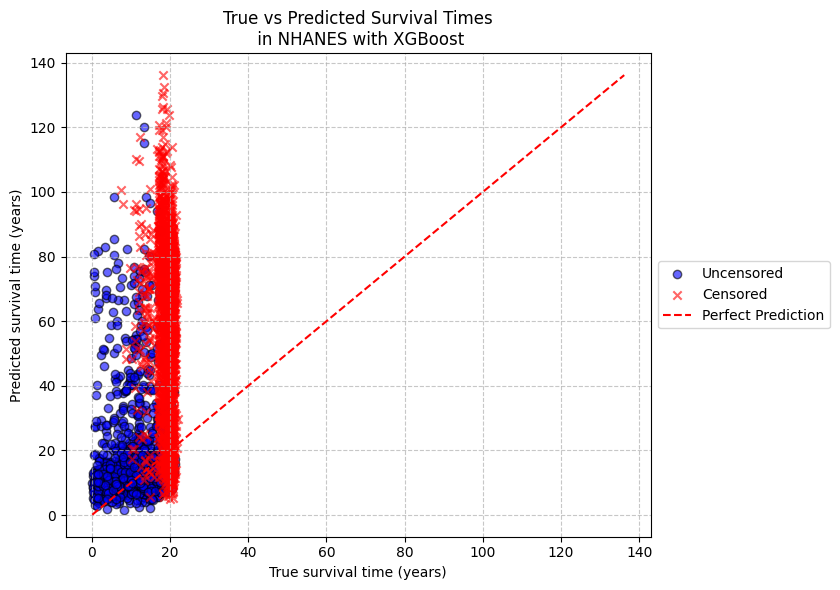

In [80]:
plot_survival_trees(y_pred_xgboost_nhanes, y_test, dataset='NHANES', model='XGBoost', show_mae=False, path='calibration')

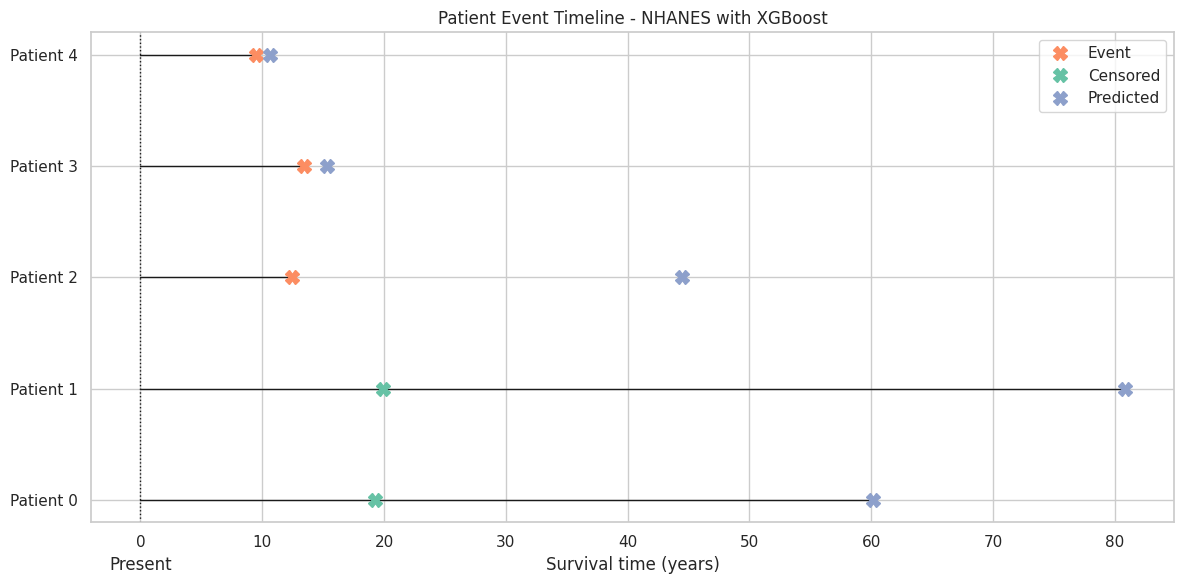

In [81]:
plot_survival_trees_timeline(y_pred_xgboost_nhanes, y_test, dataset='NHANES', model='XGBoost', path='calibration')

In [82]:
best_xgboost_dir = "results/xgboost_extreme_support/best_model_combi_9.pkl"
best_xgboost_model = XGBoostAFTWrapper.load(best_xgboost_dir)

In [83]:
from dataset.support import SupportDataset

df = pd.read_csv('data/support2.csv')
data = SupportDataset(df)
X_train, X_test, y_train, y_test = data.get_train_test()

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = data.get_train_test_xgboost()

/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/support.py:103: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [84]:
best_xgboost_model._score(X_test_xgboost, y_test_xgboost)

np.float64(0.7833536263180868)

In [85]:
y_pred_xgboost_support = best_xgboost_model.predict(X_test_xgboost)

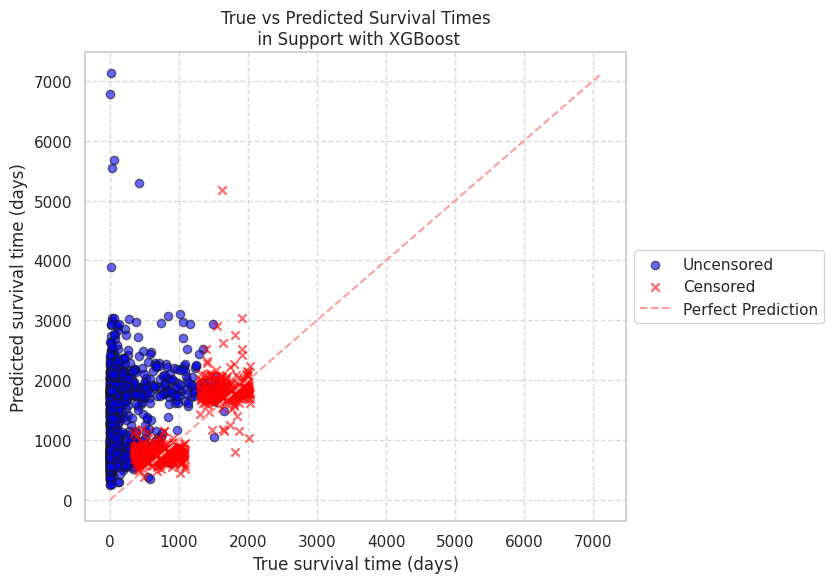

In [86]:
plot_survival_trees(y_pred_xgboost_support, y_test, dataset='Support', model='XGBoost', show_mae=False, path='calibration')

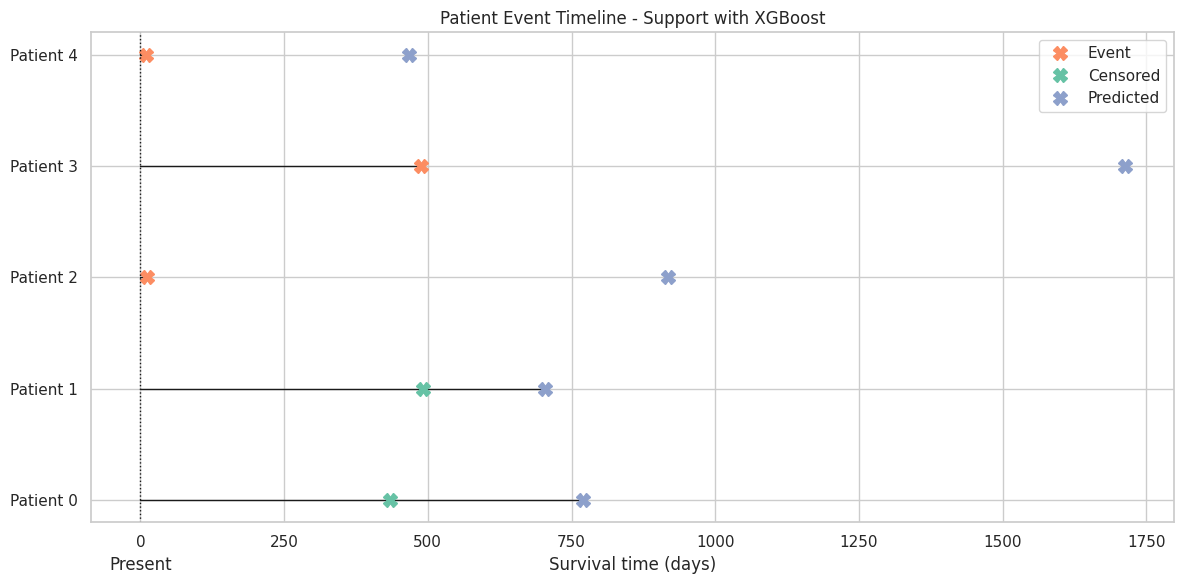

In [87]:
plot_survival_trees_timeline(y_pred_xgboost_support, y_test, dataset='Support', model='XGBoost', path='calibration')

In [88]:
from wrapper.random_survival_forest_scikit.random_survival_forest import RandomSurvivalForestWrapper

In [89]:
best_rsf_dir = "results/results_rsf/rsf_nhanes/tmp/results/best_model_combi_1.pkl"
best_rsf_model = RandomSurvivalForestWrapper.load(best_rsf_dir)

In [90]:
data = NHANESDataset()
X_train, X_test, y_train, y_test = data.get_train_test()

/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/nhanes.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [91]:
best_rsf_model._score(X_test, y_test)

np.float64(0.758803393559356)

In [92]:
y_pred_rsf_nhanes = best_rsf_model.predict(X_test)

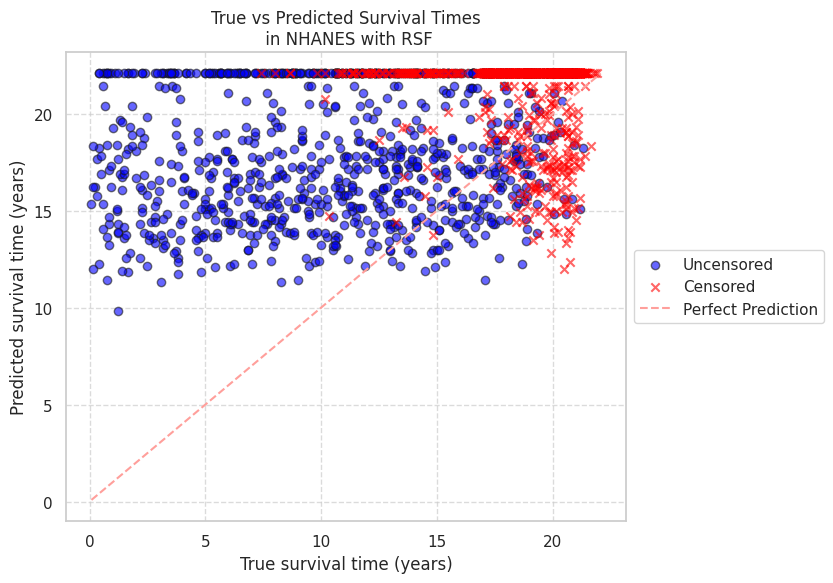

In [93]:
plot_survival_trees(y_pred_rsf_nhanes, y_test, dataset='NHANES', model='RSF', path='calibration')

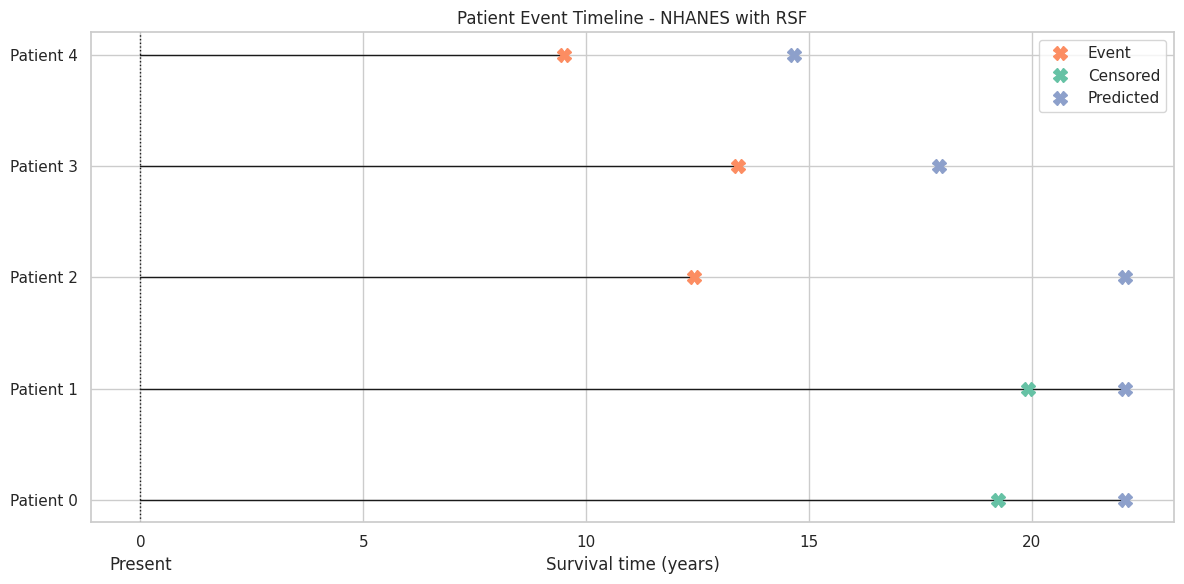

In [94]:
plot_survival_trees_timeline(y_pred_rsf_nhanes, y_test, dataset='NHANES', model="RSF", path='calibration')

In [95]:
df = pd.read_csv('data/support2.csv')
data = SupportDataset(df)
X_train, X_test, y_train, y_test = data.get_train_test()

/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/support.py:103: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [96]:
best_rsf_dir = "results/results_rsf/rsf_support/tmp/results/best_model_combi_2.pkl"
best_rsf_model = RandomSurvivalForestWrapper.load(best_rsf_dir)

In [97]:
best_rsf_model._score(X_test, y_test)

np.float64(0.6711182454242492)

In [98]:
y_pred_rsf_support = best_rsf_model.predict(X_test)

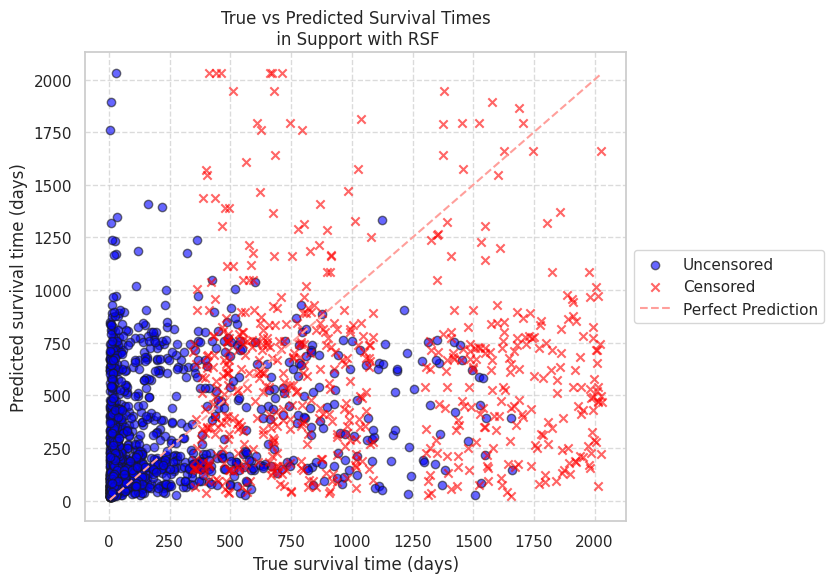

In [99]:
plot_survival_trees(y_pred_rsf_support, y_test, dataset='Support', model='RSF', path='calibration')

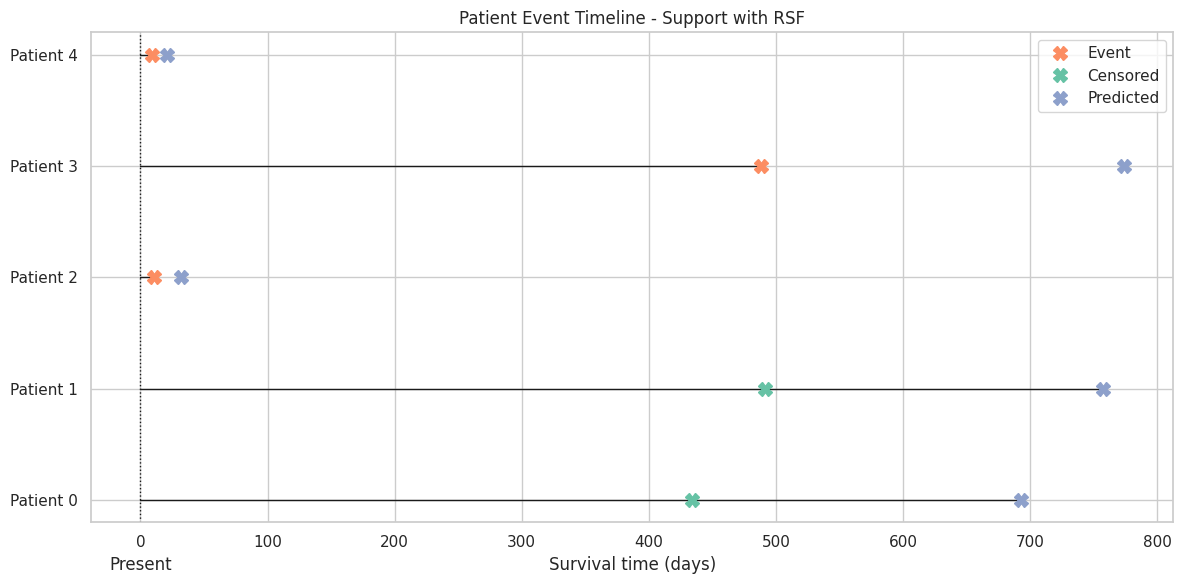

In [100]:
plot_survival_trees_timeline(y_pred_rsf_support, y_test, dataset='Support', model='RSF', path='calibration')

In [101]:
from forest.forest import AFTForest

aft_forest_support = AFTForest.load("results/results_aft/support/job_18981358/tmp/results/models/best_model_combi_15.pkl")

In [102]:
y_pred_aft_support = aft_forest_support.predict(X_test)

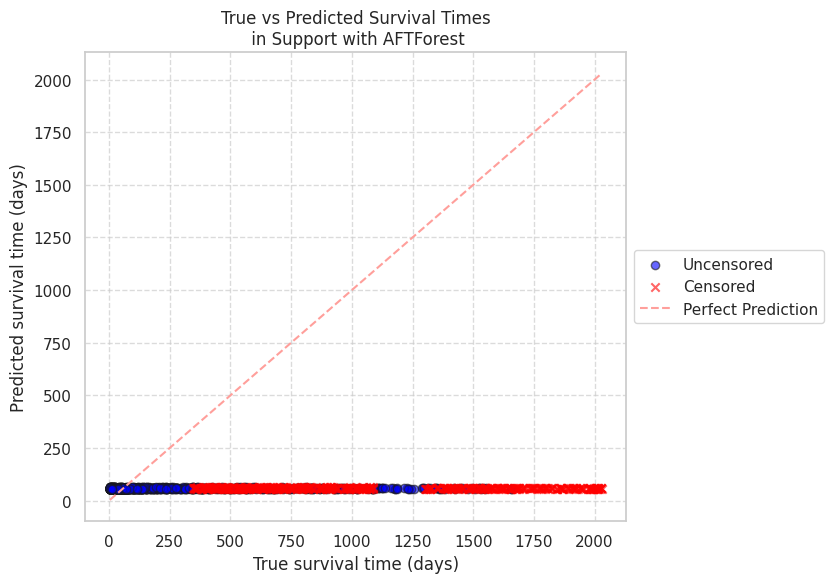

In [103]:
plot_survival_trees(y_pred_aft_support, y_test, dataset='Support', model='AFTForest', path='calibration')

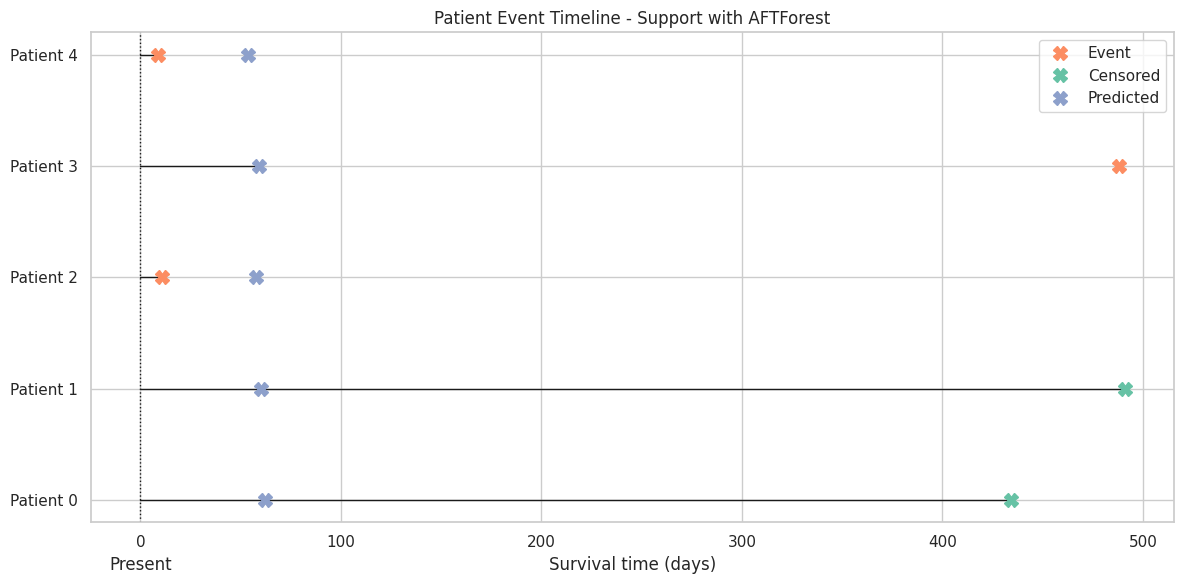

In [104]:
plot_survival_trees_timeline(y_pred_aft_support, y_test, dataset='Support', model='AFTForest', path='calibration')

In [105]:
y_test_support = y_test


In [106]:
data = NHANESDataset()
X_train, X_test, y_train, y_test = data.get_train_test()

y_test_nhanes = y_test


/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/nhanes.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [107]:
aft_forest_nhanes = AFTForest.load("results/results_aft/nhanes/job_19078069/tmp/results/models/best_model_combi_3.pkl")

In [108]:
y_pred_aft_nhanes = aft_forest_nhanes.predict(X_test)

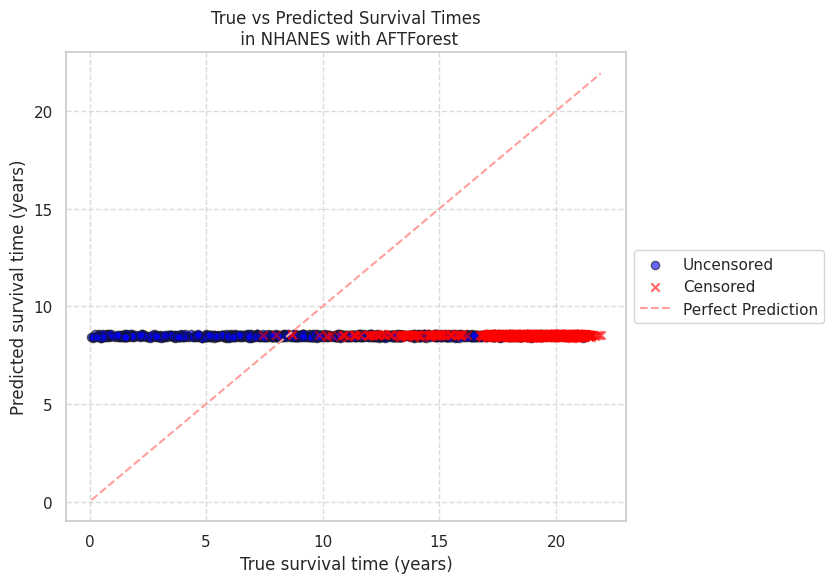

In [109]:
plot_survival_trees(y_pred_aft_nhanes, y_test, dataset='NHANES', model='AFTForest', path='calibration')

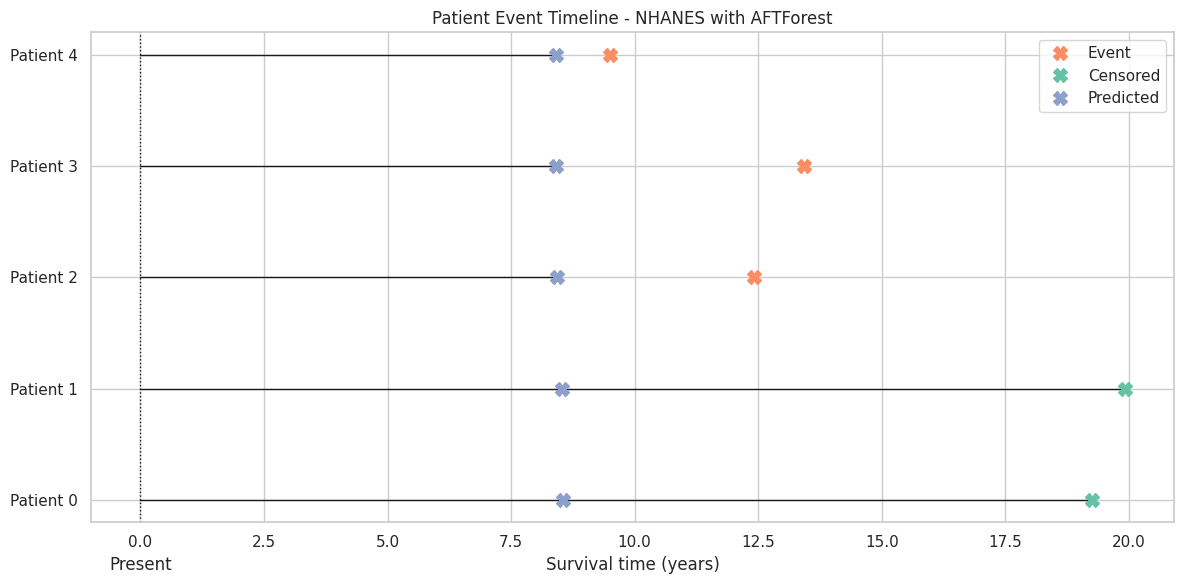

In [110]:
plot_survival_trees_timeline(y_pred_aft_nhanes, y_test, dataset='NHANES', model='AFTForest', path='calibration')

In [ ]:
def plot_survival_comparison(
    preds_dict,  # {"XGBoostAFT": preds, "RSF": preds, "AFTForest": preds}
    y, 
    dataset=None, 
    save=False, 
    path=None, 
    index=None,
    custom_path=None,
    interval=False,
    random_state: int = 42,
):
    """
    Compare survival time predictions from multiple models (XGBoost-AFT, RSF, AFT-Forest).
    """

    # ----- Handle ground truth (same as before) -----
    y_true = np.array(y['d.time'] if isinstance(y, pd.DataFrame) else [time for _, time in y])
    censored = np.array(y['death'] == 0 if isinstance(y, pd.DataFrame) else [not death for death, _ in y])
    y_lower = np.zeros_like(y_true)
    y_upper = np.where(censored, np.inf, y_true)

    # ----- Patient sampling -----
    rng = np.random.default_rng(seed=random_state)
    censored_idx = np.where(np.isinf(y_upper))[0]
    uncensored_idx = np.where(~np.isinf(y_upper))[0]
    censored_sel = rng.choice(censored_idx, size=min(2, len(censored_idx)), replace=False)
    uncensored_sel = rng.choice(uncensored_idx, size=min(3, len(uncensored_idx)), replace=False)
    selected = np.concatenate([censored_sel, uncensored_sel])

    # ----- Build dataframe with long format -----
    records = []
    for model_name, pred_times in preds_dict.items():
        pred_times = np.array(pred_times) 
        if pred_times.ndim > 1:
            pred_mean = pred_times[:, selected].mean(axis=0)
            pred_err = pred_times[:, selected].std(axis=0)
        else:
            pred_mean = pred_times[selected]
            pred_err = np.zeros_like(pred_mean)

        for i, idx in enumerate(selected):
            records.append({
                "patient": f"Patient {i}",
                "patient_idx": i,
                "model": model_name,
                "actual_event": y_true[idx],
                "censored": censored[idx],
                "predicted_event": pred_mean[i],
                "pred_error": pred_err[i],
            })

    df = pd.DataFrame(records)

    # ----- Plot -----
    sns.set_theme(style="white")  # No grids
    palette = {"XGBoostAFT": "tab:blue", "RSF": "tab:green", "AFTForest": "tab:orange"}
    fig, ax = plt.subplots(figsize=(14, 8))  # Increased width for legend outside

    # Create custom legend handles
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='black', linestyle='-', linewidth=2, label='Survival Time'),
        Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Uncensored Extension'),
        Line2D([0], [0], color='gray', linestyle='--', linewidth=2, label='Censored Extension'),
        Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=10, label='Actual Event'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=8, label='Censored'),
    ]
    
    # Add model predictions to legend
    for model_name, color in palette.items():
        legend_elements.append(
            Line2D([0], [0], marker='X', color='w', markerfacecolor=color, markersize=8, label=model_name)
        )
    
    # If interval plotting is enabled, add error bar representation
    if interval:
        legend_elements.append(
            Line2D([0], [0], color='gray', marker='_', markersize=10, label='Prediction Interval')
        )

    # Get x-axis limit first to extend lines to the end
    x_max = max(y_true[selected]) * 1.2  # Add 20% padding
    
    # Plot each patient with proper spacing
    for i, patient in enumerate(df["patient"].unique()):
        row = df[df["patient"] == patient]
        true_row = row.iloc[0]
        y_pos = i + 0.5  # Add offset to position patients higher
        
        # Draw solid line from 0 to actual event time
        ax.plot([0, true_row["actual_event"]], [y_pos, y_pos], 
                color='black', linestyle='-', linewidth=2, alpha=0.7)
        
        # Draw dashed line extension from event time to end of x-axis
        if not true_row["censored"]:
            # For uncensored: black dashed line extending to end of x-axis
            ax.plot([true_row["actual_event"], x_max], 
                    [y_pos, y_pos], color='black', linestyle='--', linewidth=2, alpha=0.7)
        else:
            # For censored: grey dashed line extending to end of x-axis
            ax.plot([true_row["actual_event"], x_max], 
                    [y_pos, y_pos], color='gray', linestyle='--', linewidth=2, alpha=0.7)
        
        # True event marker
        if not true_row["censored"]:
            ax.plot(true_row["actual_event"], y_pos, "X", color="black", markersize=10, zorder=5)
        else:
            ax.plot(true_row["actual_event"], y_pos, "X", color="gray", markersize=8, zorder=5)

        # Predictions per model (positioned slightly above the patient line)
        for j, (_, r) in enumerate(row.iterrows()):
            offset = 0.1 * (j + 1)  # Stagger predictions vertically
            if interval and r["pred_error"] > 0:
                ax.errorbar(r["predicted_event"], y_pos + offset, xerr=r["pred_error"], 
                            fmt="X", color=palette[r["model"]], capsize=5, zorder=5)
            else:
                ax.plot(r["predicted_event"], y_pos + offset, "X", 
                        color=palette[r["model"]], markersize=8, zorder=5)

    # Add grey dashed vertical line at x=0 for "Present"
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.7, label='_nolegend_')
    
    # Add "Present" text below the x-axis at 0.0
    ax.text(0, -0.05, 'Present', transform=ax.get_xaxis_transform(), 
            ha='center', va='top', color='gray', fontsize=10)

    ax.set_title(f"Survival Prediction Comparison - {dataset}" if dataset else "Survival Prediction Comparison")
    ax.set_xlabel("Survival Time")
    ax.set_ylabel("Patients")
    
    # Set y-ticks with proper spacing
    y_ticks = [i + 0.5 for i in range(len(df["patient"].unique()))]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(df["patient"].unique())
    
    # Add the custom legend outside the plot
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Adjust axis limits
    ax.set_ylim(-0.1, len(df["patient"].unique()) + 0.2)
    
    # Set x-axis to start from 0 and extend to calculated maximum
    ax.set_xlim(0, x_max)
    
    # Adjust layout to make room for the legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave 15% space on the right for legend

    if save:
        if custom_path:
            plt.savefig(custom_path, bbox_inches="tight")
        else:
            os.makedirs(path or ".", exist_ok=True)
            fname = f"comparison_{dataset}_{index or 0}.png"
            plt.savefig(os.path.join(path or ".", fname), bbox_inches="tight")
    else:
        plt.show()

    plt.close()

In [124]:
pred_nhanes = {"XGBoostAFT": y_pred_xgboost_nhanes, "RSF": y_pred_rsf_nhanes, "AFTForest": y_pred_aft_nhanes}
pred_support = {"XGBoostAFT": y_pred_xgboost_support, "RSF": y_pred_rsf_support, "AFTForest": y_pred_aft_support}

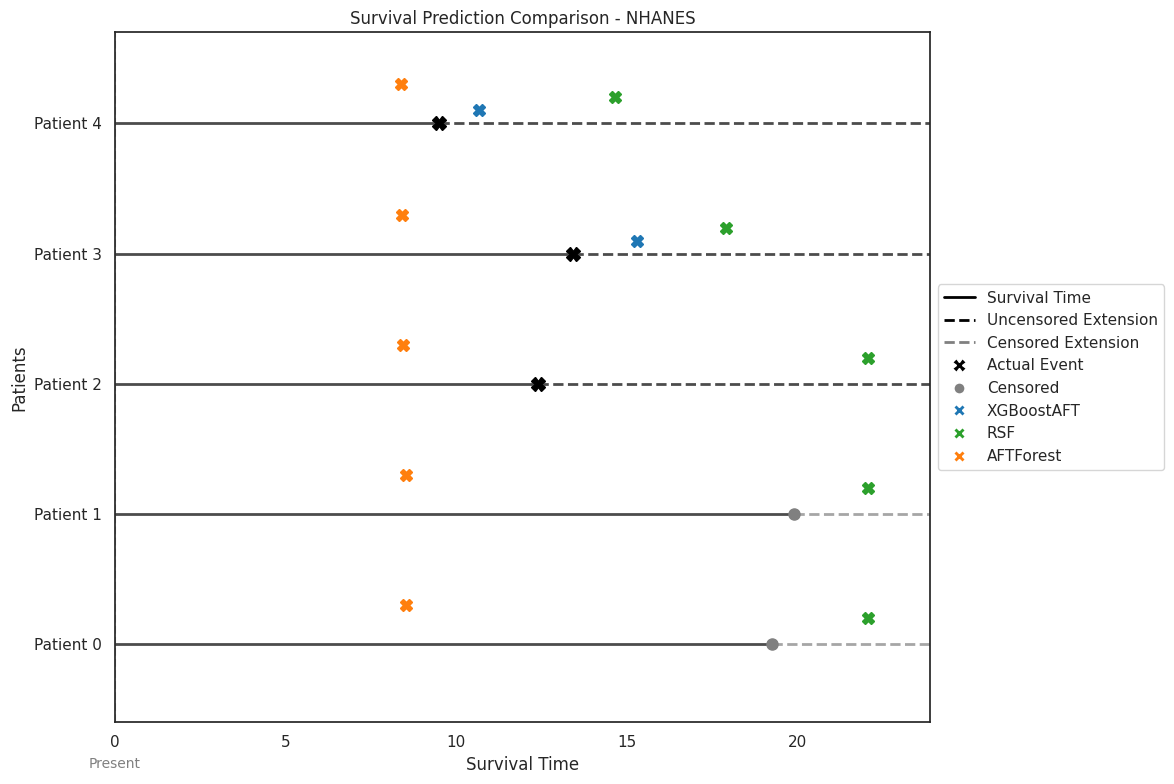

In [125]:
plot_survival_comparison(pred_nhanes, y_test_nhanes, dataset='NHANES', path='calibration')

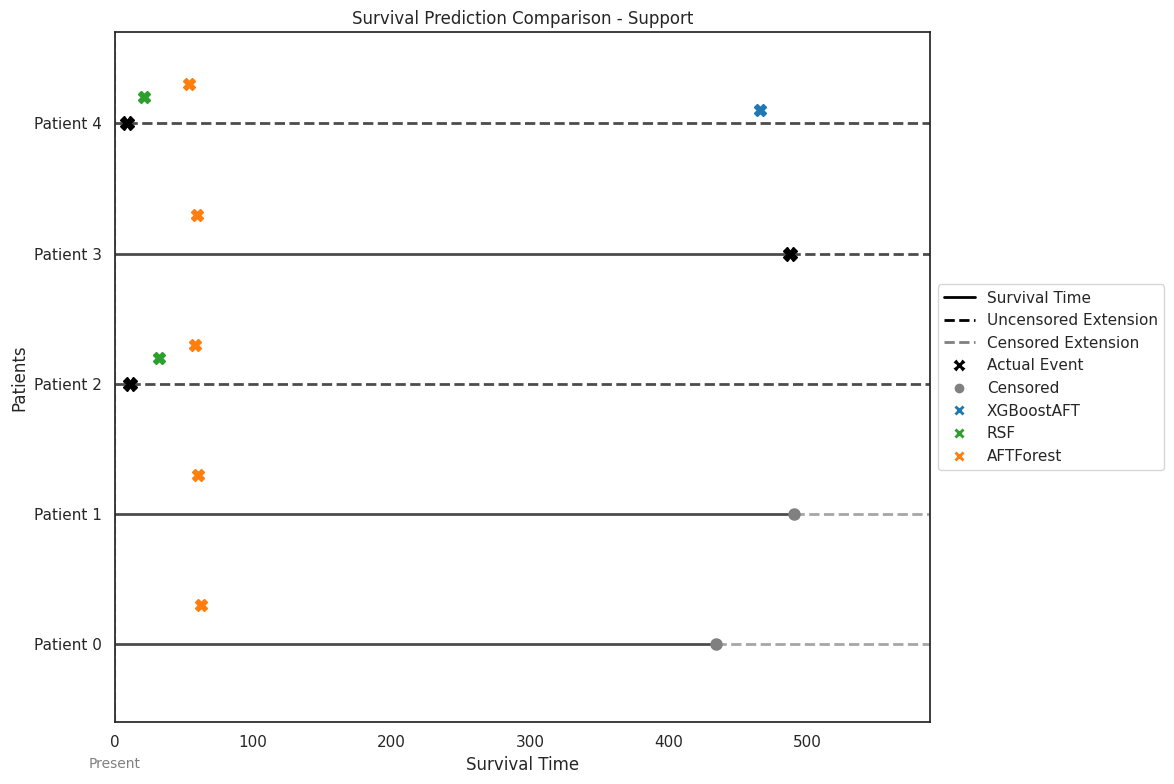

In [126]:
plot_survival_comparison(pred_support, y_test_support, dataset='Support', path='calibration')